In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Configuration
# -------------------------------
FOLDER_PATH = "part_1"            # Folder containing CSV files
OUTPUT_FOLDER = "outputs/fft_plots"     # Folder to save plots
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# -------------------------------
# Function to compute FFT
# -------------------------------
def compute_fft(time, signal):
    n = len(signal)
    dt = np.mean(np.diff(time))  # Sampling interval
    fft_values = np.fft.fft(signal)
    freqs = np.fft.fftfreq(n, dt)
    # Keep only positive frequencies
    positive = freqs > 0
    #returns frequency and amplitude
    return freqs[positive], np.abs(fft_values[positive])*2/n

# -------------------------------
# Process all CSV files
# -------------------------------
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))

for file in csv_files:
    print(f"Processing {file}")
    df = pd.read_csv(file)

    # Ensure two columns: time + signal
    if df.shape[1] < 2:
        print(f"Skipping {file}: not enough columns")
        continue

    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values

    freqs, amplitude = compute_fft(time, signal)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, amplitude)
    plt.title(f"FFT - {os.path.basename(file)}")
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()

    # Save plot
    output_path = os.path.join(OUTPUT_FOLDER, os.path.basename(file).replace(".csv", "_fft.png"))
    plt.savefig(output_path)
    plt.close()  # Close figure to free memory
    print(f"Saved plot to {output_path}")

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved plot to outputs/fft_plots\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_fft.png
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved plot to outputs/fft_plots\3186c48d-fc24-5300-910a-6d0bafdd87ea_fft.png
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved plot to outputs/fft_plots\555cbc73-5a58-53a2-b432-c415f46e8c7c_fft.png
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved plot to outputs/fft_plots\6dbf3276-3d5a-5c9f-930e-09da6ec60243_fft.png
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved plot to outputs/fft_plots\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_fft.png
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved plot to outputs/fft_plots\771e32b1-39b4-5a58-bb2b-c618ce2701d8_fft.png
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved plot to outputs/fft_plots\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1_fft.png
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# -------------------------------
# Configuration
# -------------------------------
FOLDER_PATH = "part_1"
OUTPUT_PLOTS = "outputs/band_plots"
OUTPUT_FEATURES = "band_features.csv"

os.makedirs(OUTPUT_PLOTS, exist_ok=True)

G = 9.81  # Convert g to m/s²

# Define frequency bands (customize here)
BANDS = [
    (60, 150),
    (150, 300),
    (2000,3000)
]

# -------------------------------
# Bandpass filter
# -------------------------------
def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# -------------------------------
# Process all CSV files
# -------------------------------
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))

all_features = []

for file in csv_files:
    print(f"Processing {file}")
    
    df = pd.read_csv(file)
    if df.shape[1] < 2:
        print(f"Skipping {file}: not enough columns")
        continue

    time = df.iloc[:, 0].values
    accel_g = df.iloc[:, 1].values

    # Convert acceleration to m/s²
    accel = accel_g * G

    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    plt.figure(figsize=(10, 6))
    plt.plot(time, accel, label="Original", alpha=0.5)

    # Apply bands
    for low, high in BANDS:
        band_signal = bandpass_filter(accel, fs, low, high)
        
        label = f"{low}-{high}Hz"
        plt.plot(time, band_signal, label=label)

        # RMS Energy Feature (very useful for ML)
        rms = np.sqrt(np.mean(band_signal**2))
        file_features[f"RMS_{label}"] = rms

    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s²)")
    plt.title(f"Band Decomposition - {os.path.basename(file)}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plot_path = os.path.join(
        OUTPUT_PLOTS,
        os.path.basename(file).replace(".csv", "_bands.png")
    )
    plt.savefig(plot_path)
    plt.close()

    all_features.append(file_features)

# Save feature summary
features_df = pd.DataFrame(all_features)
features_df.to_csv(OUTPUT_FEATURES, index=False)

print("Processing complete.")
print(f"Feature file saved as: {OUTPUT_FEATURES}")

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete.
Feature file saved as: band_features.csv


In [6]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


# -------------------------------
# Configuration
# -------------------------------
FOLDER_PATH = "part_1"
OUTPUT_PLOTS = "outputs/band_plots"
OUTPUT_FEATURES = "band_features.csv"

os.makedirs(OUTPUT_PLOTS, exist_ok=True)

G = 9.81  # Convert g to m/s²

# Define frequency bands (customize here)
BANDS = [
    (2000,3000),
    (3000,4000),
    (5000,6000)
]

# -------------------------------
# Bandpass filter
# -------------------------------
def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# -------------------------------
# FFT function
# -------------------------------
def compute_fft(signal, fs):
    n = len(signal)
    fft_vals = np.fft.fft(signal)
    freqs = np.fft.fftfreq(n, 1/fs)

    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive])*2/n

# -------------------------------
# Process all CSV files
# -------------------------------
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))

all_features = []

for file in csv_files:
    print(f"Processing {file}")
    
    df = pd.read_csv(file)
    if df.shape[1] < 2:
        print(f"Skipping {file}: not enough columns")
        continue

    time = df.iloc[:, 0].values
    accel_g = df.iloc[:, 1].values
    accel = accel_g * G

    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    # Create figure with subplots
    fig, axes = plt.subplots(len(BANDS), 2, figsize=(12, 3 * len(BANDS)))

    for i, (low, high) in enumerate(BANDS):
        band_signal = bandpass_filter(accel, fs, low, high)
        label = f"{low}-{high}Hz"

        # --- Time domain plot ---
        axes[i, 0].plot(time, band_signal)
        axes[i, 0].set_title(f"{label} - Time Domain")
        axes[i, 0].set_xlabel("Time (s)")
        axes[i, 0].set_ylabel("Acceleration (m/s²)")
        axes[i, 0].grid(True)

        # --- FFT plot ---
        freqs, amplitude = compute_fft(band_signal, fs)
        axes[i, 1].plot(freqs, amplitude)
        axes[i, 1].set_title(f"{label} - FFT")
        axes[i, 1].set_xlabel("Frequency (Hz)")
        axes[i, 1].set_ylabel("Amplitude")
        axes[i, 1].grid(True)

        # --- RMS feature ---
        rms = np.sqrt(np.mean(band_signal**2))
        file_features[f"RMS_{label}"] = rms

    plt.tight_layout()

    plot_path = os.path.join(
        OUTPUT_PLOTS,
        os.path.basename(file).replace(".csv", "_bands_fft.png")
    )
    plt.savefig(plot_path)
    plt.close()

    all_features.append(file_features)

# Save feature summary
features_df = pd.DataFrame(all_features)
features_df.to_csv(OUTPUT_FEATURES, index=False)

print("Processing complete.")
print(f"Feature file saved as: {OUTPUT_FEATURES}")

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete.
Feature file saved as: band_features.csv


In [7]:
features_df

,file,RMS_2000-3000Hz,RMS_3000-4000Hz,RMS_5000-6000Hz
0,11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv,0.505110,3.081161,0.014282
1,3186c48d-fc24-5300-910a-6d0bafdd87ea.csv,0.350355,0.082444,0.028676
2,555cbc73-5a58-53a2-b432-c415f46e8c7c.csv,5.679217,10.441604,9.278827
3,6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv,4.874266,15.486310,0.044343
4,75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv,1.248741,47.427983,5.551424
5,771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv,7.439847,8.466572,0.015186
6,82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv,11.419981,6.178049,0.818724
7,9da3a9bb-65e4-5899-9280-cdd730913e87.csv,2.979395,8.562491,0.030761
8,ad57d6b2-f816-5bb2-b4e8-191404207168.csv,2.595936,0.998246,15.545378
9,b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv,3.293194,2.861266,0.680410


In [9]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft, coherence
from scipy.stats import kurtosis

# =====================================================
# CONFIGURATION
# =====================================================
FOLDER_PATH = "part_1"

OUTPUT_BAND = "outputs/band_plots"
OUTPUT_KURTOGRAM = "outputs/kurtograms"
OUTPUT_COHERENCE = "outputs/spectral_coherence"

OUTPUT_FEATURES = "band_features.csv"

os.makedirs(OUTPUT_BAND, exist_ok=True)
os.makedirs(OUTPUT_KURTOGRAM, exist_ok=True)
os.makedirs(OUTPUT_COHERENCE, exist_ok=True)

G = 9.81  # Convert g to m/s²

BANDS = [
    (2000, 3000),
    (3000, 4000),
    (5000, 6000)
]

# =====================================================
# FILTER
# =====================================================
def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# =====================================================
# FFT
# =====================================================
def compute_fft(signal, fs):
    n = len(signal)
    windowed = signal * np.hanning(n)
    fft_vals = np.fft.fft(windowed)
    freqs = np.fft.fftfreq(n, 1/fs)

    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive]) * 2 / n

# =====================================================
# SPECTRAL COHERENCE
# =====================================================
def compute_spectral_coherence(signal, fs):
    mid = len(signal) // 2
    sig1 = signal[:mid]
    sig2 = signal[mid:]
    f, Cxy = coherence(sig1, sig2, fs=fs, nperseg=1024)
    return f, Cxy

# =====================================================
# PROPER KURTOGRAM (HEATMAP)
# =====================================================
def compute_kurtogram(signal, fs, max_level=6, filter_order=4):

    nyq = fs / 2
    kurt_map = []
    center_freq_map = []

    for level in range(1, max_level + 1):

        n_bands = 2 ** level
        band_width = nyq / n_bands

        level_kurt = []
        level_centers = []

        for i in range(n_bands):

            low = i * band_width
            high = (i + 1) * band_width

            if low <= 0:
                continue

            try:
                b, a = butter(
                    filter_order,
                    [low / nyq, high / nyq],
                    btype='band'
                )
                filtered = filtfilt(b, a, signal)

                k = kurtosis(filtered, fisher=False)
                level_kurt.append(k)
                level_centers.append((low + high) / 2)

            except:
                level_kurt.append(np.nan)
                level_centers.append((low + high) / 2)

        kurt_map.append(level_kurt)
        center_freq_map.append(level_centers)

    return kurt_map, center_freq_map

# =====================================================
# DOMINANT DETECTION
# =====================================================
def find_dominant(freqs, values, ratio=0.7):
    threshold = ratio * np.nanmax(values)
    return freqs[values >= threshold]

# =====================================================
# PROCESS FILES
# =====================================================
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))
all_features = []

for file in csv_files:

    print(f"Processing {file}")

    df = pd.read_csv(file)
    if df.shape[1] < 2:
        continue

    time = df.iloc[:, 0].values
    accel = df.iloc[:, 1].values * G

    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    # =====================================================
    # 1️⃣ BAND + FFT PLOTS
    # =====================================================
    fig, axes = plt.subplots(len(BANDS), 2, figsize=(12, 3 * len(BANDS)))

    for i, (low, high) in enumerate(BANDS):

        band_signal = bandpass_filter(accel, fs, low, high)
        label = f"{low}-{high}Hz"

        axes[i, 0].plot(time, band_signal)
        axes[i, 0].set_title(f"{label} - Time")
        axes[i, 0].grid(True)

        freqs, amp = compute_fft(band_signal, fs)
        axes[i, 1].plot(freqs, amp)
        axes[i, 1].set_title(f"{label} - FFT")
        axes[i, 1].grid(True)

        file_features[f"RMS_{label}"] = np.sqrt(np.mean(band_signal**2))

    plt.tight_layout()
    plt.savefig(os.path.join(
        OUTPUT_BAND,
        os.path.basename(file).replace(".csv", "_bands_fft.png")
    ))
    plt.close()

    # =====================================================
    # 2️⃣ SPECTRAL COHERENCE
    # =====================================================
    f_coh, coh = compute_spectral_coherence(accel, fs)
    dom_coh = find_dominant(f_coh, coh)

    plt.figure(figsize=(10, 5))
    plt.plot(f_coh, coh)
    plt.scatter(dom_coh, coh[np.isin(f_coh, dom_coh)], color='red')
    plt.title("Spectral Coherence")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Coherence")
    plt.grid(True)
    plt.savefig(os.path.join(
        OUTPUT_COHERENCE,
        os.path.basename(file).replace(".csv", "_coherence.png")
    ))
    plt.close()

    file_features["Dominant_Coherence"] = dom_coh.tolist()

    # =====================================================
    # 3️⃣ KURTOGRAM HEATMAP
    # =====================================================
    kurt_map, center_map = compute_kurtogram(accel, fs, max_level=6)

    # Convert to rectangular heatmap matrix
    max_len = max(len(row) for row in kurt_map)
    heatmap = np.full((len(kurt_map), max_len), np.nan)

    for i, row in enumerate(kurt_map):
        heatmap[i, :len(row)] = row

    plt.figure(figsize=(12, 6))
    plt.imshow(
        heatmap,
        aspect='auto',
        origin='lower',
        extent=[0, fs/2, 1, len(kurt_map)],
        cmap='jet'
    )

    plt.colorbar(label="Kurtosis Intensity")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Decomposition Level")
    plt.title("Kurtogram Heatmap")
    plt.tight_layout()

    plt.savefig(os.path.join(
        OUTPUT_KURTOGRAM,
        os.path.basename(file).replace(".csv", "_kurtogram_heatmap.png")
    ))
    plt.close()

    all_features.append(file_features)

# =====================================================
# SAVE FEATURES
# =====================================================
pd.DataFrame(all_features).to_csv(OUTPUT_FEATURES, index=False)

print("Processing complete.")

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete.


In [10]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft
from scipy.stats import kurtosis
from mpl_toolkits.mplot3d import Axes3D

# =====================================================
# CONFIGURATION
# =====================================================
FOLDER_PATH = "part_1"

OUTPUT_BAND = "outputs/band_plots"
OUTPUT_KURTOGRAM = "outputs/kurtograms"
OUTPUT_CSC = "outputs/cyclic_spectral_coherence"

OUTPUT_FEATURES = "band_features.csv"

os.makedirs(OUTPUT_BAND, exist_ok=True)
os.makedirs(OUTPUT_KURTOGRAM, exist_ok=True)
os.makedirs(OUTPUT_CSC, exist_ok=True)

G = 9.81  # Convert g → m/s²

BANDS = [
    (2000, 3000),
    (3000, 4000),
    (5000, 6000)
]

# =====================================================
# FILTERS
# =====================================================
def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# =====================================================
# FFT (with windowing)
# =====================================================
def compute_fft(signal, fs):
    n = len(signal)
    windowed = signal * np.hanning(n)
    fft_vals = np.fft.fft(windowed)
    freqs = np.fft.fftfreq(n, 1/fs)

    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive]) * 2/n

# =====================================================
# CORRECTED KURTOGRAM
# =====================================================
def compute_kurtogram(signal, fs, max_level=6, filter_order=4):

    nyq = fs / 2
    levels = []

    for level in range(1, max_level + 1):

        n_bands = 2 ** level
        band_width = nyq / n_bands

        centers = []
        kurt_vals = []

        for i in range(n_bands):

            low = i * band_width
            high = (i + 1) * band_width

            if low <= 0:
                continue

            try:
                filtered = bandpass_filter(signal, fs, low, high, filter_order)
                k = kurtosis(filtered, fisher=False)
            except:
                k = np.nan

            centers.append((low + high) / 2)
            kurt_vals.append(k)

        levels.append((centers, kurt_vals))

    # Common frequency grid
    freq_grid = np.linspace(0, nyq, 600)
    kurt_heatmap = np.zeros((max_level, len(freq_grid)))

    for i, (centers, kurt_vals) in enumerate(levels):

        interp_vals = np.interp(
            freq_grid,
            centers,
            kurt_vals,
            left=np.nan,
            right=np.nan
        )

        kurt_heatmap[i, :] = interp_vals

    return freq_grid, kurt_heatmap

# =====================================================
# CYCLIC SPECTRAL COHERENCE
# =====================================================
def compute_cyclic_spectral_coherence(signal, fs, nperseg=1024):

    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg)

    dt = t[1] - t[0]
    alpha = np.fft.fftfreq(len(t), d=dt)
    alpha = alpha[alpha >= 0]

    CSC = np.zeros((len(f), len(alpha)))

    for i in range(len(f)):
        cyclic_fft = np.fft.fft(Zxx[i, :])
        power = np.abs(cyclic_fft)**2
        CSC[i, :] = power[:len(alpha)]

    CSC = CSC / np.nanmax(CSC)

    return f, alpha, CSC

# =====================================================
# DOMINANT CYCLIC FREQUENCIES
# =====================================================
def extract_dominant_alpha(alpha, CSC, threshold=0.7):

    alpha_energy = np.mean(CSC, axis=0)
    dominant = alpha[alpha_energy > threshold * np.max(alpha_energy)]

    return dominant

# =====================================================
# MAIN PIPELINE
# =====================================================
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))
all_features = []

for file in csv_files:

    print(f"Processing {file}")

    df = pd.read_csv(file)

    if df.shape[1] < 2:
        continue

    time = df.iloc[:, 0].values
    accel = df.iloc[:, 1].values * G

    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    # =====================================================
    # 1️⃣ BAND + FFT
    # =====================================================
    fig, axes = plt.subplots(len(BANDS), 2, figsize=(12, 3 * len(BANDS)))

    for i, (low, high) in enumerate(BANDS):

        band_signal = bandpass_filter(accel, fs, low, high)
        label = f"{low}-{high}Hz"

        axes[i, 0].plot(time, band_signal)
        axes[i, 0].set_title(f"{label} - Time")
        axes[i, 0].grid(True)

        freqs, amp = compute_fft(band_signal, fs)
        axes[i, 1].plot(freqs, amp)
        axes[i, 1].set_title(f"{label} - FFT")
        axes[i, 1].grid(True)

        file_features[f"RMS_{label}"] = np.sqrt(np.mean(band_signal**2))

    plt.tight_layout()
    plt.savefig(os.path.join(
        OUTPUT_BAND,
        os.path.basename(file).replace(".csv", "_bands_fft.png")
    ))
    plt.close()

    # =====================================================
    # 2️⃣ KURTOGRAM
    # =====================================================
    freq_grid, kurt_heatmap = compute_kurtogram(accel, fs)

    plt.figure(figsize=(12, 6))
    plt.imshow(
        kurt_heatmap,
        aspect='auto',
        origin='lower',
        extent=[freq_grid[0], freq_grid[-1], 1, kurt_heatmap.shape[0]],
        cmap='jet'
    )

    plt.colorbar(label="Kurtosis Intensity")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Decomposition Level")
    plt.title("Kurtogram Heatmap")
    plt.tight_layout()

    plt.savefig(os.path.join(
        OUTPUT_KURTOGRAM,
        os.path.basename(file).replace(".csv", "_kurtogram.png")
    ))
    plt.close()

    # =====================================================
    # 3️⃣ CYCLIC SPECTRAL COHERENCE
    # =====================================================
    f_csc, alpha, CSC = compute_cyclic_spectral_coherence(accel, fs)

    # Heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(
        CSC.T,
        aspect='auto',
        origin='lower',
        extent=[f_csc[0], f_csc[-1], alpha[0], alpha[-1]],
        cmap='jet'
    )

    plt.colorbar(label="Cyclic Spectral Coherence")
    plt.xlabel("Carrier Frequency (Hz)")
    plt.ylabel("Cyclic Frequency α (Hz)")
    plt.title("Cyclic Spectral Coherence Map")
    plt.tight_layout()

    plt.savefig(os.path.join(
        OUTPUT_CSC,
        os.path.basename(file).replace(".csv", "_CSC_heatmap.png")
    ))
    plt.close()

    # 3D Surface
    F_grid, A_grid = np.meshgrid(f_csc, alpha)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(F_grid, A_grid, CSC.T, cmap='jet')
    ax.set_xlabel("Carrier Frequency (Hz)")
    ax.set_ylabel("Cyclic Frequency α (Hz)")
    ax.set_zlabel("Amplitude")
    ax.set_title("3D Cyclic Spectral Coherence")

    plt.tight_layout()
    plt.savefig(os.path.join(
        OUTPUT_CSC,
        os.path.basename(file).replace(".csv", "_CSC_3D.png")
    ))
    plt.close()

    dominant_alpha = extract_dominant_alpha(alpha, CSC)
    file_features["Dominant_Cyclic_Frequencies"] = dominant_alpha.tolist()

    all_features.append(file_features)

# =====================================================
# SAVE FEATURES
# =====================================================
pd.DataFrame(all_features).to_csv(OUTPUT_FEATURES, index=False)

print("Processing complete.")

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete.


In [12]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft
from mpl_toolkits.mplot3d import Axes3D

# =====================================================
# CONFIGURATION
# =====================================================
FOLDER_PATH = "part_1"

OUTPUT_BAND = "outputs/band_plots"
OUTPUT_KURTOGRAM = "outputs/kurtograms"
OUTPUT_CSC = "outputs/cyclic_spectral_coherence"

OUTPUT_FEATURES = "analysis_features.csv"

os.makedirs(OUTPUT_BAND, exist_ok=True)
os.makedirs(OUTPUT_KURTOGRAM, exist_ok=True)
os.makedirs(OUTPUT_CSC, exist_ok=True)

G = 9.81  # Convert g to m/s²

BANDS = [
    (2000, 3000),
    (3000, 4000),
    (5000, 6000)
]

WINDOW_SIZES = [256, 512, 1024, 2048, 4096]  # STFT window sizes

# =====================================================
# FILTER FUNCTION
# =====================================================
def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# =====================================================
# FFT FUNCTION
# =====================================================
def compute_fft(signal, fs):
    n = len(signal)
    windowed = signal * np.hanning(n)
    fft_vals = np.fft.fft(windowed)
    freqs = np.fft.fftfreq(n, 1/fs)
    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive]) * 2/n

# =====================================================
# STFT-BASED SPECTRAL KURTOSIS
# =====================================================
def compute_spectral_kurtosis(signal, fs, nperseg):
    f, t, Zxx = stft(
        signal,
        fs=fs,
        nperseg=nperseg,
        noverlap=nperseg//2,
        window='hann'
    )
    S2 = np.abs(Zxx)**2
    S4 = S2**2
    mean_S2 = np.mean(S2, axis=1)
    mean_S4 = np.mean(S4, axis=1)
    SK = (mean_S4 / (mean_S2**2)) - 2
    return f, SK

# =====================================================
# STFT-BASED KURTOGRAM WITH INTERPOLATION
# =====================================================
def compute_kurtogram(signal, fs, window_sizes=None, n_freqs=600):
    if window_sizes is None:
        window_sizes = [256, 512, 1024, 2048, 4096]

    kurt_map = []
    freq_ref = np.linspace(0, fs/2, n_freqs)  # common frequency grid

    for win in window_sizes:
        f, SK = compute_spectral_kurtosis(signal, fs, win)
        # Interpolate SK to common frequency grid
        SK_interp = np.interp(freq_ref, f, SK)
        kurt_map.append(SK_interp)

    kurt_map = np.array(kurt_map)
    return freq_ref, kurt_map

# =====================================================
# CYCLIC SPECTRAL COHERENCE
# =====================================================
def compute_cyclic_spectral_coherence(signal, fs, nperseg=1024):
    f, t, Zxx = stft(
        signal,
        fs=fs,
        nperseg=nperseg,
        noverlap=nperseg//2,
        window='hann'
    )
    dt = t[1] - t[0]
    alpha = np.fft.fftfreq(len(t), d=dt)
    alpha = alpha[alpha >= 0]

    CSC = np.zeros((len(f), len(alpha)))
    for i in range(len(f)):
        cyclic_fft = np.fft.fft(Zxx[i, :])
        power = np.abs(cyclic_fft)**2
        CSC[i, :] = power[:len(alpha)]

    CSC = CSC / np.nanmax(CSC)
    return f, alpha, CSC

# =====================================================
# DOMINANT CYCLIC FREQUENCIES
# =====================================================
def extract_dominant_alpha(alpha, CSC, threshold=0.7):
    alpha_energy = np.mean(CSC, axis=0)
    dominant = alpha[alpha_energy > threshold * np.max(alpha_energy)]
    return dominant

# =====================================================
# MAIN PIPELINE
# =====================================================
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))
all_features = []

for file in csv_files:
    print(f"Processing {file}")

    df = pd.read_csv(file)
    if df.shape[1] < 2:
        continue

    time = df.iloc[:, 0].values
    accel = df.iloc[:, 1].values * G
    accel = accel - np.mean(accel)  # Remove DC

    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    # -------------------------------
    # 1️⃣ BAND-PASS + FFT
    # -------------------------------
    fig, axes = plt.subplots(len(BANDS), 2, figsize=(12, 3 * len(BANDS)))
    for i, (low, high) in enumerate(BANDS):
        band_signal = bandpass_filter(accel, fs, low, high)
        label = f"{low}-{high}Hz"

        axes[i, 0].plot(time, band_signal)
        axes[i, 0].set_title(f"{label} - Time")
        axes[i, 0].grid(True)

        freqs, amp = compute_fft(band_signal, fs)
        axes[i, 1].plot(freqs, amp)
        axes[i, 1].set_title(f"{label} - FFT")
        axes[i, 1].grid(True)

        file_features[f"RMS_{label}"] = np.sqrt(np.mean(band_signal**2))

    plt.tight_layout()
    plt.savefig(os.path.join(
        OUTPUT_BAND,
        os.path.basename(file).replace(".csv", "_bands_fft.png")
    ))
    plt.close()

    # -------------------------------
    # 2️⃣ STFT-BASED KURTOGRAM
    # -------------------------------
    freqs, kurt_map = compute_kurtogram(accel, fs, window_sizes=WINDOW_SIZES)

    plt.figure(figsize=(12, 6))
    plt.imshow(
        kurt_map,
        aspect='auto',
        origin='lower',
        extent=[freqs[0], freqs[-1], 0, len(WINDOW_SIZES)],
        cmap='jet'
    )
    plt.colorbar(label="Spectral Kurtosis")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("STFT Window Size")
    plt.yticks(np.arange(len(WINDOW_SIZES)), labels=WINDOW_SIZES)
    plt.title("STFT-Based Kurtogram")
    plt.tight_layout()
    plt.savefig(os.path.join(
        OUTPUT_KURTOGRAM,
        os.path.basename(file).replace(".csv", "_kurtogram_STFT.png")
    ))
    plt.close()

    # -------------------------------
    # 3️⃣ CYCLIC SPECTRAL COHERENCE
    # -------------------------------
    f_csc, alpha, CSC = compute_cyclic_spectral_coherence(accel, fs)

    # 2D heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(
        CSC.T,
        aspect='auto',
        origin='lower',
        extent=[f_csc[0], f_csc[-1], alpha[0], alpha[-1]],
        cmap='jet'
    )
    plt.colorbar(label="Cyclic Spectral Coherence")
    plt.xlabel("Carrier Frequency (Hz)")
    plt.ylabel("Cyclic Frequency α (Hz)")
    plt.title("Cyclic Spectral Coherence Map")
    plt.tight_layout()
    plt.savefig(os.path.join(
        OUTPUT_CSC,
        os.path.basename(file).replace(".csv", "_CSC_heatmap.png")
    ))
    plt.close()

    # 3D surface
    F_grid, A_grid = np.meshgrid(f_csc, alpha)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(F_grid, A_grid, CSC.T, cmap='jet')
    ax.set_xlabel("Carrier Frequency (Hz)")
    ax.set_ylabel("Cyclic Frequency α (Hz)")
    ax.set_zlabel("Amplitude")
    ax.set_title("3D Cyclic Spectral Coherence")
    plt.tight_layout()
    plt.savefig(os.path.join(
        OUTPUT_CSC,
        os.path.basename(file).replace(".csv", "_CSC_3D.png")
    ))
    plt.close()

    dominant_alpha = extract_dominant_alpha(alpha, CSC)
    file_features["Dominant_Cyclic_Frequencies"] = dominant_alpha.tolist()

    all_features.append(file_features)

# -------------------------------
# SAVE FEATURES
# -------------------------------
pd.DataFrame(all_features).to_csv(OUTPUT_FEATURES, index=False)
print("Processing complete. Features saved to:", OUTPUT_FEATURES)

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete. Features saved to: analysis_features.csv


In [13]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# CONFIGURATION
# -------------------------------
FOLDER_PATH = "part_1"

OUTPUT_BAND = "outputs/band_plots"
OUTPUT_KURTOGRAM = "outputs/kurtograms"
OUTPUT_CSC = "outputs/cyclic_spectral_coherence"

OUTPUT_FEATURES = "analysis_features.csv"

os.makedirs(OUTPUT_BAND, exist_ok=True)
os.makedirs(OUTPUT_KURTOGRAM, exist_ok=True)
os.makedirs(OUTPUT_CSC, exist_ok=True)

G = 9.81  # Convert g -> m/s²

# Optional: manual bands for FFT/RMS
BANDS = [
    (2000, 3000),
    (3000, 4000),
    (5000, 6000)
]

# -------------------------------
# DYADIC/PROGRESSIVE FILTERS FOR KURTOGRAM
# Start from 1 and increase powers of 2 up to some max
# -------------------------------
def generate_window_sizes(max_size=4096):
    sizes = []
    n = 1
    while n <= max_size:
        sizes.append(n)
        n *= 2
    return sizes

WINDOW_SIZES = generate_window_sizes(max_size=4096)

# -------------------------------
# FILTER FUNCTION
# -------------------------------
def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# -------------------------------
# FFT FUNCTION
# -------------------------------
def compute_fft(signal, fs):
    n = len(signal)
    windowed = signal * np.hanning(n)
    fft_vals = np.fft.fft(windowed)
    freqs = np.fft.fftfreq(n, 1/fs)
    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive]) * 2/n

# -------------------------------
# STFT-BASED SPECTRAL KURTOSIS
# -------------------------------
def compute_spectral_kurtosis(signal, fs, nperseg):
    f, t, Zxx = stft(
        signal,
        fs=fs,
        nperseg=nperseg,
        noverlap=nperseg//2,
        window='hann'
    )
    S2 = np.abs(Zxx)**2
    S4 = S2**2
    mean_S2 = np.mean(S2, axis=1)
    mean_S4 = np.mean(S4, axis=1)
    SK = (mean_S4 / (mean_S2**2)) - 2
    return f, SK

# -------------------------------
# STFT-BASED KURTOGRAM WITH INTERPOLATION
# -------------------------------
def compute_kurtogram(signal, fs, window_sizes=None, n_freqs=600):
    if window_sizes is None:
        window_sizes = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096]
    kurt_map = []
    freq_ref = np.linspace(0, fs/2, n_freqs)  # common frequency grid

    for win in window_sizes:
        f, SK = compute_spectral_kurtosis(signal, fs, win)
        SK_interp = np.interp(freq_ref, f, SK)
        kurt_map.append(SK_interp)

    kurt_map = np.array(kurt_map)
    return freq_ref, kurt_map

# -------------------------------
# AUTO BAND SELECTION FROM KURTOGRAM
# -------------------------------
def auto_select_band_from_kurtogram(freqs, kurt_map, band_width=200):
    SK_max_over_windows = np.max(kurt_map, axis=0)
    peak_idx = np.argmax(SK_max_over_windows)
    peak_freq = freqs[peak_idx]
    low = max(0, peak_freq - band_width/2)
    high = min(freqs[-1], peak_freq + band_width/2)
    return low, high, peak_freq

# -------------------------------
# CYCLIC SPECTRAL COHERENCE
# -------------------------------
def compute_cyclic_spectral_coherence(signal, fs, nperseg=1024):
    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=nperseg//2, window='hann')
    dt = t[1] - t[0]
    alpha = np.fft.fftfreq(len(t), d=dt)
    alpha = alpha[alpha >= 0]

    CSC = np.zeros((len(f), len(alpha)))
    for i in range(len(f)):
        cyclic_fft = np.fft.fft(Zxx[i, :])
        power = np.abs(cyclic_fft)**2
        CSC[i, :] = power[:len(alpha)]
    CSC = CSC / np.nanmax(CSC)
    return f, alpha, CSC

# -------------------------------
# DOMINANT CYCLIC FREQUENCIES
# -------------------------------
def extract_dominant_alpha(alpha, CSC, threshold=0.7):
    alpha_energy = np.mean(CSC, axis=0)
    dominant = alpha[alpha_energy > threshold * np.max(alpha_energy)]
    return dominant

# -------------------------------
# MAIN PIPELINE
# -------------------------------
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))
all_features = []

for file in csv_files:
    print(f"Processing {file}")
    df = pd.read_csv(file)
    if df.shape[1] < 2:
        continue

    time = df.iloc[:, 0].values
    accel = df.iloc[:, 1].values * G
    accel = accel - np.mean(accel)
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    # -------------------------------
    # BAND-PASS + FFT
    # -------------------------------
    fig, axes = plt.subplots(len(BANDS), 2, figsize=(12, 3*len(BANDS)))
    for i, (low, high) in enumerate(BANDS):
        band_signal = bandpass_filter(accel, fs, low, high)
        label = f"{low}-{high}Hz"
        axes[i, 0].plot(time, band_signal)
        axes[i, 0].set_title(f"{label} - Time")
        axes[i, 0].grid(True)
        freqs, amp = compute_fft(band_signal, fs)
        axes[i, 1].plot(freqs, amp)
        axes[i, 1].set_title(f"{label} - FFT")
        axes[i, 1].grid(True)
        file_features[f"RMS_{label}"] = np.sqrt(np.mean(band_signal**2))
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_BAND, os.path.basename(file).replace(".csv","_bands_fft.png")))
    plt.close()

    # -------------------------------
    # STFT-BASED KURTOGRAM
    # -------------------------------
    freqs, kurt_map = compute_kurtogram(accel, fs, window_sizes=WINDOW_SIZES)

    # Auto-band selection
    selected_low, selected_high, peak_freq = auto_select_band_from_kurtogram(freqs, kurt_map, band_width=200)
    file_features["Optimal_SK_Band"] = f"{selected_low:.1f}-{selected_high:.1f}Hz"
    file_features["Peak_SK_Frequency"] = peak_freq

    # Plot kurtogram
    plt.figure(figsize=(12,6))
    plt.imshow(kurt_map, aspect='auto', origin='lower', extent=[freqs[0], freqs[-1], 0, len(WINDOW_SIZES)], cmap='jet')
    plt.colorbar(label="Spectral Kurtosis")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("STFT Window Size Index")
    plt.yticks(np.arange(len(WINDOW_SIZES)), labels=WINDOW_SIZES)
    plt.title("STFT-Based Kurtogram")
    plt.axvline(selected_low, color='w', linestyle='--', linewidth=2)
    plt.axvline(selected_high, color='w', linestyle='--', linewidth=2)
    plt.text(peak_freq, len(WINDOW_SIZES)-0.5, f"Peak SK={peak_freq:.1f}Hz", color='w', ha='center')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_KURTOGRAM, os.path.basename(file).replace(".csv","_kurtogram_STFT.png")))
    plt.close()

    # -------------------------------
    # CYCLIC SPECTRAL COHERENCE
    # -------------------------------
    f_csc, alpha, CSC = compute_cyclic_spectral_coherence(accel, fs)
    plt.figure(figsize=(12,6))
    plt.imshow(CSC.T, aspect='auto', origin='lower', extent=[f_csc[0], f_csc[-1], alpha[0], alpha[-1]], cmap='jet')
    plt.colorbar(label="Cyclic Spectral Coherence")
    plt.xlabel("Carrier Frequency (Hz)")
    plt.ylabel("Cyclic Frequency α (Hz)")
    plt.title("CSC Heatmap")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_CSC, os.path.basename(file).replace(".csv","_CSC_heatmap.png")))
    plt.close()

    F_grid, A_grid = np.meshgrid(f_csc, alpha)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(F_grid, A_grid, CSC.T, cmap='jet')
    ax.set_xlabel("Carrier Frequency (Hz)")
    ax.set_ylabel("Cyclic Frequency α (Hz)")
    ax.set_zlabel("Amplitude")
    ax.set_title("3D CSC")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_CSC, os.path.basename(file).replace(".csv","_CSC_3D.png")))
    plt.close()

    dominant_alpha = extract_dominant_alpha(alpha, CSC)
    file_features["Dominant_Cyclic_Frequencies"] = dominant_alpha.tolist()

    all_features.append(file_features)

# -------------------------------
# SAVE FEATURES
# -------------------------------
pd.DataFrame(all_features).to_csv(OUTPUT_FEATURES, index=False)
print("Processing complete. Features saved to:", OUTPUT_FEATURES)

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete. Features saved to: analysis_features.csv


In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft
import pywt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# CONFIGURATION
# -------------------------------
FOLDER_PATH = "part_1"

OUTPUT_BAND = "outputs/band_plots"
OUTPUT_KURTOGRAM = "outputs/kurtograms"
OUTPUT_CSC = "outputs/cyclic_spectral_coherence"
OUTPUT_FEATURES = "analysis_features.csv"

os.makedirs(OUTPUT_BAND, exist_ok=True)
os.makedirs(OUTPUT_KURTOGRAM, exist_ok=True)
os.makedirs(OUTPUT_CSC, exist_ok=True)

G = 9.81  # Convert g -> m/s²

BANDS = [
    (2000, 3000),
    (3000, 4000),
    (5000, 6000)
]

# -------------------------------
# FILTER FUNCTIONS
# -------------------------------
def highpass_filter(signal, fs, cutoff=1000, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, cutoff/nyq, btype='high')
    return filtfilt(b, a, signal)

def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# -------------------------------
# FFT FUNCTION
# -------------------------------
def compute_fft(signal, fs):
    n = len(signal)
    windowed = signal * np.hanning(n)
    fft_vals = np.fft.fft(windowed)
    freqs = np.fft.fftfreq(n, 1/fs)
    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive]) * 2/n

# -------------------------------
# WAVELET-BASED KURTOGRAM HEATMAP (FIXED)
# -------------------------------
def wavelet_kurtogram_heatmap(signal, fs, wavelet='db4', max_level=6):
    """
    Computes a 2D wavelet-based kurtogram for heatmap visualization.
    Returns:
        kurt_map: 2D array [level x time/window index]
        freq_ref: center frequencies of subbands
    """
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    n_levels = len(coeffs) - 1
    kurt_map = []
    freq_ref = []

    max_len = 0
    temp_kurt = []

    # compute kurtosis per subband
    for i, detail_coeff in enumerate(coeffs[1:], 1):
        window_size = min(256, len(detail_coeff))
        step = window_size
        sk_sub = []
        for j in range(0, len(detail_coeff)-window_size+1, step):
            window = detail_coeff[j:j+window_size]
            kurt = np.mean(window**4) / (np.mean(window**2)**2) - 3
            sk_sub.append(kurt)
        temp_kurt.append(sk_sub)
        if len(sk_sub) > max_len:
            max_len = len(sk_sub)

        # center frequency of subband
        f_low = fs / (2 ** (i + 1))
        f_high = fs / (2 ** i)
        freq_ref.append((f_low + f_high)/2)

    # pad shorter lists with np.nan
    for sk_sub in temp_kurt:
        if len(sk_sub) < max_len:
            sk_sub += [np.nan]*(max_len - len(sk_sub))
        kurt_map.append(sk_sub)

    kurt_map = np.array(kurt_map)
    freq_ref = np.array(freq_ref)
    return freq_ref, kurt_map

# -------------------------------
# CYCLIC SPECTRAL COHERENCE
# -------------------------------
def compute_cyclic_spectral_coherence(signal, fs, nperseg=1024):
    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=nperseg//2, window='hann')
    dt = t[1] - t[0]
    alpha = np.fft.fftfreq(len(t), d=dt)
    alpha = alpha[alpha >= 0]

    CSC = np.zeros((len(f), len(alpha)))
    for i in range(len(f)):
        cyclic_fft = np.fft.fft(Zxx[i, :])
        power = np.abs(cyclic_fft)**2
        CSC[i, :] = power[:len(alpha)]
    CSC = CSC / np.nanmax(CSC)
    return f, alpha, CSC

def extract_dominant_alpha(alpha, CSC, threshold=0.7):
    alpha_energy = np.mean(CSC, axis=0)
    dominant = alpha[alpha_energy > threshold * np.max(alpha_energy)]
    return dominant

# -------------------------------
# MAIN PIPELINE
# -------------------------------
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))
all_features = []

for file in csv_files:
    print(f"Processing {file}")
    df = pd.read_csv(file)
    if df.shape[1] < 2:
        continue

    time = df.iloc[:, 0].values
    accel = df.iloc[:, 1].values * G
    accel = accel - np.mean(accel)
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    # -------------------------------
    # BAND-PASS + FFT RMS
    # -------------------------------
    fig, axes = plt.subplots(len(BANDS), 2, figsize=(12, 3*len(BANDS)))
    for i, (low, high) in enumerate(BANDS):
        band_signal = bandpass_filter(accel, fs, low, high)
        label = f"{low}-{high}Hz"
        axes[i, 0].plot(time, band_signal)
        axes[i, 0].set_title(f"{label} - Time")
        axes[i, 0].grid(True)
        freqs, amp = compute_fft(band_signal, fs)
        axes[i, 1].plot(freqs, amp)
        axes[i, 1].set_title(f"{label} - FFT")
        axes[i, 1].grid(True)
        file_features[f"RMS_{label}"] = np.sqrt(np.mean(band_signal**2))
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_BAND, os.path.basename(file).replace(".csv","_bands_fft.png")))
    plt.close()

    # -------------------------------
    # HIGH-PASS + WAVELET KURTOGRAM HEATMAP
    # -------------------------------
    accel_hp = highpass_filter(accel, fs, cutoff=1000, order=4)
    freq_ref, kurt_map = wavelet_kurtogram_heatmap(accel_hp, fs, wavelet='db4', max_level=6)

    # Save peak kurtosis feature
    peak_idx = np.unravel_index(np.nanargmax(kurt_map), kurt_map.shape)
    peak_freq = freq_ref[peak_idx[0]]
    file_features["Peak_SK_Frequency"] = peak_freq
    file_features["Peak_SK_Value"] = kurt_map[peak_idx]

    # Plot heatmap
    plt.figure(figsize=(12,6))
    plt.imshow(kurt_map, aspect='auto', origin='lower',
               extent=[0, kurt_map.shape[1], freq_ref[0], freq_ref[-1]],
               cmap='jet')
    plt.colorbar(label='Spectral Kurtosis')
    plt.xlabel('Time / Window Index')
    plt.ylabel('Frequency (Hz)')
    plt.title('Wavelet-Based Kurtogram Heatmap (High-Pass 1000Hz)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_KURTOGRAM, os.path.basename(file).replace(".csv","_wavelet_kurtogram_heatmap.png")))
    plt.close()

    # -------------------------------
    # CYCLIC SPECTRAL COHERENCE
    # -------------------------------
    f_csc, alpha, CSC = compute_cyclic_spectral_coherence(accel, fs)
    plt.figure(figsize=(12,6))
    plt.imshow(CSC.T, aspect='auto', origin='lower',
               extent=[f_csc[0], f_csc[-1], alpha[0], alpha[-1]], cmap='jet')
    plt.colorbar(label="Cyclic Spectral Coherence")
    plt.xlabel("Carrier Frequency (Hz)")
    plt.ylabel("Cyclic Frequency α (Hz)")
    plt.title("CSC Heatmap")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_CSC, os.path.basename(file).replace(".csv","_CSC_heatmap.png")))
    plt.close()

    F_grid, A_grid = np.meshgrid(f_csc, alpha)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(F_grid, A_grid, CSC.T, cmap='jet')
    ax.set_xlabel("Carrier Frequency (Hz)")
    ax.set_ylabel("Cyclic Frequency α (Hz)")
    ax.set_zlabel("Amplitude")
    ax.set_title("3D CSC")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_CSC, os.path.basename(file).replace(".csv","_CSC_3D.png")))
    plt.close()

    dominant_alpha = extract_dominant_alpha(alpha, CSC)
    file_features["Dominant_Cyclic_Frequencies"] = dominant_alpha.tolist()

    all_features.append(file_features)

# -------------------------------
# SAVE FEATURES
# -------------------------------
pd.DataFrame(all_features).to_csv(OUTPUT_FEATURES, index=False)
print("Processing complete. Features saved to:", OUTPUT_FEATURES)

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete. Features saved to: analysis_features.csv


In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft
import pywt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# CONFIGURATION
# -------------------------------
FOLDER_PATH = "part_1"

OUTPUT_BAND = "outputs/band_plots"
OUTPUT_KURTOGRAM = "outputs/kurtograms"
OUTPUT_CSC = "outputs/cyclic_spectral_coherence"
OUTPUT_FEATURES = "analysis_features.csv"

os.makedirs(OUTPUT_BAND, exist_ok=True)
os.makedirs(OUTPUT_KURTOGRAM, exist_ok=True)
os.makedirs(OUTPUT_CSC, exist_ok=True)

G = 9.81  # Convert g -> m/s²

BANDS = [
    (2000, 3000),
    (3000, 4000),
    (5000, 6000)
]

# -------------------------------
# FILTER FUNCTIONS
# -------------------------------
def highpass_filter(signal, fs, cutoff=1000, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, cutoff/nyq, btype='high')
    return filtfilt(b, a, signal)

def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# -------------------------------
# FFT FUNCTION
# -------------------------------
def compute_fft(signal, fs):
    n = len(signal)
    windowed = signal * np.hanning(n)
    fft_vals = np.fft.fft(windowed)
    freqs = np.fft.fftfreq(n, 1/fs)
    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive]) * 2/n

# -------------------------------
# WAVELET-BASED KURTOGRAM HEATMAP (normalized SK)
# -------------------------------
def wavelet_kurtogram_heatmap(signal, fs, wavelet='db4', max_level=6, window_size=256):
    """
    Computes energy-normalized wavelet kurtogram.
    Returns:
        freq_ref: subband center frequencies (x-axis)
        kurt_map: 2D array [window index x frequency]
    """
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    n_levels = len(coeffs) - 1

    kurt_map = []
    freq_ref = []

    for i, detail in enumerate(coeffs[1:], 1):
        sk_sub = []
        step = window_size
        for j in range(0, len(detail) - window_size + 1, step):
            window = detail[j:j+window_size]
            mean2 = np.mean(window**2)
            if mean2 == 0:
                sk_sub.append(0)
            else:
                mean4 = np.mean(window**4)
                sk_sub.append(mean4 / (mean2**2) - 2)  # energy-normalized SK
        kurt_map.append(sk_sub)
        # subband center frequency
        f_low = fs / (2 ** (i + 1))
        f_high = fs / (2 ** i)
        freq_ref.append((f_low + f_high)/2)

    # pad rows to equal length
    max_len = max(len(row) for row in kurt_map)
    for idx, row in enumerate(kurt_map):
        if len(row) < max_len:
            row += [np.nan]*(max_len - len(row))
        kurt_map[idx] = row

    kurt_map = np.array(kurt_map).T  # transpose: x = freq, y = window index
    freq_ref = np.array(freq_ref)
    return freq_ref, kurt_map

# -------------------------------
# CYCLIC SPECTRAL COHERENCE
# -------------------------------
def compute_cyclic_spectral_coherence(signal, fs, nperseg=1024):
    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=nperseg//2, window='hann')
    dt = t[1] - t[0]
    alpha = np.fft.fftfreq(len(t), d=dt)
    alpha = alpha[alpha >= 0]

    CSC = np.zeros((len(f), len(alpha)))
    for i in range(len(f)):
        cyclic_fft = np.fft.fft(Zxx[i, :])
        power = np.abs(cyclic_fft)**2
        CSC[i, :] = power[:len(alpha)]
    CSC = CSC / np.nanmax(CSC)
    return f, alpha, CSC

def extract_dominant_alpha(alpha, CSC, threshold=0.7):
    alpha_energy = np.mean(CSC, axis=0)
    dominant = alpha[alpha_energy > threshold * np.max(alpha_energy)]
    return dominant

# -------------------------------
# MAIN PIPELINE
# -------------------------------
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))
all_features = []

for file in csv_files:
    print(f"Processing {file}")
    df = pd.read_csv(file)
    if df.shape[1] < 2:
        continue

    time = df.iloc[:, 0].values
    accel = df.iloc[:, 1].values * G
    accel = accel - np.mean(accel)
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    # -------------------------------
    # BAND-PASS + FFT RMS
    # -------------------------------
    fig, axes = plt.subplots(len(BANDS), 2, figsize=(12, 3*len(BANDS)))
    for i, (low, high) in enumerate(BANDS):
        band_signal = bandpass_filter(accel, fs, low, high)
        label = f"{low}-{high}Hz"
        axes[i, 0].plot(time, band_signal)
        axes[i, 0].set_title(f"{label} - Time")
        axes[i, 0].grid(True)
        freqs, amp = compute_fft(band_signal, fs)
        axes[i, 1].plot(freqs, amp)
        axes[i, 1].set_title(f"{label} - FFT")
        axes[i, 1].grid(True)
        file_features[f"RMS_{label}"] = np.sqrt(np.mean(band_signal**2))
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_BAND, os.path.basename(file).replace(".csv","_bands_fft.png")))
    plt.close()

    # -------------------------------
    # HIGH-PASS + WAVELET KURTOGRAM
    # -------------------------------
    accel_hp = highpass_filter(accel, fs, cutoff=1000, order=4)
    freq_ref, kurt_map = wavelet_kurtogram_heatmap(accel_hp, fs, wavelet='db4', max_level=6)

    # Save peak kurtosis feature
    peak_idx = np.unravel_index(np.nanargmax(kurt_map), kurt_map.shape)
    peak_freq = freq_ref[peak_idx[1]]  # x-axis = freq
    file_features["Peak_SK_Frequency"] = peak_freq
    file_features["Peak_SK_Value"] = kurt_map[peak_idx]

    # Plot heatmap
    plt.figure(figsize=(12,6))
    plt.imshow(kurt_map, aspect='auto', origin='lower',
               extent=[freq_ref[0], freq_ref[-1], 0, kurt_map.shape[0]],
               cmap='jet')
    plt.colorbar(label='Spectral Kurtosis')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Window Index')
    plt.title('Wavelet-Based Kurtogram Heatmap (High-Pass 1000Hz)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_KURTOGRAM, os.path.basename(file).replace(".csv","_wavelet_kurtogram_heatmap.png")))
    plt.close()

    # -------------------------------
    # CYCLIC SPECTRAL COHERENCE
    # -------------------------------
    f_csc, alpha, CSC = compute_cyclic_spectral_coherence(accel, fs)
    plt.figure(figsize=(12,6))
    plt.imshow(CSC.T, aspect='auto', origin='lower',
               extent=[f_csc[0], f_csc[-1], alpha[0], alpha[-1]], cmap='jet')
    plt.colorbar(label="Cyclic Spectral Coherence")
    plt.xlabel("Carrier Frequency (Hz)")
    plt.ylabel("Cyclic Frequency α (Hz)")
    plt.title("CSC Heatmap")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_CSC, os.path.basename(file).replace(".csv","_CSC_heatmap.png")))
    plt.close()

    F_grid, A_grid = np.meshgrid(f_csc, alpha)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(F_grid, A_grid, CSC.T, cmap='jet')
    ax.set_xlabel("Carrier Frequency (Hz)")
    ax.set_ylabel("Cyclic Frequency α (Hz)")
    ax.set_zlabel("Amplitude")
    ax.set_title("3D CSC")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_CSC, os.path.basename(file).replace(".csv","_CSC_3D.png")))
    plt.close()

    dominant_alpha = extract_dominant_alpha(alpha, CSC)
    file_features["Dominant_Cyclic_Frequencies"] = dominant_alpha.tolist()

    all_features.append(file_features)

# -------------------------------
# SAVE FEATURES
# -------------------------------
pd.DataFrame(all_features).to_csv(OUTPUT_FEATURES, index=False)
print("Processing complete. Features saved to:", OUTPUT_FEATURES)

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete. Features saved to: analysis_features.csv


In [4]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft
import pywt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# CONFIGURATION
# -------------------------------
FOLDER_PATH = "part_1"

OUTPUT_BAND = "outputs/band_plots"
OUTPUT_KURTOGRAM = "outputs/kurtograms"
OUTPUT_CSC = "outputs/cyclic_spectral_coherence"
OUTPUT_FEATURES = "analysis_features.csv"

os.makedirs(OUTPUT_BAND, exist_ok=True)
os.makedirs(OUTPUT_KURTOGRAM, exist_ok=True)
os.makedirs(OUTPUT_CSC, exist_ok=True)

G = 9.81  # Convert g -> m/s²

BANDS = [
    (2000, 3000),
    (3000, 4000),
    (5000, 6000)
]

# -------------------------------
# FILTER FUNCTIONS
# -------------------------------
def highpass_filter(signal, fs, cutoff=1000, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, cutoff/nyq, btype='high')
    return filtfilt(b, a, signal)

def bandpass_filter(signal, fs, lowcut, highcut, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

# -------------------------------
# FFT FUNCTION
# -------------------------------
def compute_fft(signal, fs):
    n = len(signal)
    windowed = signal * np.hanning(n)
    fft_vals = np.fft.fft(windowed)
    freqs = np.fft.fftfreq(n, 1/fs)
    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive]) * 2/n

# -------------------------------
# MINIMUM ENTROPY DECONVOLUTION
# -------------------------------
def minimum_entropy_deconvolution(x, filter_len=64, n_iter=10):
    """
    Simple MED filter to enhance impulses.
    """
    N = len(x)
    h = np.zeros(filter_len)
    h[0] = 1.0
    for _ in range(n_iter):
        y = np.convolve(x, h, mode='same')
        y2 = y**2 + 1e-12
        for k in range(filter_len):
            x_shift = np.roll(x, k)
            h[k] = np.sum((y / y2) * x_shift)
        h /= np.linalg.norm(h)
    y_final = np.convolve(x, h, mode='same')
    return y_final

# -------------------------------
# STABLE ENERGY-THRESHOLDED WAVELET KURTOGRAM
# -------------------------------
def wavelet_kurtogram_stable(signal, fs, wavelet='db4', max_level=6, window_size=256, energy_thresh_ratio=1e-6):
    coeffs = pywt.wavedec(signal, wavelet, level=max_level)
    kurt_map = []
    freq_ref = []

    subband_energies = [np.mean(np.abs(detail)**2) for detail in coeffs[1:]]
    max_energy = max(subband_energies)
    energy_thresh = energy_thresh_ratio * max_energy
    epsilon = 1e-12

    for i, detail in enumerate(coeffs[1:], 1):
        E = np.mean(np.abs(detail)**2)
        sk_sub = []
        step = window_size
        for j in range(0, len(detail) - window_size + 1, step):
            window = detail[j:j+window_size]
            if E < energy_thresh:
                sk_sub.append(0.0)
            else:
                window_norm = window / (np.sqrt(np.mean(window**2) + epsilon))
                sk_sub.append(np.mean(window_norm**4) - 3)
        kurt_map.append(sk_sub)
        f_low = fs / (2 ** (i + 1))
        f_high = fs / (2 ** i)
        freq_ref.append((f_low + f_high)/2)

    max_len = max(len(row) for row in kurt_map)
    for idx, row in enumerate(kurt_map):
        if len(row) < max_len:
            row += [np.nan]*(max_len - len(row))
        kurt_map[idx] = row

    kurt_map = np.array(kurt_map).T
    freq_ref = np.array(freq_ref)
    sort_idx = np.argsort(freq_ref)
    freq_ref = freq_ref[sort_idx]
    kurt_map = kurt_map[:, sort_idx]

    return freq_ref, kurt_map

# -------------------------------
# CYCLIC SPECTRAL COHERENCE
# -------------------------------
def compute_cyclic_spectral_coherence(signal, fs, nperseg=1024):
    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg, noverlap=nperseg//2, window='hann')
    dt = t[1] - t[0]
    alpha = np.fft.fftfreq(len(t), d=dt)
    alpha = alpha[alpha >= 0]

    CSC = np.zeros((len(f), len(alpha)))
    for i in range(len(f)):
        cyclic_fft = np.fft.fft(Zxx[i, :])
        power = np.abs(cyclic_fft)**2
        CSC[i, :] = power[:len(alpha)]
    CSC = CSC / np.nanmax(CSC)
    return f, alpha, CSC

def extract_dominant_alpha(alpha, CSC, threshold=0.7):
    alpha_energy = np.mean(CSC, axis=0)
    dominant = alpha[alpha_energy > threshold * np.max(alpha_energy)]
    return dominant

# -------------------------------
# MAIN PIPELINE
# -------------------------------
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))
all_features = []

for file in csv_files:
    print(f"Processing {file}")
    df = pd.read_csv(file)
    if df.shape[1] < 2:
        continue

    time = df.iloc[:, 0].values
    accel = df.iloc[:, 1].values * G
    accel = accel - np.mean(accel)
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    file_features = {"file": os.path.basename(file)}

    # -------------------------------
    # BAND-PASS + FFT RMS
    # -------------------------------
    fig, axes = plt.subplots(len(BANDS), 2, figsize=(12, 3*len(BANDS)))
    for i, (low, high) in enumerate(BANDS):
        band_signal = bandpass_filter(accel, fs, low, high)
        label = f"{low}-{high}Hz"
        axes[i, 0].plot(time, band_signal)
        axes[i, 0].set_title(f"{label} - Time")
        axes[i, 0].grid(True)
        freqs, amp = compute_fft(band_signal, fs)
        axes[i, 1].plot(freqs, amp)
        axes[i, 1].set_title(f"{label} - FFT")
        axes[i, 1].grid(True)
        file_features[f"RMS_{label}"] = np.sqrt(np.mean(band_signal**2))
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_BAND, os.path.basename(file).replace(".csv","_bands_fft.png")))
    plt.close()

    # -------------------------------
    # HIGH-PASS + MED + WAVELET KURTOGRAM
    # -------------------------------
    accel_hp = highpass_filter(accel, fs, cutoff=1000, order=4)
    accel_med = minimum_entropy_deconvolution(accel_hp, filter_len=64, n_iter=10)
    freq_ref, kurt_map = wavelet_kurtogram_stable(accel_med, fs, wavelet='db4', max_level=6)

    # Save peak kurtosis feature
    peak_idx = np.unravel_index(np.nanargmax(kurt_map), kurt_map.shape)
    peak_freq = freq_ref[peak_idx[1]]
    file_features["Peak_SK_Frequency"] = peak_freq
    file_features["Peak_SK_Value"] = kurt_map[peak_idx]

    # Plot heatmap
    plt.figure(figsize=(12,6))
    plt.imshow(kurt_map, aspect='auto', origin='lower',
               extent=[freq_ref[0], freq_ref[-1], 0, kurt_map.shape[0]],
               cmap='jet')
    plt.colorbar(label='Spectral Kurtosis')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Window Index')
    plt.title('Wavelet-Based Kurtogram Heatmap (High-Pass 1000Hz + MED)')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_KURTOGRAM, os.path.basename(file).replace(".csv","_wavelet_kurtogram_med.png")))
    plt.close()

    # -------------------------------
    # CYCLIC SPECTRAL COHERENCE
    # -------------------------------
    f_csc, alpha, CSC = compute_cyclic_spectral_coherence(accel, fs)
    plt.figure(figsize=(12,6))
    plt.imshow(CSC.T, aspect='auto', origin='lower',
               extent=[f_csc[0], f_csc[-1], alpha[0], alpha[-1]], cmap='jet')
    plt.colorbar(label="Cyclic Spectral Coherence")
    plt.xlabel("Carrier Frequency (Hz)")
    plt.ylabel("Cyclic Frequency α (Hz)")
    plt.title("CSC Heatmap")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_CSC, os.path.basename(file).replace(".csv","_CSC_heatmap.png")))
    plt.close()

    F_grid, A_grid = np.meshgrid(f_csc, alpha)
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(F_grid, A_grid, CSC.T, cmap='jet')
    ax.set_xlabel("Carrier Frequency (Hz)")
    ax.set_ylabel("Cyclic Frequency α (Hz)")
    ax.set_zlabel("Amplitude")
    ax.set_title("3D CSC")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_CSC, os.path.basename(file).replace(".csv","_CSC_3D.png")))
    plt.close()

    dominant_alpha = extract_dominant_alpha(alpha, CSC)
    file_features["Dominant_Cyclic_Frequencies"] = dominant_alpha.tolist()

    all_features.append(file_features)

# -------------------------------
# SAVE FEATURES
# -------------------------------
pd.DataFrame(all_features).to_csv(OUTPUT_FEATURES, index=False)
print("Processing complete. Features saved to:", OUTPUT_FEATURES)

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Processing part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Processing part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Processing part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Processing part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Processing part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Processing part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Processing part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Processing part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Processing part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Processing part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Processing part_1\ccd17931-56bc-5470-8a47-89356b267edd.csv
Processing part_1\ce31ebce-aa58-5112-9643-89c4559dd5ae.csv
Processing part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv
Processing part_1\f26b0d46-fb3e-5a2f-9121-73653390cb09.csv
Processing complete. Features saved to: analysis_features.csv


In [5]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, stft, lfilter
from scipy.linalg import toeplitz
from numpy.linalg import solve

# -------------------------------
# CONFIGURATION
# -------------------------------
FOLDER_PATH = "part_1"

OUTPUT_KURTOGRAM = "outputs/kurtograms_AR_MED"
OUTPUT_AR_COMPARISON = "outputs/AR_comparison"
OUTPUT_FEATURES = "analysis_features.csv"

os.makedirs(OUTPUT_KURTOGRAM, exist_ok=True)
os.makedirs(OUTPUT_AR_COMPARISON, exist_ok=True)

G = 9.81

WINDOW_SIZES = [256, 512, 1024, 2048]

# -------------------------------
# HIGH-PASS FILTER
# -------------------------------
def highpass_filter(signal, fs, cutoff=1000, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, cutoff/nyq, btype='high')
    return filtfilt(b, a, signal)

# -------------------------------
# FFT FUNCTION
# -------------------------------
def compute_fft(signal, fs):
    n = len(signal)
    windowed = signal * np.hanning(n)
    fft_vals = np.fft.fft(windowed)
    freqs = np.fft.fftfreq(n, 1/fs)
    positive = freqs > 0
    return freqs[positive], np.abs(fft_vals[positive]) * 2/n

# -------------------------------
# AUTOREGRESSIVE PREWHITENING
# -------------------------------
def ar_prewhiten(x, order=50):
    x = x - np.mean(x)
    r = np.correlate(x, x, mode='full')
    mid = len(r) // 2
    r = r[mid:mid+order+1]

    R = toeplitz(r[:-1])
    rho = r[1:]

    a = solve(R, rho)
    a = np.concatenate(([1], -a))

    whitened = lfilter(a, [1], x)
    return whitened

# -------------------------------
# MINIMUM ENTROPY DECONVOLUTION
# -------------------------------
def minimum_entropy_deconvolution(x, filter_len=64, n_iter=15):
    h = np.zeros(filter_len)
    h[0] = 1.0

    for _ in range(n_iter):
        y = np.convolve(x, h, mode='same')
        for k in range(filter_len):
            x_shift = np.roll(x, k)
            h[k] = np.sum((y**3) * x_shift)
        h /= np.linalg.norm(h) + 1e-12

    y_final = np.convolve(x, h, mode='same')
    return y_final

# -------------------------------
# SPECTRAL KURTOSIS
# -------------------------------
def compute_spectral_kurtosis(signal, fs, nperseg):
    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg,
                     noverlap=nperseg//2, window='hann')

    S2 = np.abs(Zxx)**2
    S4 = S2**2

    mean_S2 = np.mean(S2, axis=1)
    mean_S4 = np.mean(S4, axis=1)

    epsilon = 1e-12
    SK = (mean_S4 / (mean_S2**2 + epsilon)) - 2

    energy_threshold = 0.01 * np.max(mean_S2)
    SK[mean_S2 < energy_threshold] = 0

    return f, SK

def compute_kurtogram(signal, fs, window_sizes):
    kurt_map = []
    freq_ref = None

    for win in window_sizes:
        f, SK = compute_spectral_kurtosis(signal, fs, win)
        if freq_ref is None:
            freq_ref = f
        kurt_map.append(SK)

    return freq_ref, np.array(kurt_map)

# -------------------------------
# MAIN LOOP
# -------------------------------
csv_files = glob.glob(os.path.join(FOLDER_PATH, "*.csv"))
all_features = []

for file in csv_files:

    print(f"Processing {file}")
    df = pd.read_csv(file)

    if df.shape[1] < 2:
        continue

    time = df.iloc[:, 0].values
    accel = df.iloc[:, 1].values * G
    accel -= np.mean(accel)

    dt = np.mean(np.diff(time))
    fs = 1.0 / dt

    file_features = {"file": os.path.basename(file)}

    # -------------------------------
    # STEP 1: HIGH-PASS
    # -------------------------------
    accel_hp = highpass_filter(accel, fs, cutoff=1000)

    # -------------------------------
    # BEFORE AR (plot)
    # -------------------------------
    freqs_before, fft_before = compute_fft(accel_hp, fs)

    # -------------------------------
    # STEP 2: AR PREWHITENING
    # -------------------------------
    accel_ar = ar_prewhiten(accel_hp, order=50)

    # -------------------------------
    # AFTER AR (plot)
    # -------------------------------
    freqs_after, fft_after = compute_fft(accel_ar, fs)

    # -------------------------------
    # PLOT AR COMPARISON
    # -------------------------------
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))

    axes[0,0].plot(time, accel_hp)
    axes[0,0].set_title("Before AR - Time")

    axes[0,1].plot(freqs_before, fft_before)
    axes[0,1].set_title("Before AR - FFT")

    axes[1,0].plot(time, accel_ar)
    axes[1,0].set_title("After AR - Time")

    axes[1,1].plot(freqs_after, fft_after)
    axes[1,1].set_title("After AR - FFT")

    for ax in axes.flatten():
        ax.grid(True)

    plt.tight_layout()
    plt.savefig(os.path.join(
        OUTPUT_AR_COMPARISON,
        os.path.basename(file).replace(".csv","_AR_comparison.png")
    ))
    plt.close()

    # -------------------------------
    # STEP 3: MED
    # -------------------------------
    accel_med = minimum_entropy_deconvolution(accel_ar)

    # -------------------------------
    # STEP 4: SPECTRAL KURTOSIS
    # -------------------------------
    freqs, kurt_map = compute_kurtogram(accel_med, fs, WINDOW_SIZES)

    peak_idx = np.unravel_index(np.argmax(kurt_map), kurt_map.shape)
    peak_freq = freqs[peak_idx[1]]
    peak_value = kurt_map[peak_idx]

    file_features["Peak_SK_Frequency"] = peak_freq
    file_features["Peak_SK_Value"] = peak_value

    # -------------------------------
    # PLOT KURTOGRAM
    # -------------------------------
    plt.figure(figsize=(12,6))
    plt.imshow(kurt_map,
               aspect='auto',
               origin='lower',
               extent=[freqs[0], freqs[-1], 0, len(WINDOW_SIZES)],
               cmap='jet')
    plt.colorbar(label="Spectral Kurtosis")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Window Size Index")
    plt.yticks(np.arange(len(WINDOW_SIZES)), WINDOW_SIZES)
    plt.title("AR + MED Spectral Kurtogram")
    plt.tight_layout()

    plt.savefig(os.path.join(
        OUTPUT_KURTOGRAM,
        os.path.basename(file).replace(".csv","_AR_MED_kurtogram.png")
    ))
    plt.close()

    all_features.append(file_features)

# -------------------------------
# SAVE FEATURES
# -------------------------------
pd.DataFrame(all_features).to_csv(OUTPUT_FEATURES, index=False)
print("Processing complete.")

Processing part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.fft import rfft, rfftfreq
import os
import glob

# =====================================
# USER SETTINGS
# =====================================

input_folder = r"part_1"      # <-- change this
output_folder = os.path.join("outputs", "kurtosis")
band_duration = 1.0                           # seconds per band

# =====================================
# CREATE OUTPUT DIRECTORY
# =====================================
os.makedirs(output_folder, exist_ok=True)

# =====================================
# GET ALL CSV FILES
# =====================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))
print(f"Found {len(csv_files)} CSV files.\n")

# =====================================
# LOOP THROUGH FILES
# =====================================
for file_path in csv_files:
    
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    print(f"\nProcessing file: {file_name}")
    
    # ---- Read CSV ----
    data = pd.read_csv(file_path)
    
    time = data.iloc[:, 0].values
    acc = data.iloc[:, 1].values
    
    # ---- Sampling frequency ----
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    
    # ---- Split into bands ----
    samples_per_band = int(band_duration * fs)
    n_bands = len(acc) // samples_per_band
    
    print(f"Sampling frequency: {fs:.2f} Hz")
    print(f"Total bands: {n_bands}")
    
    # ---- Process each band ----
    for i in range(n_bands):
        
        start = i * samples_per_band
        end = start + samples_per_band
        
        band_signal = acc[start:end]
        band_time = time[start:end]
        
        # Remove DC
        band_signal = band_signal - np.mean(band_signal)
        
        # Kurtosis (normal = 3)
        k_value = kurtosis(band_signal, fisher=False)
        
        # FFT
        fft_vals = np.abs(rfft(band_signal))
        freqs = rfftfreq(len(band_signal), 1/fs)
        
        print(f"  Band {i+1}: Kurtosis = {k_value:.3f}")
        
        # ---- Create Figure ----
        plt.figure(figsize=(12, 8))
        
        # Time signal
        plt.subplot(3,1,1)
        plt.plot(band_time, band_signal)
        plt.title(f"{file_name} - Band {i+1} Time Signal")
        plt.xlabel("Time (s)")
        plt.ylabel("Acceleration (g)")
        plt.grid()
        
        # FFT
        plt.subplot(3,1,2)
        plt.plot(freqs, fft_vals)
        plt.title("FFT Magnitude")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(0, fs/2)
        plt.grid()
        
        # Kurtosis
        plt.subplot(3,1,3)
        plt.bar(0, k_value)
        plt.title(f"Kurtosis = {k_value:.2f}")
        plt.xticks([])
        plt.ylabel("Kurtosis")
        plt.grid()
        
        plt.tight_layout()
        
        # ---- Save Figure ----
        output_filename = f"{file_name}_band_{i+1}.png"
        output_path = os.path.join(output_folder, output_filename)
        plt.savefig(output_path, dpi=300)
        plt.close()
        
print("\nProcessing complete. Plots saved in outputs/kurtosis")

Found 15 CSV files.


Processing file: 11d8b435-ba4a-564f-b0e8-d5cbed8adbb2
Sampling frequency: 15841.00 Hz
Total bands: 2
  Band 1: Kurtosis = 2.982
  Band 2: Kurtosis = 3.056

Processing file: 3186c48d-fc24-5300-910a-6d0bafdd87ea
Sampling frequency: 16188.00 Hz
Total bands: 2
  Band 1: Kurtosis = 27.241
  Band 2: Kurtosis = 34.552

Processing file: 555cbc73-5a58-53a2-b432-c415f46e8c7c
Sampling frequency: 15834.00 Hz
Total bands: 2
  Band 1: Kurtosis = 2.902
  Band 2: Kurtosis = 2.862

Processing file: 6dbf3276-3d5a-5c9f-930e-09da6ec60243
Sampling frequency: 16188.00 Hz
Total bands: 2
  Band 1: Kurtosis = 2.804
  Band 2: Kurtosis = 2.792

Processing file: 75a0970d-7c9a-5fd4-9a83-80cddf68ce6c
Sampling frequency: 15811.00 Hz
Total bands: 2
  Band 1: Kurtosis = 2.655
  Band 2: Kurtosis = 2.651

Processing file: 771e32b1-39b4-5a58-bb2b-c618ce2701d8
Sampling frequency: 16194.00 Hz
Total bands: 2
  Band 1: Kurtosis = 3.107
  Band 2: Kurtosis = 3.018

Processing file: 82e91f2f-4ed5-5591-9617

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.fft import rfft, irfft, rfftfreq
import os
import glob

# =====================================
# USER SETTINGS
# =====================================
input_folder = r"part_1"
output_folder = os.path.join("outputs", "kurtosis")
bandwidth = 1000  # Hz

os.makedirs(output_folder, exist_ok=True)

# =====================================
# GET FILES
# =====================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))
print(f"Found {len(csv_files)} CSV files.\n")

# =====================================
# PROCESS FILES
# =====================================
for file_path in csv_files:

    file_name = os.path.splitext(os.path.basename(file_path))[0]
    print(f"\nProcessing: {file_name}")

    data = pd.read_csv(file_path)
    time = data.iloc[:, 0].values
    acc = data.iloc[:, 1].values

    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    nyquist = fs / 2

    print(f"Sampling frequency: {fs:.2f} Hz")

    # Remove DC
    acc = acc - np.mean(acc)

    # FFT of full signal
    fft_vals = rfft(acc)
    freqs = rfftfreq(len(acc), 1/fs)

    # Number of bands
    n_bands = int(nyquist // bandwidth)
    print(f"Total {bandwidth} Hz bands: {n_bands}")

    for i in range(n_bands):

        f_low = i * bandwidth
        f_high = (i + 1) * bandwidth

        # Create band mask
        band_mask = (freqs >= f_low) & (freqs < f_high)

        # Apply mask in frequency domain
        band_fft = np.zeros_like(fft_vals)
        band_fft[band_mask] = fft_vals[band_mask]

        # Back to time domain
        filtered_signal = irfft(band_fft)

        # Kurtosis
        k_value = kurtosis(filtered_signal, fisher=False)

        print(f"  Band {f_low}-{f_high} Hz: Kurtosis = {k_value:.3f}")

        # FFT magnitude for plotting
        band_fft_mag = np.abs(band_fft)

        # ---- Plot ----
        plt.figure(figsize=(12, 8))

        # Time signal
        plt.subplot(3,1,1)
        plt.plot(time, filtered_signal)
        plt.title(f"{file_name} | {f_low}-{f_high} Hz Band")
        plt.xlabel("Time (s)")
        plt.ylabel("Acceleration (g)")
        plt.grid()

        # FFT
        plt.subplot(3,1,2)
        plt.plot(freqs, band_fft_mag)
        plt.title("Band FFT Magnitude")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(f_low, f_high)
        plt.grid()

        # Kurtosis
        plt.subplot(3,1,3)
        plt.bar(0, k_value)
        plt.title(f"Kurtosis = {k_value:.2f}")
        plt.xticks([])
        plt.ylabel("Kurtosis")
        plt.grid()

        plt.tight_layout()

        output_filename = f"{file_name}_{f_low}_{f_high}Hz.png"
        plt.savefig(os.path.join(output_folder, output_filename), dpi=300)
        plt.close()

print("\nProcessing complete. Results saved in outputs/kurtosis")

Found 15 CSV files.


Processing: 11d8b435-ba4a-564f-b0e8-d5cbed8adbb2
Sampling frequency: 15841.00 Hz
Total 1000 Hz bands: 7
  Band 0-1000 Hz: Kurtosis = 2.896
  Band 1000-2000 Hz: Kurtosis = 2.917
  Band 2000-3000 Hz: Kurtosis = 2.837
  Band 3000-4000 Hz: Kurtosis = 3.136
  Band 4000-5000 Hz: Kurtosis = 2.495
  Band 5000-6000 Hz: Kurtosis = 2.959
  Band 6000-7000 Hz: Kurtosis = 2.497

Processing: 3186c48d-fc24-5300-910a-6d0bafdd87ea
Sampling frequency: 16188.00 Hz
Total 1000 Hz bands: 8
  Band 0-1000 Hz: Kurtosis = 10.997
  Band 1000-2000 Hz: Kurtosis = 31.669
  Band 2000-3000 Hz: Kurtosis = 9.097
  Band 3000-4000 Hz: Kurtosis = 5.999
  Band 4000-5000 Hz: Kurtosis = 3.630
  Band 5000-6000 Hz: Kurtosis = 2.495
  Band 6000-7000 Hz: Kurtosis = 4.241
  Band 7000-8000 Hz: Kurtosis = 3.237

Processing: 555cbc73-5a58-53a2-b432-c415f46e8c7c
Sampling frequency: 15834.00 Hz
Total 1000 Hz bands: 7
  Band 0-1000 Hz: Kurtosis = 2.463
  Band 1000-2000 Hz: Kurtosis = 2.799
  Band 2000-3000 Hz: Kurt

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.fft import rfft, irfft, rfftfreq
import os
import glob

# =====================================
# USER SETTINGS
# =====================================
input_folder = r"part_1"
output_folder = os.path.join("outputs", "kurtosis")
bandwidth = 1000  # Hz

os.makedirs(output_folder, exist_ok=True)

# =====================================
# GET FILES
# =====================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))
print(f"Found {len(csv_files)} CSV files.\n")

# =====================================
# PROCESS FILES
# =====================================
for file_path in csv_files:

    file_name = os.path.splitext(os.path.basename(file_path))[0]
    print(f"\nProcessing: {file_name}")

    data = pd.read_csv(file_path)
    time = data.iloc[:, 0].values
    acc = data.iloc[:, 1].values

    # Sampling frequency
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    nyquist = fs / 2

    print(f"Sampling frequency: {fs:.2f} Hz")

    # Remove DC
    acc = acc - np.mean(acc)

    # Full FFT
    fft_vals = rfft(acc)
    fft_mag = np.abs(fft_vals)
    freqs = rfftfreq(len(acc), 1/fs)

    # Frequency bands
    n_bands = int(nyquist // bandwidth)

    band_centers = []
    kurtosis_values = []

    for i in range(n_bands):

        f_low = i * bandwidth
        f_high = (i + 1) * bandwidth

        band_mask = (freqs >= f_low) & (freqs < f_high)

        band_fft = np.zeros_like(fft_vals)
        band_fft[band_mask] = fft_vals[band_mask]

        filtered_signal = irfft(band_fft)

        k_value = kurtosis(filtered_signal, fisher=False)

        band_centers.append((f_low + f_high) / 2)
        kurtosis_values.append(k_value)

        print(f"  Band {f_low}-{f_high} Hz: Kurtosis = {k_value:.3f}")

    # =====================================
    # CREATE SINGLE SUMMARY FIGURE
    # =====================================
    plt.figure(figsize=(14, 10))

    # ---- Time Signal ----
    plt.subplot(3,1,1)
    plt.plot(time, acc)
    plt.title(f"{file_name} - Time Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (g)")
    plt.grid()

    # ---- Full FFT ----
    plt.subplot(3,1,2)
    plt.plot(freqs, fft_mag)
    plt.title("Full FFT")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, nyquist)
    plt.grid()

    # ---- Kurtosis vs Band ----
    plt.subplot(3,1,3)
    plt.bar(band_centers, kurtosis_values, width=bandwidth*0.8)
    plt.title("Kurtosis per 1000 Hz Band")
    plt.xlabel("Frequency Band Center (Hz)")
    plt.ylabel("Kurtosis")
    plt.grid()

    plt.tight_layout()

    # Save figure
    output_path = os.path.join(output_folder, f"{file_name}_summary.png")
    plt.savefig(output_path, dpi=300)
    plt.close()

print("\nProcessing complete. One summary plot per CSV saved in outputs/kurtosis")

Found 15 CSV files.


Processing: 11d8b435-ba4a-564f-b0e8-d5cbed8adbb2
Sampling frequency: 15841.00 Hz
  Band 0-1000 Hz: Kurtosis = 2.896
  Band 1000-2000 Hz: Kurtosis = 2.917
  Band 2000-3000 Hz: Kurtosis = 2.837
  Band 3000-4000 Hz: Kurtosis = 3.136
  Band 4000-5000 Hz: Kurtosis = 2.495
  Band 5000-6000 Hz: Kurtosis = 2.959
  Band 6000-7000 Hz: Kurtosis = 2.497

Processing: 3186c48d-fc24-5300-910a-6d0bafdd87ea
Sampling frequency: 16188.00 Hz
  Band 0-1000 Hz: Kurtosis = 10.997
  Band 1000-2000 Hz: Kurtosis = 31.669
  Band 2000-3000 Hz: Kurtosis = 9.097
  Band 3000-4000 Hz: Kurtosis = 5.999
  Band 4000-5000 Hz: Kurtosis = 3.630
  Band 5000-6000 Hz: Kurtosis = 2.495
  Band 6000-7000 Hz: Kurtosis = 4.241
  Band 7000-8000 Hz: Kurtosis = 3.237

Processing: 555cbc73-5a58-53a2-b432-c415f46e8c7c
Sampling frequency: 15834.00 Hz
  Band 0-1000 Hz: Kurtosis = 2.463
  Band 1000-2000 Hz: Kurtosis = 2.799
  Band 2000-3000 Hz: Kurtosis = 3.163
  Band 3000-4000 Hz: Kurtosis = 3.510
  Band 4000-5000 H

In [12]:
kurtogram

[[0, 0],
 [0, np.float64(3.1511123532075307), np.float64(3.949719753464239), 0],
 [0,
  np.float64(3.1165366240627894),
  np.float64(14.565880587331637),
  np.float64(3.135870550570637),
  np.float64(5.435209517377365),
  np.float64(535.699116065292),
  np.float64(2.500918258882899),
  0],
 [0,
  np.float64(4.670435026494226),
  np.float64(3.0195549646590014),
  np.float64(82.3756334361993),
  np.float64(1102.4944799705968),
  np.float64(5.440506942561081),
  np.float64(3.1899049566728035),
  np.float64(3.0274179020109364),
  np.float64(2.742355125405012),
  np.float64(1.8980534180187556),
  np.float64(920.8589844779377),
  np.float64(1022.7613824158134),
  np.float64(2.4965615631924987),
  np.float64(6.175291291369129),
  np.float64(1177.6037768629337),
  0],
 [0,
  np.float64(2.9336082729865685),
  np.float64(3.2178281240743796),
  np.float64(5.340466301409232),
  np.float64(2.996388734490968),
  np.float64(2.8808390499291052),
  np.float64(15.861873896628211),
  np.float64(1231.4883

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.signal import butter, filtfilt
from scipy.fft import rfft, rfftfreq, irfft
import os
import glob

# =====================================
# USER SETTINGS
# =====================================
input_folder = r"part_1"      # <-- change this
output_folder = os.path.join("outputs", "kurtosis")
max_level = 6             # True kurtogram decomposition depth
fixed_bandwidth = 1000    # Hz for fixed-band kurtosis
os.makedirs(output_folder, exist_ok=True)

# =====================================
# BANDPASS FILTER FUNCTION
# =====================================
def bandpass_filter(signal, fs, f_low, f_high):
    nyq = fs / 2
    low = f_low / nyq
    high = f_high / nyq
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, signal)

# =====================================
# GET CSV FILES
# =====================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))
print(f"Found {len(csv_files)} CSV files.\n")

# =====================================
# PROCESS FILES
# =====================================
for file_path in csv_files:

    file_name = os.path.splitext(os.path.basename(file_path))[0]
    print(f"\nProcessing: {file_name}")

    # --- Read CSV ---
    data = pd.read_csv(file_path)
    time = data.iloc[:, 0].values
    acc = data.iloc[:, 1].values
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    nyquist = fs / 2
    acc = acc - np.mean(acc)

    # --- Full FFT ---
    fft_vals = np.abs(rfft(acc))
    freqs = rfftfreq(len(acc), 1/fs)

    # --- Fixed 1000 Hz Bands Kurtosis ---
    n_fixed_bands = int(nyquist // fixed_bandwidth)
    band_centers = []
    fixed_kurtosis = []

    for i in range(n_fixed_bands):
        f_low = i * fixed_bandwidth
        f_high = f_low + fixed_bandwidth

        # Frequency-domain filtering
        band_mask = (freqs >= f_low) & (freqs < f_high)
        band_fft = np.zeros_like(fft_vals)
        band_fft[band_mask] = rfft(acc)[band_mask]
        band_signal = irfft(band_fft)

        k_val = kurtosis(band_signal, fisher=False)
        fixed_kurtosis.append(k_val)
        band_centers.append((f_low + f_high)/2)

    # --- True Kurtogram with proportional repetition ---
    max_cols = 2 ** max_level  # columns for plotting (finest level)
    kurtogram_rows = []

    for level in range(1, max_level+1):
        n_bands = 2 ** level
        bandwidth = nyquist / n_bands
        row_values = []

        for i in range(n_bands):
            f_low = i * bandwidth
            f_high = f_low + bandwidth
            if f_high > nyquist:
                continue
            try:
                filtered = bandpass_filter(acc, fs, f_low, f_high)
                k_val = kurtosis(filtered, fisher=False)
            except:
                k_val = 0
            row_values.append(k_val)

        # Stretch proportionally to fill max_cols
        repeat_factor = max_cols // len(row_values)
        stretched_row = np.repeat(row_values, repeat_factor)

        # If needed, pad the remaining columns with the last value
        if len(stretched_row) < max_cols:
            stretched_row = np.append(stretched_row, [row_values[-1]]*(max_cols - len(stretched_row)))

        kurtogram_rows.append(stretched_row)

    kurtogram_array = np.array(kurtogram_rows)

    # --- Find max kurtosis in true kurtogram ---
    max_idx = np.unravel_index(np.argmax(kurtogram_array), kurtogram_array.shape)
    best_level = max_idx[0]
    best_band = max_idx[1]
    best_kurtosis = kurtogram_array[max_idx]

    # Compute frequency of best band (approx)
    best_freq = (best_band + 0.5) * (nyquist / max_cols)
    print(f"Max kurtosis = {best_kurtosis:.2f} at ~{best_freq:.1f} Hz")

    # --- Plot summary figure ---
    plt.figure(figsize=(16, 14))

    # 1) Time signal
    plt.subplot(4,1,1)
    plt.plot(time, acc)
    plt.title(f"{file_name} - Time Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (g)")
    plt.grid()

    # 2) Full FFT
    plt.subplot(4,1,2)
    plt.plot(freqs, fft_vals)
    plt.title("Full FFT")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.xlim(0, nyquist)
    plt.grid()

    # 3) Fixed-band Kurtosis
    plt.subplot(4,1,3)
    plt.bar(band_centers, fixed_kurtosis, width=fixed_bandwidth*0.8)
    plt.title(f"Kurtosis per {fixed_bandwidth} Hz Band")
    plt.xlabel("Frequency Band Center (Hz)")
    plt.ylabel("Kurtosis")
    plt.grid()

    # 4) True Kurtogram
    plt.subplot(4,1,4)
    plt.imshow(kurtogram_array,
               aspect='auto',
               origin='lower',
               extent=[0, nyquist, 1, kurtogram_array.shape[0]],
               cmap='jet')
    plt.colorbar(label='Kurtosis')
    plt.scatter(best_freq, best_level+1, color='white', marker='o')
    plt.title("True Kurtogram (Proportional)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Decomposition Level")

    plt.tight_layout()
    output_path = os.path.join(output_folder, f"{file_name}_summary.png")
    plt.savefig(output_path, dpi=300)
    plt.close()

print("\nProcessing complete. One comprehensive figure per CSV saved in outputs/kurtosis")

Found 15 CSV files.


Processing: 11d8b435-ba4a-564f-b0e8-d5cbed8adbb2


C:\Users\jpedr\AppData\Local\Temp\ipykernel_22624\3861699573.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  band_fft[band_mask] = rfft(acc)[band_mask]


Max kurtosis = 1495.78 at ~7239.8 Hz

Processing: 3186c48d-fc24-5300-910a-6d0bafdd87ea
Max kurtosis = 2166.91 at ~7145.5 Hz

Processing: 555cbc73-5a58-53a2-b432-c415f46e8c7c
Max kurtosis = 1352.83 at ~3772.9 Hz

Processing: 6dbf3276-3d5a-5c9f-930e-09da6ec60243
Max kurtosis = 3561.83 at ~6133.7 Hz

Processing: 75a0970d-7c9a-5fd4-9a83-80cddf68ce6c
Max kurtosis = 2069.02 at ~6979.1 Hz

Processing: 771e32b1-39b4-5a58-bb2b-c618ce2701d8
Max kurtosis = 2675.00 at ~6136.0 Hz

Processing: 82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1
Max kurtosis = 2697.96 at ~6128.1 Hz

Processing: 9da3a9bb-65e4-5899-9280-cdd730913e87
Max kurtosis = 4847.85 at ~6094.3 Hz

Processing: ad57d6b2-f816-5bb2-b4e8-191404207168
Max kurtosis = 2144.49 at ~6485.0 Hz

Processing: b3f7bc7a-5414-5112-9028-49f4fd4a9072
Max kurtosis = 2016.47 at ~7106.6 Hz

Processing: b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91
Max kurtosis = 3026.47 at ~5106.8 Hz

Processing: ccd17931-56bc-5470-8a47-89356b267edd
Max kurtosis = 3055.85 at ~6002.6 Hz

Proce

In [15]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import kurtosis

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline"  # Figures will be saved here
max_level = 6                # Decomposition levels (6 is typical)
filter_order = 4
# ==========================================

os.makedirs(output_folder, exist_ok=True)


# ==========================================
# Helper Functions
# ==========================================

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)

    signal = signal - np.mean(signal)

    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)

    return fs, freqs, amplitude


def bandpass_filter(signal, fs, f_low, f_high, order=4):
    nyq = fs / 2
    if f_low <= 0:
        f_low = 0.001
    if f_high >= nyq:
        f_high = nyq - 0.001

    b, a = butter(order, [f_low/nyq, f_high/nyq], btype='band')
    return filtfilt(b, a, signal)


def fast_kurtogram(signal, fs, max_level):
    kurtogram = []
    band_info = []

    nyq = fs / 2

    for level in range(1, max_level + 1):
        n_bands = 2 ** level
        bandwidth = nyq / n_bands
        level_kurt = []

        for i in range(n_bands):
            f_low = i * bandwidth
            f_high = (i + 1) * bandwidth

            filtered = bandpass_filter(signal, fs, f_low, f_high)
            k = kurtosis(filtered, fisher=False)

            level_kurt.append(k)
            band_info.append((level, f_low, f_high, k))

        kurtogram.append(level_kurt)

    return kurtogram, band_info


def pad_to_matrix(data):
    max_len = max(len(row) for row in data)
    matrix = np.full((len(data), max_len), np.nan)

    for i, row in enumerate(data):
        matrix[i, :len(row)] = row

    return matrix


# ==========================================
# MAIN PROCESSING LOOP
# ==========================================

csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values

    # Remove DC
    signal = signal - np.mean(signal)

    # FFT
    fs, freqs, amplitude = compute_fft(time, signal)

    # Kurtogram
    kurt_data, band_info = fast_kurtogram(signal, fs, max_level)
    kurt_matrix = pad_to_matrix(kurt_data)

    # Find optimal band
    best_band = max(band_info, key=lambda x: x[3])
    best_level, f_low_opt, f_high_opt, best_kurt = best_band

    optimal_filtered = bandpass_filter(signal, fs, f_low_opt, f_high_opt)

    # ======================================
    # Plotting
    # ======================================
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"{os.path.basename(file)}\n"
                 f"Optimal Band: {f_low_opt:.1f}-{f_high_opt:.1f} Hz | "
                 f"Kurtosis={best_kurt:.2f}", fontsize=13)

    # Time signal
    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")
    axs[0, 0].set_xlabel("Time (s)")
    axs[0, 0].set_ylabel("Acceleration (g)")

    # FFT
    axs[0, 1].plot(freqs, amplitude)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title("FFT Amplitude Spectrum")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Amplitude (g)")

    # Kurtogram
    im = axs[1, 0].imshow(
        kurt_matrix,
        aspect='auto',
        origin='lower',
        extent=[0, fs/2, 1, max_level]
    )
    axs[1, 0].set_title("Fast Kurtogram")
    axs[1, 0].set_xlabel("Frequency (Hz)")
    axs[1, 0].set_ylabel("Level")
    fig.colorbar(im, ax=axs[1, 0])

    # Optimal band filtered signal
    axs[1, 1].plot(time, optimal_filtered)
    axs[1, 1].set_title("Filtered Signal (Optimal Band)")
    axs[1, 1].set_xlabel("Time (s)")
    axs[1, 1].set_ylabel("Acceleration (g)")

    plt.tight_layout()

    # Save figure
    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_kurtogram.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv


c:\Users\jpedr\anaconda3\envs\tractenv\Lib\site-packages\scipy\stats\_stats_py.py:1238: RuntimeWarning: overflow encountered in square
  s = s**2


Saved to outputs/pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_kurtogram.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv


c:\Users\jpedr\anaconda3\envs\tractenv\Lib\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Saved to outputs/pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_kurtogram.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved to outputs/pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_kurtogram.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv


c:\Users\jpedr\anaconda3\envs\tractenv\Lib\site-packages\scipy\stats\_stats_py.py:1234: RuntimeWarning: overflow encountered in square
  s = a_zero_mean**2


Saved to outputs/pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_kurtogram.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved to outputs/pipeline\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_kurtogram.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved to outputs/pipeline\771e32b1-39b4-5a58-bb2b-c618ce2701d8_kurtogram.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved to outputs/pipeline\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1_kurtogram.png
Processing: part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Saved to outputs/pipeline\9da3a9bb-65e4-5899-9280-cdd730913e87_kurtogram.png
Processing: part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Saved to outputs/pipeline\ad57d6b2-f816-5bb2-b4e8-191404207168_kurtogram.png
Processing: part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Saved to outputs/pipeline\b3f7bc7a-5414-5112-9028-49f4fd4a9072_kurtogram.png
Processing: part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Saved to outputs/pipeline\b4cbcfe4-09db-5

In [16]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import kurtosis

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline"  # Figures will be saved here
max_level = 6
filter_order = 4
# ==========================================

os.makedirs(output_folder, exist_ok=True)


# ==========================================
# Helper Functions
# ==========================================

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)

    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)

    return fs, freqs, amplitude


def bandpass_filter(signal, fs, f_low, f_high, order=4):
    nyq = fs / 2

    if f_low <= 0:
        f_low = 0.001
    if f_high >= nyq:
        f_high = nyq - 0.001

    b, a = butter(order, [f_low/nyq, f_high/nyq], btype='band')
    return filtfilt(b, a, signal)


def multi_resolution_analysis(signal, fs, max_level):

    nyq = fs / 2

    kurtogram = []
    rms_map = []
    band_info = []

    for level in range(1, max_level + 1):

        n_bands = 2 ** level
        bandwidth = nyq / n_bands

        kurt_row = []
        rms_row = []

        for i in range(n_bands):

            f_low = i * bandwidth
            f_high = (i + 1) * bandwidth

            filtered = bandpass_filter(signal, fs, f_low, f_high)

            band_rms = np.sqrt(np.mean(filtered**2))
            band_kurt = kurtosis(filtered, fisher=False)

            kurt_row.append(band_kurt)
            rms_row.append(band_rms)

            # Custom scoring: high RMS, low kurtosis
            score = band_rms / (band_kurt + 1e-6)
            band_info.append((level, f_low, f_high,
                              band_rms, band_kurt, score))

        kurtogram.append(kurt_row)
        rms_map.append(rms_row)

    return kurtogram, rms_map, band_info


def pad_to_matrix(data):
    max_len = max(len(row) for row in data)
    matrix = np.full((len(data), max_len), np.nan)

    for i, row in enumerate(data):
        matrix[i, :len(row)] = row

    return matrix


# ==========================================
# MAIN LOOP
# ==========================================

csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values

    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    kurt_data, rms_data, band_info = multi_resolution_analysis(
        signal, fs, max_level
    )

    kurt_matrix = pad_to_matrix(kurt_data)
    rms_matrix = pad_to_matrix(rms_data)

    # NEW OPTIMAL BAND CRITERION
    best_band = max(band_info, key=lambda x: x[5])
    best_level, f_low_opt, f_high_opt, best_rms, best_kurt, best_score = best_band

    optimal_filtered = bandpass_filter(signal, fs, f_low_opt, f_high_opt)

    # ======================================
    # Plotting
    # ======================================
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(
        f"{os.path.basename(file)}\n"
        f"Optimal Band: {f_low_opt:.1f}-{f_high_opt:.1f} Hz | "
        f"RMS={best_rms:.3f} | Kurt={best_kurt:.2f}",
        fontsize=12
    )

    # Time signal
    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")
    axs[0, 0].set_xlabel("Time (s)")
    axs[0, 0].set_ylabel("Acceleration (g)")

    # FFT
    axs[0, 1].plot(freqs, amplitude)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title("FFT Amplitude Spectrum")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Amplitude (g)")

    # Spectral RMS heatmap
    im1 = axs[1, 0].imshow(
        rms_matrix,
        aspect='auto',
        origin='lower',
        extent=[0, fs/2, 1, max_level]
    )
    axs[1, 0].set_title("Spectral RMS Heatmap")
    axs[1, 0].set_xlabel("Frequency (Hz)")
    axs[1, 0].set_ylabel("Level")
    fig.colorbar(im1, ax=axs[1, 0])

    # Kurtogram
    im2 = axs[1, 1].imshow(
        kurt_matrix,
        aspect='auto',
        origin='lower',
        extent=[0, fs/2, 1, max_level]
    )
    axs[1, 1].set_title("Kurtogram (Filtered Bands)")
    axs[1, 1].set_xlabel("Frequency (Hz)")
    axs[1, 1].set_ylabel("Level")
    fig.colorbar(im2, ax=axs[1, 1])

    plt.tight_layout()

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_analysis.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved to outputs/pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_analysis.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved to outputs/pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_analysis.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved to outputs/pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_analysis.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv


C:\Users\jpedr\AppData\Local\Temp\ipykernel_22624\433652451.py:72: RuntimeWarning: overflow encountered in square
  band_rms = np.sqrt(np.mean(filtered**2))


Saved to outputs/pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_analysis.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved to outputs/pipeline\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_analysis.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved to outputs/pipeline\771e32b1-39b4-5a58-bb2b-c618ce2701d8_analysis.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved to outputs/pipeline\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1_analysis.png
Processing: part_1\9da3a9bb-65e4-5899-9280-cdd730913e87.csv
Saved to outputs/pipeline\9da3a9bb-65e4-5899-9280-cdd730913e87_analysis.png
Processing: part_1\ad57d6b2-f816-5bb2-b4e8-191404207168.csv
Saved to outputs/pipeline\ad57d6b2-f816-5bb2-b4e8-191404207168_analysis.png
Processing: part_1\b3f7bc7a-5414-5112-9028-49f4fd4a9072.csv
Saved to outputs/pipeline\b3f7bc7a-5414-5112-9028-49f4fd4a9072_analysis.png
Processing: part_1\b4cbcfe4-09db-5bd3-ae42-c6bf0ab67b91.csv
Saved to outputs/pipeline\b4cbcfe4-09db-5bd3-ae4

In [18]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline"  # Figures will be saved here
max_level = 6
filter_order = 6              # Higher order = sharper bands
global_highpass = 100         # Hz
min_bandwidth = 50            # Prevent ultra-narrow unstable bands
# ==========================================

os.makedirs(output_folder, exist_ok=True)


# ==========================================
# Filtering Functions
# ==========================================

def highpass_filter(signal, fs, cutoff, order=6):
    nyq = fs / 2
    sos = butter(order, cutoff/nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)


def bandpass_filter(signal, fs, f_low, f_high, order=6):

    nyq = fs / 2

    # Prevent ultra-narrow bands (RMS explosion protection)
    if (f_high - f_low) < min_bandwidth:
        return np.zeros_like(signal)

    # Safety margins
    if f_low <= 1:
        f_low = 1
    if f_high >= nyq - 1:
        f_high = nyq - 1
    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order,
                 [f_low/nyq, f_high/nyq],
                 btype='bandpass',
                 output='sos')

    filtered = sosfiltfilt(sos, signal)

    # Remove edge transient (5%)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered


# ==========================================
# FFT
# ==========================================

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)

    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)

    return fs, freqs, amplitude


# ==========================================
# Multi-resolution analysis
# ==========================================

def multi_resolution_analysis(signal, fs, max_level):

    nyq = fs / 2

    kurtogram = []
    rms_map = []
    band_info = []

    for level in range(1, max_level + 1):

        n_bands = 2 ** level
        bandwidth = nyq / n_bands

        kurt_row = []
        rms_row = []

        for i in range(n_bands):

            f_low = i * bandwidth
            f_high = (i + 1) * bandwidth

            filtered = bandpass_filter(signal, fs, f_low, f_high)

            if len(filtered) < 10:
                band_rms = 0
                band_kurt = 0
            else:
                band_rms = np.sqrt(np.mean(filtered**2))
                band_kurt = kurtosis(filtered, fisher=False)

            kurt_row.append(band_kurt)
            rms_row.append(band_rms)

            # Selection criterion: High energy + low kurtosis
            score = band_rms / (band_kurt + 1e-6)
            band_info.append((level, f_low, f_high,
                              band_rms, band_kurt, score))

        kurtogram.append(kurt_row)
        rms_map.append(rms_row)

    return kurtogram, rms_map, band_info


def pad_to_matrix(data):
    max_len = max(len(row) for row in data)
    matrix = np.full((len(data), max_len), np.nan)

    for i, row in enumerate(data):
        matrix[i, :len(row)] = row

    return matrix


# ==========================================
# MAIN LOOP
# ==========================================

csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values

    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    # ---- GLOBAL HIGH PASS ----
    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)

    # ---- MULTI RESOLUTION ----
    kurt_data, rms_data, band_info = multi_resolution_analysis(
        signal_hp, fs, max_level
    )

    kurt_matrix = pad_to_matrix(kurt_data)
    rms_matrix = pad_to_matrix(rms_data)

    best_band = max(band_info, key=lambda x: x[5])
    best_level, f_low_opt, f_high_opt, best_rms, best_kurt, best_score = best_band

    optimal_filtered = bandpass_filter(signal_hp, fs, f_low_opt, f_high_opt)

    # ======================================
    # Plotting
    # ======================================
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(
        f"{os.path.basename(file)}\n"
        f"Optimal Band: {f_low_opt:.1f}-{f_high_opt:.1f} Hz | "
        f"RMS={best_rms:.3f} | Kurt={best_kurt:.2f}",
        fontsize=12
    )

    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")

    axs[0, 1].plot(freqs, amplitude)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title("FFT Amplitude Spectrum")

    im1 = axs[1, 0].imshow(
        rms_matrix,
        aspect='auto',
        origin='lower',
        extent=[0, fs/2, 1, max_level]
    )
    axs[1, 0].set_title("Spectral RMS Heatmap")
    fig.colorbar(im1, ax=axs[1, 0])

    im2 = axs[1, 1].imshow(
        kurt_matrix,
        aspect='auto',
        origin='lower',
        extent=[0, fs/2, 1, max_level]
    )
    axs[1, 1].set_title("Kurtogram")
    fig.colorbar(im2, ax=axs[1, 1])

    plt.tight_layout()

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_analysis.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved to outputs/pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_analysis.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved to outputs/pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_analysis.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved to outputs/pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_analysis.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved to outputs/pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_analysis.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved to outputs/pipeline\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_analysis.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved to outputs/pipeline\771e32b1-39b4-5a58-bb2b-c618ce2701d8_analysis.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved to outputs/pipeline\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1_analysis.png
Processing: part_1\9da3a9bb-65e4-5899-9280-cdd73

In [19]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline"  # Figures will be saved here
filter_order = 6
global_highpass = 100  # Hz

bandwidths = [200, 400, 600, 800, 1000]  # Hz
overlap = 0.5  # 50% overlap
# ==========================================

os.makedirs(output_folder, exist_ok=True)


# ==========================================
# FILTERS
# ==========================================

def highpass_filter(signal, fs, cutoff, order=6):
    nyq = fs / 2
    sos = butter(order, cutoff/nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)


def bandpass_filter(signal, fs, f_low, f_high, order=6):
    nyq = fs / 2

    if f_low <= 1:
        f_low = 1
    if f_high >= nyq - 1:
        f_high = nyq - 1
    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order,
                 [f_low/nyq, f_high/nyq],
                 btype='bandpass',
                 output='sos')

    filtered = sosfiltfilt(sos, signal)

    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered


def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)

    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)

    return fs, freqs, amplitude


# ==========================================
# SLIDING WINDOW ANALYSIS
# ==========================================

def sliding_band_analysis(signal, fs, bandwidths, overlap):

    nyq = fs / 2
    rms_map = []
    kurt_map = []
    freq_axes = []

    for bw in bandwidths:

        step = bw * (1 - overlap)
        centers = np.arange(bw/2, nyq - bw/2, step)

        rms_row = []
        kurt_row = []

        for fc in centers:

            f_low = fc - bw/2
            f_high = fc + bw/2

            filtered = bandpass_filter(signal, fs, f_low, f_high)

            if len(filtered) < 10:
                band_rms = 0
                band_kurt = 0
            else:
                band_rms = np.sqrt(np.mean(filtered**2))
                band_kurt = kurtosis(filtered, fisher=False)

            rms_row.append(band_rms)
            kurt_row.append(band_kurt)

        rms_map.append(rms_row)
        kurt_map.append(kurt_row)
        freq_axes.append(centers)

    return rms_map, kurt_map, freq_axes


# ==========================================
# MAIN LOOP
# ==========================================

csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)

    rms_map, kurt_map, freq_axes = sliding_band_analysis(
        signal_hp, fs, bandwidths, overlap
    )

    # Convert to padded matrices
    max_cols = max(len(row) for row in rms_map)
    rms_matrix = np.full((len(rms_map), max_cols), np.nan)
    kurt_matrix = np.full((len(kurt_map), max_cols), np.nan)

    for i in range(len(rms_map)):
        rms_matrix[i, :len(rms_map[i])] = rms_map[i]
        kurt_matrix[i, :len(kurt_map[i])] = kurt_map[i]

    # ======================================
    # PLOTTING
    # ======================================
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(os.path.basename(file), fontsize=13)

    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")

    axs[0, 1].plot(freqs, amplitude)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title("FFT Amplitude Spectrum")

    im1 = axs[1, 0].imshow(
        rms_matrix,
        aspect='auto',
        origin='lower',
        extent=[0, fs/2, bandwidths[0], bandwidths[-1]]
    )
    axs[1, 0].set_title("Spectral RMS Heatmap")
    axs[1, 0].set_xlabel("Center Frequency (Hz)")
    axs[1, 0].set_ylabel("Bandwidth (Hz)")
    fig.colorbar(im1, ax=axs[1, 0])

    im2 = axs[1, 1].imshow(
        kurt_matrix,
        aspect='auto',
        origin='lower',
        extent=[0, fs/2, bandwidths[0], bandwidths[-1]]
    )
    axs[1, 1].set_title("Kurtosis Heatmap")
    axs[1, 1].set_xlabel("Center Frequency (Hz)")
    axs[1, 1].set_ylabel("Bandwidth (Hz)")
    fig.colorbar(im2, ax=axs[1, 1])

    plt.tight_layout()

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_analysis.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved to outputs/pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_analysis.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved to outputs/pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_analysis.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved to outputs/pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_analysis.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved to outputs/pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_analysis.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved to outputs/pipeline\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_analysis.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved to outputs/pipeline\771e32b1-39b4-5a58-bb2b-c618ce2701d8_analysis.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved to outputs/pipeline\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1_analysis.png
Processing: part_1\9da3a9bb-65e4-5899-9280-cdd73

In [22]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline"  # Figures will be saved here

filter_order = 6
global_highpass = 1000  # Hz

bandwidths = [100,200, 400, 600, 800, 1000,1200,1400]  # Hz
overlap = 0.1  # 50% overlap
# ==========================================

os.makedirs(output_folder, exist_ok=True)


# ==========================================
# FILTERING
# ==========================================

def highpass_filter(signal, fs, cutoff, order=6):
    nyq = fs / 2
    sos = butter(order, cutoff/nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)


def bandpass_filter(signal, fs, f_low, f_high, order=6):
    nyq = fs / 2

    if f_low <= 1:
        f_low = 1
    if f_high >= nyq - 1:
        f_high = nyq - 1
    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order,
                 [f_low/nyq, f_high/nyq],
                 btype='bandpass',
                 output='sos')

    filtered = sosfiltfilt(sos, signal)

    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered


def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)

    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)

    return fs, freqs, amplitude


# ==========================================
# SLIDING BAND ANALYSIS
# ==========================================

def sliding_band_analysis(signal, fs, bandwidths, overlap):

    nyq = fs / 2
    rms_map = []
    kurt_map = []
    freq_axes = []

    for bw in bandwidths:

        step = bw * (1 - overlap)
        centers = np.arange(bw/2, nyq - bw/2, step)

        rms_row = []
        kurt_row = []

        for fc in centers:

            f_low = fc - bw/2
            f_high = fc + bw/2

            filtered = bandpass_filter(signal, fs, f_low, f_high)

            if len(filtered) < 10:
                band_rms = 0
                band_kurt = 0
            else:
                band_rms = np.sqrt(np.mean(filtered**2))
                band_kurt = kurtosis(filtered, fisher=False)

            rms_row.append(band_rms)
            kurt_row.append(band_kurt)

        rms_map.append(rms_row)
        kurt_map.append(kurt_row)
        freq_axes.append(centers)

    return rms_map, kurt_map, freq_axes


# ==========================================
# PROPER HEATMAP PLOTTING
# ==========================================

def plot_physical_heatmap(ax, bandwidths, freq_axes, value_map, title):

    # Flatten values for normalization
    all_values = np.concatenate([np.array(row) for row in value_map])
    vmin = np.nanmin(all_values)
    vmax = np.nanmax(all_values)

    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.viridis

    for i, bw in enumerate(bandwidths):

        centers = freq_axes[i]
        values = value_map[i]

        for fc, val in zip(centers, values):

            f_low = fc - bw/2
            rect = Rectangle(
                (f_low, bw - bw/2),
                bw,
                bw,
                facecolor=cmap(norm(val)),
                edgecolor='none'
            )
            ax.add_patch(rect)

    ax.set_xlim(0, max(freq_axes[0]) * 1.05)
    ax.set_ylim(min(bandwidths) - 100, max(bandwidths) + 100)
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Bandwidth (Hz)")

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax)


# ==========================================
# MAIN PROCESSING LOOP
# ==========================================

csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    # Global high-pass
    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)

    # Sliding bands
    rms_map, kurt_map, freq_axes = sliding_band_analysis(
        signal_hp, fs, bandwidths, overlap
    )

    # ======================================
    # PLOTTING
    # ======================================
    fig, axs = plt.subplots(2, 2, figsize=(15, 11))
    fig.suptitle(os.path.basename(file), fontsize=13)

    # Time
    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")
    axs[0, 0].set_xlabel("Time (s)")
    axs[0, 0].set_ylabel("Acceleration (g)")

    # FFT
    axs[0, 1].plot(freqs, amplitude)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title("FFT Amplitude Spectrum")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Amplitude (g)")

    # RMS Heatmap
    plot_physical_heatmap(
        axs[1, 0], bandwidths, freq_axes, rms_map,
        "Spectral RMS Heatmap"
    )

    # Kurtosis Heatmap
    plot_physical_heatmap(
        axs[1, 1], bandwidths, freq_axes, kurt_map,
        "Kurtosis Heatmap"
    )

    plt.tight_layout()

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_analysis.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved to outputs/pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_analysis.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved to outputs/pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_analysis.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved to outputs/pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_analysis.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved to outputs/pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_analysis.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved to outputs/pipeline\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_analysis.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved to outputs/pipeline\771e32b1-39b4-5a58-bb2b-c618ce2701d8_analysis.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved to outputs/pipeline\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1_analysis.png
Processing: part_1\9da3a9bb-65e4-5899-9280-cdd73

In [23]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline"  # Figures will be saved here

filter_order = 6
global_highpass = 1000  # Hz

bandwidths = [100,200, 400, 600, 800, 1000,1200,1400]  # Hz
overlap = 0.1  # 50% overlap
# ==========================================

os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTERS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=6):
    nyq = fs / 2
    sos = butter(order, cutoff/nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=6):
    nyq = fs / 2

    if f_low <= 1:
        f_low = 1
    if f_high >= nyq - 1:
        f_high = nyq - 1
    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order,
                 [f_low/nyq, f_high/nyq],
                 btype='bandpass',
                 output='sos')

    filtered = sosfiltfilt(sos, signal)

    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)

    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)

    return fs, freqs, amplitude

# ==========================================
# SLIDING BAND ANALYSIS
# ==========================================
def sliding_band_analysis(signal, fs, bandwidths, overlap):
    nyq = fs / 2
    rms_map = []
    kurt_map = []
    freq_axes = []

    for bw in bandwidths:
        step = bw * (1 - overlap)
        centers = np.arange(bw/2, nyq - bw/2, step)

        rms_row = []
        kurt_row = []

        for fc in centers:
            f_low = fc - bw/2
            f_high = fc + bw/2

            filtered = bandpass_filter(signal, fs, f_low, f_high)

            if len(filtered) < 10:
                band_rms = 0
                band_kurt = 0
            else:
                band_rms = np.sqrt(np.mean(filtered**2))
                band_kurt = kurtosis(filtered, fisher=False)

            rms_row.append(band_rms)
            kurt_row.append(band_kurt)

        rms_map.append(rms_row)
        kurt_map.append(kurt_row)
        freq_axes.append(centers)

    return rms_map, kurt_map, freq_axes

# ==========================================
# HEATMAP PLOTTING
# ==========================================
def plot_physical_heatmap(ax, bandwidths, freq_axes, value_map, title):
    all_values = np.concatenate([np.array(row) for row in value_map])
    vmin = np.nanmin(all_values)
    vmax = np.nanmax(all_values)
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.viridis

    for i, bw in enumerate(bandwidths):
        centers = freq_axes[i]
        values = value_map[i]

        for fc, val in zip(centers, values):
            f_low = fc - bw/2
            rect = Rectangle(
                (f_low, bw - bw/2),
                bw,
                bw,
                facecolor=cmap(norm(val)),
                edgecolor='none'
            )
            ax.add_patch(rect)

    ax.set_xlim(0, max(freq_axes[0]) * 1.05)
    ax.set_ylim(min(bandwidths) - 100, max(bandwidths) + 100)
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Bandwidth (Hz)")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

# ==========================================
# MAIN LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:
    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)

    rms_map, kurt_map, freq_axes = sliding_band_analysis(signal_hp, fs, bandwidths, overlap)

    # Find highest RMS window
    max_rms = 0
    best_bw = 0
    best_fc = 0
    for i, bw in enumerate(bandwidths):
        centers = freq_axes[i]
        values = rms_map[i]
        for fc, val in zip(centers, values):
            if val > max_rms:
                max_rms = val
                best_bw = bw
                best_fc = fc
    best_low = best_fc - best_bw/2
    best_high = best_fc + best_bw/2

    # ======================================
    # PLOTTING
    # ======================================
    fig, axs = plt.subplots(2, 2, figsize=(15, 11))
    fig.suptitle(os.path.basename(file), fontsize=13)

    # Time
    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")
    axs[0, 0].set_xlabel("Time (s)")
    axs[0, 0].set_ylabel("Acceleration (g)")

    # FFT with highlighted window
    axs[0, 1].plot(freqs, amplitude, color='b')
    axs[0, 1].axvspan(best_low, best_high, color='orange', alpha=0.3)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title(f"FFT Spectrum (Highest RMS Window Shaded)")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Amplitude (g)")

    # RMS Heatmap
    plot_physical_heatmap(axs[1, 0], bandwidths, freq_axes, rms_map, "Spectral RMS Heatmap")

    # Kurtosis Heatmap
    plot_physical_heatmap(axs[1, 1], bandwidths, freq_axes, kurt_map, "Kurtosis Heatmap")

    plt.tight_layout()

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_analysis.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved to outputs/pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_analysis.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved to outputs/pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_analysis.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved to outputs/pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_analysis.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved to outputs/pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_analysis.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved to outputs/pipeline\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_analysis.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved to outputs/pipeline\771e32b1-39b4-5a58-bb2b-c618ce2701d8_analysis.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved to outputs/pipeline\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1_analysis.png
Processing: part_1\9da3a9bb-65e4-5899-9280-cdd73

In [32]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline"  # Figures will be saved here

filter_order = 4
global_highpass = 1000  # Hz

bandwidths = [ 600, 800, 1000,1100,1200,1400,1600]  # Hz
overlap = 0.1  # 50% overlap

epsilon = 1e-1  # small number to avoid division by zero
# ==========================================

os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTER FUNCTIONS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=6):
    nyq = fs / 2
    sos = butter(order, cutoff/nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=6):
    nyq = fs / 2

    if f_low <= 1:
        f_low = 1
    if f_high >= nyq - 1:
        f_high = nyq - 1
    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order,
                 [f_low/nyq, f_high/nyq],
                 btype='bandpass',
                 output='sos')

    filtered = sosfiltfilt(sos, signal)

    # Trim edges to remove filter transients
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)

    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)

    return fs, freqs, amplitude

# ==========================================
# SLIDING BAND ANALYSIS WITH RMS/STD METRIC
# ==========================================
def sliding_band_analysis(signal, fs, bandwidths, overlap, epsilon=1e-6):
    nyq = fs / 2
    rms_map = []
    kurt_map = []
    metric_map = []
    freq_axes = []

    for bw in bandwidths:
        step = bw * (1 - overlap)
        centers = np.arange(bw/2, nyq - bw/2, step)

        rms_row = []
        kurt_row = []
        metric_row = []

        for fc in centers:
            f_low = fc - bw/2
            f_high = fc + bw/2

            filtered = bandpass_filter(signal, fs, f_low, f_high)

            if len(filtered) < 10:
                band_rms = 0
                band_kurt = 0
                band_std = 0
            else:
                band_rms = np.sqrt(np.mean(filtered**2))
                band_kurt = kurtosis(filtered, fisher=False)
                band_std = np.std(filtered)

            # Robust metric RMS/STD
            metric_value = band_rms / (band_std + epsilon)

            rms_row.append(band_rms)
            kurt_row.append(band_kurt)
            metric_row.append(metric_value)

        rms_map.append(rms_row)
        kurt_map.append(kurt_row)
        metric_map.append(metric_row)
        freq_axes.append(centers)

    return rms_map, kurt_map, metric_map, freq_axes

# ==========================================
# HEATMAP PLOTTING FUNCTION
# ==========================================
def plot_physical_heatmap(ax, bandwidths, freq_axes, value_map, title):
    all_values = np.concatenate([np.array(row) for row in value_map])
    vmin = np.nanmin(all_values)
    vmax = np.nanmax(all_values)
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.viridis

    for i, bw in enumerate(bandwidths):
        centers = freq_axes[i]
        values = value_map[i]

        for fc, val in zip(centers, values):
            f_low = fc - bw/2
            rect = Rectangle(
                (f_low, bw - bw/2),
                bw,
                bw,
                facecolor=cmap(norm(val)),
                edgecolor='none'
            )
            ax.add_patch(rect)

    ax.set_xlim(0, max(freq_axes[0]) * 1.05)
    ax.set_ylim(min(bandwidths) - 100, max(bandwidths) + 100)
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Bandwidth (Hz)")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

# ==========================================
# MAIN PROCESSING LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:
    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)

    rms_map, kurt_map, metric_map, freq_axes = sliding_band_analysis(signal_hp, fs, bandwidths, overlap, epsilon=epsilon)

    # Find highest RMS window
    max_rms = 0
    best_bw_rms = 0
    best_fc_rms = 0
    for i, bw in enumerate(bandwidths):
        centers = freq_axes[i]
        values = rms_map[i]
        for fc, val in zip(centers, values):
            if val > max_rms:
                max_rms = val
                best_bw_rms = bw
                best_fc_rms = fc
    best_low_rms = best_fc_rms - best_bw_rms/2
    best_high_rms = best_fc_rms + best_bw_rms/2

    # Find highest metric window
    max_metric = 0
    best_bw_met = 0
    best_fc_met = 0
    for i, bw in enumerate(bandwidths):
        centers = freq_axes[i]
        values = metric_map[i]
        for fc, val in zip(centers, values):
            if val > max_metric:
                max_metric = val
                best_bw_met = bw
                best_fc_met = fc
    best_low_met = best_fc_met - best_bw_met/2
    best_high_met = best_fc_met + best_bw_met/2

    # ======================================
    # PLOTTING
    # ======================================
    fig, axs = plt.subplots(3, 2, figsize=(16, 15))
    fig.suptitle(os.path.basename(file), fontsize=14)

    # Time
    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")
    axs[0, 0].set_xlabel("Time (s)")
    axs[0, 0].set_ylabel("Acceleration (g)")

    # FFT with highest RMS highlighted
    axs[0, 1].plot(freqs, amplitude, color='b')
    axs[0, 1].axvspan(best_low_rms, best_high_rms, color='orange', alpha=0.3)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title("FFT Spectrum (Highest RMS Shaded)")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Amplitude (g)")

    # RMS Heatmap
    plot_physical_heatmap(axs[1, 0], bandwidths, freq_axes, rms_map, "Spectral RMS Heatmap")

    # Kurtosis Heatmap
    plot_physical_heatmap(axs[1, 1], bandwidths, freq_axes, kurt_map, "Kurtosis Heatmap")

    # RMS/STD Metric Heatmap
    plot_physical_heatmap(axs[2, 0], bandwidths, freq_axes, metric_map, "RMS / STD Heatmap")

    # FFT with highest RMS/STD metric highlighted
    axs[2, 1].plot(freqs, amplitude, color='b')
    axs[2, 1].axvspan(best_low_met, best_high_met, color='red', alpha=0.3)
    axs[2, 1].set_xlim(0, fs/2)
    axs[2, 1].set_title("FFT Spectrum (Highest RMS/STD Shaded)")
    axs[2, 1].set_xlabel("Frequency (Hz)")
    axs[2, 1].set_ylabel("Amplitude (g)")

    plt.tight_layout()

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_analysis.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved to outputs/pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_analysis.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved to outputs/pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_analysis.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved to outputs/pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_analysis.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved to outputs/pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_analysis.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved to outputs/pipeline\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_analysis.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved to outputs/pipeline\771e32b1-39b4-5a58-bb2b-c618ce2701d8_analysis.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved to outputs/pipeline\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1_analysis.png
Processing: part_1\9da3a9bb-65e4-5899-9280-cdd73

In [38]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline"  # Figures will be saved here

filter_order = 6
global_highpass = 1000  # Hz

bandwidths = np.arange(50,1800,50).tolist()#[600, 800, 1000, 1100, 1200, 1400, 1600]  # Hz
overlap = 0.1  # overlap fraction

epsilon = 1e-1  # small number to avoid division by zero
# ==========================================

os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTER FUNCTIONS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=6):
    nyq = fs / 2
    sos = butter(order, cutoff/nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=6):
    nyq = fs / 2
    if f_low <= 1:
        f_low = 1
    if f_high >= nyq - 1:
        f_high = nyq - 1
    if f_low >= f_high:
        return np.zeros_like(signal)
    sos = butter(order, [f_low/nyq, f_high/nyq], btype='bandpass', output='sos')
    filtered = sosfiltfilt(sos, signal)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]
    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# SLIDING BAND ANALYSIS WITH METRICS
# ==========================================
def sliding_band_analysis(signal, fs, bandwidths, overlap, epsilon=1e-6):
    nyq = fs / 2
    rms_map = []
    kurt_map = []
    metric_map = []
    rms_kurt_map = []
    freq_axes = []

    for bw in bandwidths:
        step = bw * (1 - overlap)
        centers = np.arange(bw/2, nyq - bw/2, step)

        rms_row, kurt_row, metric_row, rms_kurt_row = [], [], [], []

        for fc in centers:
            f_low = fc - bw/2
            f_high = fc + bw/2
            filtered = bandpass_filter(signal, fs, f_low, f_high)

            if len(filtered) < 10:
                band_rms = 0
                band_kurt = 0
                band_std = 0
            else:
                band_rms = np.sqrt(np.mean(filtered**2))
                band_kurt = kurtosis(filtered, fisher=False)
                band_std = np.std(filtered)

            metric_value = band_rms / (band_std + epsilon)
            rms_kurt_value = band_rms / (band_kurt + epsilon)

            rms_row.append(band_rms)
            kurt_row.append(band_kurt)
            metric_row.append(metric_value)
            rms_kurt_row.append(rms_kurt_value)

        rms_map.append(rms_row)
        kurt_map.append(kurt_row)
        metric_map.append(metric_row)
        rms_kurt_map.append(rms_kurt_row)
        freq_axes.append(centers)

    return rms_map, kurt_map, metric_map, rms_kurt_map, freq_axes

# ==========================================
# HEATMAP PLOTTING FUNCTION
# ==========================================
def plot_physical_heatmap(ax, bandwidths, freq_axes, value_map, title):
    all_values = np.concatenate([np.array(row) for row in value_map])
    vmin, vmax = np.nanmin(all_values), np.nanmax(all_values)
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.viridis

    for i, bw in enumerate(bandwidths):
        centers = freq_axes[i]
        values = value_map[i]
        for fc, val in zip(centers, values):
            f_low = fc - bw/2
            rect = Rectangle((f_low, bw - bw/2), bw, bw, facecolor=cmap(norm(val)), edgecolor='none')
            ax.add_patch(rect)

    ax.set_xlim(0, max(freq_axes[0]) * 1.05)
    ax.set_ylim(min(bandwidths) - 100, max(bandwidths) + 100)
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Bandwidth (Hz)")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

# ==========================================
# MAIN PROCESSING LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:
    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)
    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)

    rms_map, kurt_map, metric_map, rms_kurt_map, freq_axes = sliding_band_analysis(signal_hp, fs, bandwidths, overlap, epsilon=epsilon)

    # --- Highest RMS band ---
    max_rms, best_bw_rms, best_fc_rms = 0, 0, 0
    for i, bw in enumerate(bandwidths):
        for fc, val in zip(freq_axes[i], rms_map[i]):
            if val > max_rms:
                max_rms = val
                best_bw_rms = bw
                best_fc_rms = fc
    best_low_rms, best_high_rms = best_fc_rms - best_bw_rms/2, best_fc_rms + best_bw_rms/2

    # --- Highest RMS/Kurtosis band ---
    max_rms_kurt, best_bw_rms_kurt, best_fc_rms_kurt = 0, 0, 0
    for i, bw in enumerate(bandwidths):
        for fc, val in zip(freq_axes[i], rms_kurt_map[i]):
            if val > max_rms_kurt:
                max_rms_kurt = val
                best_bw_rms_kurt = bw
                best_fc_rms_kurt = fc
    best_low_rms_kurt = best_fc_rms_kurt - best_bw_rms_kurt/2
    best_high_rms_kurt = best_fc_rms_kurt + best_bw_rms_kurt/2

    # ======================================
    # PLOTTING
    # ======================================
    fig, axs = plt.subplots(3, 2, figsize=(16, 15))
    fig.suptitle(os.path.basename(file), fontsize=14)

    # Time signal
    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")
    axs[0, 0].set_xlabel("Time (s)")
    axs[0, 0].set_ylabel("Acceleration (g)")

    # FFT with highest RMS highlighted
    axs[0, 1].plot(freqs, amplitude, color='b')
    axs[0, 1].axvspan(best_low_rms, best_high_rms, color='orange', alpha=0.3)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title("FFT Spectrum (Highest RMS Shaded)")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Amplitude (g)")

    # RMS Heatmap
    plot_physical_heatmap(axs[1, 0], bandwidths, freq_axes, rms_map, "Spectral RMS Heatmap")

    # Kurtosis Heatmap
    plot_physical_heatmap(axs[1, 1], bandwidths, freq_axes, kurt_map, "Kurtosis Heatmap")

    # RMS/Kurtosis Metric Heatmap
    plot_physical_heatmap(axs[2, 0], bandwidths, freq_axes, rms_kurt_map, "RMS / Kurtosis Heatmap")

    # FFT with highest RMS/Kurtosis highlighted
    axs[2, 1].plot(freqs, amplitude, color='b')
    axs[2, 1].axvspan(best_low_rms_kurt, best_high_rms_kurt, color='purple', alpha=0.3)
    axs[2, 1].set_xlim(0, fs/2)
    axs[2, 1].set_title("FFT Spectrum (Highest RMS/Kurtosis Shaded)")
    axs[2, 1].set_xlabel("Frequency (Hz)")
    axs[2, 1].set_ylabel("Amplitude (g)")

    plt.tight_layout()

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_rms_and_rms_kurt_analysis.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved to outputs/pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_rms_and_rms_kurt_analysis.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved to outputs/pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_rms_and_rms_kurt_analysis.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved to outputs/pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_rms_and_rms_kurt_analysis.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved to outputs/pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_rms_and_rms_kurt_analysis.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved to outputs/pipeline\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_rms_and_rms_kurt_analysis.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved to outputs/pipeline\771e32b1-39b4-5a58-bb2b-c618ce2701d8_rms_and_rms_kurt_analysis.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved to outputs/pipel

In [39]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis
from sklearn.cluster import DBSCAN

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline_ai"  # Figures will be saved here

filter_order = 4
global_highpass = 1000  # Hz

bandwidths = [600, 800, 1000, 1100, 1200, 1400, 1600]  # Hz
overlap = 0.1  # overlap fraction

epsilon = 1e-1  # small number to avoid division by zero

# DBSCAN settings
dbscan_eps = 100  # Hz, maximum distance between freq bins in a cluster
dbscan_min_samples = 2  # minimum points per cluster
# ==========================================

os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTER FUNCTIONS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=6):
    nyq = fs / 2
    sos = butter(order, cutoff/nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=6):
    nyq = fs / 2
    if f_low <= 1:
        f_low = 1
    if f_high >= nyq - 1:
        f_high = nyq - 1
    if f_low >= f_high:
        return np.zeros_like(signal)
    sos = butter(order, [f_low/nyq, f_high/nyq], btype='bandpass', output='sos')
    filtered = sosfiltfilt(sos, signal)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]
    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# SLIDING BAND ANALYSIS WITH METRICS
# ==========================================
def sliding_band_analysis(signal, fs, bandwidths, overlap, epsilon=1e-6):
    nyq = fs / 2
    rms_map, kurt_map, metric_map, rms_kurt_map, freq_axes = [], [], [], [], []

    for bw in bandwidths:
        step = bw * (1 - overlap)
        centers = np.arange(bw/2, nyq - bw/2, step)

        rms_row, kurt_row, metric_row, rms_kurt_row = [], [], [], []

        for fc in centers:
            f_low = fc - bw/2
            f_high = fc + bw/2
            filtered = bandpass_filter(signal, fs, f_low, f_high)

            if len(filtered) < 10:
                band_rms = 0
                band_kurt = 0
            else:
                band_rms = np.sqrt(np.mean(filtered**2))
                band_kurt = kurtosis(filtered, fisher=False)

            metric_value = band_rms / (band_rms + epsilon)  # simple placeholder
            rms_kurt_value = band_rms / (band_kurt + epsilon)

            rms_row.append(band_rms)
            kurt_row.append(band_kurt)
            metric_row.append(metric_value)
            rms_kurt_row.append(rms_kurt_value)

        rms_map.append(rms_row)
        kurt_map.append(kurt_row)
        metric_map.append(metric_row)
        rms_kurt_map.append(rms_kurt_row)
        freq_axes.append(centers)

    return rms_map, kurt_map, metric_map, rms_kurt_map, freq_axes

# ==========================================
# HEATMAP PLOTTING
# ==========================================
def plot_physical_heatmap(ax, bandwidths, freq_axes, value_map, title):
    all_values = np.concatenate([np.array(row) for row in value_map])
    vmin, vmax = np.nanmin(all_values), np.nanmax(all_values)
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.viridis

    for i, bw in enumerate(bandwidths):
        centers = freq_axes[i]
        values = value_map[i]
        for fc, val in zip(centers, values):
            f_low = fc - bw/2
            rect = Rectangle((f_low, bw - bw/2), bw, bw, facecolor=cmap(norm(val)), edgecolor='none')
            ax.add_patch(rect)

    ax.set_xlim(0, max(freq_axes[0]) * 1.05)
    ax.set_ylim(min(bandwidths) - 100, max(bandwidths) + 100)
    ax.set_title(title)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Bandwidth (Hz)")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

# ==========================================
# DBSCAN CLUSTER DETECTION
# ==========================================
def detect_carpet_regions(freq_centers, metric_values, eps=100, min_samples=2):
    X = np.column_stack([freq_centers, metric_values])
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = clustering.labels_
    regions = []

    for label in set(labels):
        if label == -1:  # noise
            continue
        cluster_freqs = freq_centers[labels == label]
        regions.append((cluster_freqs.min(), cluster_freqs.max()))

    # Sort by start frequency
    regions = sorted(regions, key=lambda x: x[0])
    return regions

# ==========================================
# MAIN PROCESSING
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:
    print(f"Processing: {file}")
    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values - np.mean(df.iloc[:, 1].values)

    fs, freqs, amplitude = compute_fft(time, signal)
    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)

    rms_map, kurt_map, metric_map, rms_kurt_map, freq_axes = sliding_band_analysis(signal_hp, fs, bandwidths, overlap, epsilon)

    # Flatten frequency centers and RMS/Kurtosis metric for DBSCAN
    all_centers = np.concatenate(freq_axes)
    all_metric = np.concatenate(rms_kurt_map)  # use RMS/Kurtosis for carpet detection

    regions = detect_carpet_regions(all_centers, all_metric, eps=dbscan_eps, min_samples=dbscan_min_samples)
    print(f"Detected {len(regions)} carpet noise regions")

    # ======================================
    # PLOTTING
    # ======================================
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(os.path.basename(file), fontsize=14)

    # Time signal
    axs[0, 0].plot(time, signal)
    axs[0, 0].set_title("Time Signal")
    axs[0, 0].set_xlabel("Time (s)")
    axs[0, 0].set_ylabel("Acceleration (g)")

    # FFT with highlighted carpet regions
    axs[0, 1].plot(freqs, amplitude, color='b')
    for low, high in regions:
        axs[0, 1].axvspan(low, high, color='purple', alpha=0.3)
    axs[0, 1].set_xlim(0, fs/2)
    axs[0, 1].set_title("FFT Spectrum (Carpet Noise Regions)")
    axs[0, 1].set_xlabel("Frequency (Hz)")
    axs[0, 1].set_ylabel("Amplitude (g)")

    # RMS/Kurtosis Heatmap
    plot_physical_heatmap(axs[1, 0], bandwidths, freq_axes, rms_kurt_map, "RMS / Kurtosis Heatmap")

    # Highlight carpet regions on heatmap (approximate)
    for low, high in regions:
        axs[1, 1] = axs[1, 0]  # overlay on same heatmap
        rect = Rectangle((low, min(bandwidths)-100), high-low, max(bandwidths)+200, facecolor='none', edgecolor='red', linewidth=2)
        axs[1, 0].add_patch(rect)

    plt.tight_layout()
    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_ai_carpet.png")
    plt.savefig(save_path, dpi=300)
    plt.close()
    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Detected 18 carpet noise regions
Saved to outputs/pipeline_ai\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_ai_carpet.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Detected 19 carpet noise regions
Saved to outputs/pipeline_ai\3186c48d-fc24-5300-910a-6d0bafdd87ea_ai_carpet.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Detected 18 carpet noise regions
Saved to outputs/pipeline_ai\555cbc73-5a58-53a2-b432-c415f46e8c7c_ai_carpet.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Detected 18 carpet noise regions
Saved to outputs/pipeline_ai\6dbf3276-3d5a-5c9f-930e-09da6ec60243_ai_carpet.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Detected 18 carpet noise regions
Saved to outputs/pipeline_ai\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_ai_carpet.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Detected 19 carpet noise regions
Saved to outputs/pipeline_ai\771e32b1-39b4

In [42]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from sklearn.cluster import DBSCAN

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"      # Folder with CSV files
output_folder = "outputs/pipeline_fft_dbscan"  # Figures will be saved here

filter_order = 4
global_highpass = 1000  # Hz

# DBSCAN settings for FFT features
dbscan_eps = 50          # Maximum distance in Hz
dbscan_min_samples = 10   # Minimum points in a cluster

# ==========================================
os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTER FUNCTIONS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=6):
    nyq = fs / 2
    sos = butter(order, cutoff/nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# DBSCAN CLUSTER DETECTION ON FFT
# ==========================================
def detect_carpet_regions_fft(freqs, amplitudes, eps=50, min_samples=3):
    # Only use points above a small threshold to avoid low noise
    threshold = np.percentile(amplitudes, 75)  # top 25% amplitudes
    mask = amplitudes >= threshold
    X = np.column_stack([freqs[mask], amplitudes[mask]])
    
    if len(X) == 0:
        return []  # no clusters
    
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = clustering.labels_
    regions = []

    for label in set(labels):
        if label == -1:
            continue
        cluster_freqs = X[labels == label, 0]
        regions.append((cluster_freqs.min(), cluster_freqs.max()))
    
    # Sort by start frequency
    regions = sorted(regions, key=lambda x: x[0])
    return regions

# ==========================================
# MAIN PROCESSING
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:
    print(f"Processing: {file}")
    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values - np.mean(df.iloc[:, 1].values)

    fs, freqs, amplitude = compute_fft(time, signal)
    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)
    _, freqs_hp, amplitude_hp = compute_fft(time, signal_hp)

    # Detect carpet noise clusters in FFT space
    regions = detect_carpet_regions_fft(freqs_hp, amplitude_hp, eps=dbscan_eps, min_samples=dbscan_min_samples)
    print(f"Detected {len(regions)} carpet noise regions (FFT)")

    # ======================================
    # PLOTTING
    # ======================================
    plt.figure(figsize=(12,6))
    plt.plot(freqs_hp, amplitude_hp, label="FFT Amplitude")
    for low, high in regions:
        plt.axvspan(low, high, color='purple', alpha=0.3)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (g)")
    plt.title(f"{os.path.basename(file)} - FFT with Carpet Noise Regions")
    plt.grid(True)
    plt.tight_layout()

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder, f"{filename}_fft_carpet_dbscan.png")
    plt.savefig(save_path, dpi=300)
    plt.close()
    print(f"Saved to {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Detected 2 carpet noise regions (FFT)
Saved to outputs/pipeline_fft_dbscan\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_fft_carpet_dbscan.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Detected 4 carpet noise regions (FFT)
Saved to outputs/pipeline_fft_dbscan\3186c48d-fc24-5300-910a-6d0bafdd87ea_fft_carpet_dbscan.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Detected 4 carpet noise regions (FFT)
Saved to outputs/pipeline_fft_dbscan\555cbc73-5a58-53a2-b432-c415f46e8c7c_fft_carpet_dbscan.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Detected 2 carpet noise regions (FFT)
Saved to outputs/pipeline_fft_dbscan\6dbf3276-3d5a-5c9f-930e-09da6ec60243_fft_carpet_dbscan.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Detected 8 carpet noise regions (FFT)
Saved to outputs/pipeline_fft_dbscan\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_fft_carpet_dbscan.png
Processing: part_1\771e32b1-39

In [43]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from sklearn.cluster import DBSCAN

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"
output_folder = "outputs/dbscan_rms_explained"

filter_order = 4
global_highpass = 1000  # Hz

dbscan_eps = 50          # Frequency proximity (Hz)
dbscan_min_samples = 3   # Minimum FFT points per cluster

# ==========================================
os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTERS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=4):
    nyq = fs / 2
    sos = butter(order, cutoff / nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=4):
    nyq = fs / 2
    if f_low <= 1:
        f_low = 1
    if f_high >= nyq - 1:
        f_high = nyq - 1
    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order, [f_low / nyq, f_high / nyq],
                 btype='bandpass', output='sos')

    filtered = sosfiltfilt(sos, signal)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# DBSCAN ON FFT (frequency + amplitude)
# ==========================================
def detect_dbscan_clusters(freqs, amplitudes, eps=50, min_samples=3):

    threshold = np.percentile(amplitudes, 75)
    mask = amplitudes >= threshold

    X = np.column_stack([freqs[mask], amplitudes[mask]])

    if len(X) == 0:
        return []

    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = clustering.labels_

    regions = []

    for label in set(labels):
        if label == -1:
            continue

        cluster_freqs = X[labels == label, 0]
        f_low = cluster_freqs.min()
        f_high = cluster_freqs.max()
        regions.append((f_low, f_high))

    regions = sorted(regions, key=lambda x: x[0])
    return regions

# ==========================================
# RMS PER CLUSTER BANDWIDTH
# ==========================================
def compute_rms_per_region(signal, fs, regions):

    rms_values = []

    for f_low, f_high in regions:
        filtered = bandpass_filter(signal, fs, f_low, f_high, order=filter_order)

        if len(filtered) > 0:
            rms = np.sqrt(np.mean(filtered ** 2))
        else:
            rms = 0

        rms_values.append(rms)

    return np.array(rms_values)

# ==========================================
# MAIN LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    # High-pass before analysis
    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)
    _, freqs_hp, amplitude_hp = compute_fft(time, signal_hp)

    # 1️⃣ DBSCAN clusters
    regions = detect_dbscan_clusters(freqs_hp, amplitude_hp,
                                     eps=dbscan_eps,
                                     min_samples=dbscan_min_samples)

    if len(regions) == 0:
        print("No clusters found.")
        continue

    # 2️⃣ RMS per region
    rms_values = compute_rms_per_region(signal_hp, fs, regions)

    # 75th percentile filter
    rms_threshold = np.percentile(rms_values, 75)
    final_regions = [region for region, rms
                     in zip(regions, rms_values)
                     if rms >= rms_threshold]

    # ======================================
    # PLOTTING (4 SUBPLOTS)
    # ======================================
    fig, axs = plt.subplots(4, 1, figsize=(14, 16))
    fig.suptitle(os.path.basename(file), fontsize=16)

    # -----------------------------
    # 1️⃣ RAW FFT
    # -----------------------------
    axs[0].plot(freqs_hp, amplitude_hp, color='blue')
    axs[0].set_title("1) Raw FFT")
    axs[0].set_xlabel("Frequency (Hz)")
    axs[0].set_ylabel("Amplitude (g)")
    axs[0].grid(True)

    # -----------------------------
    # 2️⃣ DBSCAN CLUSTERS
    # -----------------------------
    axs[1].plot(freqs_hp, amplitude_hp, color='blue')
    for f_low, f_high in regions:
        axs[1].axvspan(f_low, f_high, color='orange', alpha=0.3)
    axs[1].set_title("2) DBSCAN Detected Clusters")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].set_ylabel("Amplitude (g)")
    axs[1].grid(True)

    # -----------------------------
    # 3️⃣ RMS HEATMAP PER CLUSTER
    # -----------------------------
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=rms_values.min(),
                         vmax=rms_values.max())

    for (f_low, f_high), rms in zip(regions, rms_values):
        rect = Rectangle((f_low, 0),
                         f_high - f_low,
                         1,
                         facecolor=cmap(norm(rms)),
                         edgecolor='black')
        axs[2].add_patch(rect)

    axs[2].set_xlim(0, fs / 2)
    axs[2].set_ylim(0, 1)
    axs[2].set_yticks([])
    axs[2].set_title("3) RMS Heatmap per DBSCAN Cluster")
    axs[2].set_xlabel("Frequency (Hz)")

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=axs[2], label="RMS")

    # -----------------------------
    # 4️⃣ FINAL DBSCAN + RMS FILTER
    # -----------------------------
    axs[3].plot(freqs_hp, amplitude_hp, color='blue')
    for f_low, f_high in final_regions:
        axs[3].axvspan(f_low, f_high, color='red', alpha=0.4)

    axs[3].set_title("4) Final Selected Regions (DBSCAN + RMS > 75%)")
    axs[3].set_xlabel("Frequency (Hz)")
    axs[3].set_ylabel("Amplitude (g)")
    axs[3].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.97])

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder,
                             f"{filename}_model_explained.png")

    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved: {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved: outputs/dbscan_rms_explained\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_model_explained.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved: outputs/dbscan_rms_explained\3186c48d-fc24-5300-910a-6d0bafdd87ea_model_explained.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved: outputs/dbscan_rms_explained\555cbc73-5a58-53a2-b432-c415f46e8c7c_model_explained.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved: outputs/dbscan_rms_explained\6dbf3276-3d5a-5c9f-930e-09da6ec60243_model_explained.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved: outputs/dbscan_rms_explained\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_model_explained.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved: outputs/dbscan_rms_explained\771e32b1-39b4-5a58-bb2b-c618ce2701d8_model_explained.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved: outputs/dbscan_

In [44]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from sklearn.cluster import DBSCAN

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"
output_folder = "outputs/dbscan_rms_corrected"

filter_order = 4
global_highpass = 1000  # Hz

dbscan_eps = 50
dbscan_min_samples = 3

sliding_step_ratio = 0.5   # 50% overlap for global RMS scan

# ==========================================
os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTERS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=4):
    nyq = fs / 2
    sos = butter(order, cutoff / nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=4):
    nyq = fs / 2
    f_low = max(f_low, 1)
    f_high = min(f_high, nyq - 1)

    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order, [f_low/nyq, f_high/nyq],
                 btype='bandpass', output='sos')

    filtered = sosfiltfilt(sos, signal)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# DBSCAN
# ==========================================
def detect_dbscan_clusters(freqs, amplitudes, eps, min_samples):
    threshold = np.percentile(amplitudes, 75)
    mask = amplitudes >= threshold
    X = np.column_stack([freqs[mask], amplitudes[mask]])

    if len(X) == 0:
        return []

    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = clustering.labels_

    regions = []
    for label in set(labels):
        if label == -1:
            continue
        cluster_freqs = X[labels == label, 0]
        regions.append((cluster_freqs.min(), cluster_freqs.max()))

    return sorted(regions, key=lambda x: x[0])

# ==========================================
# GLOBAL RMS SCAN (ALL FFT REGIONS)
# ==========================================
def global_rms_scan(signal, fs, freqs, bandwidth, step_ratio):

    nyq = fs / 2
    step = bandwidth * step_ratio
    centers = np.arange(bandwidth/2, nyq - bandwidth/2, step)

    rms_values = []

    for fc in centers:
        f_low = fc - bandwidth/2
        f_high = fc + bandwidth/2

        filtered = bandpass_filter(signal, fs, f_low, f_high, order=filter_order)

        if len(filtered) > 0:
            rms = np.sqrt(np.mean(filtered**2))
            rms_values.append(rms)

    return np.array(rms_values)

# ==========================================
# MAIN LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)
    _, freqs_hp, amplitude_hp = compute_fft(time, signal_hp)

    # 1️⃣ DBSCAN detection
    regions = detect_dbscan_clusters(freqs_hp, amplitude_hp,
                                     dbscan_eps,
                                     dbscan_min_samples)

    if len(regions) == 0:
        print("No clusters found.")
        continue

    # 2️⃣ GLOBAL RMS threshold (from ALL FFT regions)
    # Use average DBSCAN bandwidth as representative scan bandwidth
    bandwidths = [f_high - f_low for f_low, f_high in regions]
    model_bandwidth = np.mean(bandwidths)

    all_rms = global_rms_scan(signal_hp, fs,
                              freqs_hp,
                              model_bandwidth,
                              sliding_step_ratio)

    global_threshold = np.percentile(all_rms, 75)

    # 3️⃣ Apply threshold to DBSCAN regions
    final_regions = []

    for f_low, f_high in regions:

        filtered = bandpass_filter(signal_hp, fs,
                                   f_low, f_high,
                                   order=filter_order)

        if len(filtered) > 0:
            rms = np.sqrt(np.mean(filtered**2))
        else:
            rms = 0

        if rms >= global_threshold:
            final_regions.append((f_low, f_high))

    # ======================================
    # PLOTTING (4 PANELS)
    # ======================================
    fig, axs = plt.subplots(4, 1, figsize=(14, 16))
    fig.suptitle(os.path.basename(file), fontsize=16)

    # 1️⃣ Raw FFT
    axs[0].plot(freqs_hp, amplitude_hp)
    axs[0].set_title("1) Raw FFT")

    # 2️⃣ DBSCAN clusters
    axs[1].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in regions:
        axs[1].axvspan(f_low, f_high, color='orange', alpha=0.3)
    axs[1].set_title("2) DBSCAN Clusters")

    # 3️⃣ Global RMS distribution
    axs[2].hist(all_rms, bins=40, color='gray')
    axs[2].axvline(global_threshold, color='red', linewidth=2)
    axs[2].set_title("3) Global RMS Distribution (75th percentile)")

    # 4️⃣ Final selected regions
    axs[3].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in final_regions:
        axs[3].axvspan(f_low, f_high, color='red', alpha=0.4)
    axs[3].set_title("4) Final Regions (DBSCAN + Global RMS Filter)")

    plt.tight_layout(rect=[0, 0, 1, 0.97])

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder,
                             f"{filename}_model_corrected.png")

    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved: {save_path}")

print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved: outputs/dbscan_rms_corrected\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_model_corrected.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved: outputs/dbscan_rms_corrected\3186c48d-fc24-5300-910a-6d0bafdd87ea_model_corrected.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved: outputs/dbscan_rms_corrected\555cbc73-5a58-53a2-b432-c415f46e8c7c_model_corrected.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved: outputs/dbscan_rms_corrected\6dbf3276-3d5a-5c9f-930e-09da6ec60243_model_corrected.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved: outputs/dbscan_rms_corrected\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_model_corrected.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved: outputs/dbscan_rms_corrected\771e32b1-39b4-5a58-bb2b-c618ce2701d8_model_corrected.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved: outputs/dbscan_

In [51]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from sklearn.cluster import DBSCAN

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"
output_folder = "outputs/dbscan_rms_corrected"

filter_order = 4
global_highpass = 1000  # Hz

dbscan_eps = 50
dbscan_min_samples = 3

sliding_step_ratio = 0.5   # 50% overlap for global RMS scan

threshold_dbscan = 0.75

# ==========================================
os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTERS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=4):
    nyq = fs / 2
    sos = butter(order, cutoff / nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=4):
    nyq = fs / 2
    f_low = max(f_low, 1)
    f_high = min(f_high, nyq - 1)

    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order, [f_low/nyq, f_high/nyq],
                 btype='bandpass', output='sos')

    filtered = sosfiltfilt(sos, signal)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# DBSCAN
# ==========================================
def detect_dbscan_clusters(freqs, amplitudes, eps, min_samples):
    threshold = np.percentile(amplitudes, threshold_dbscan)
    mask = amplitudes >= threshold
    X = np.column_stack([freqs[mask], amplitudes[mask]])

    if len(X) == 0:
        return []

    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = clustering.labels_

    regions = []
    for label in set(labels):
        if label == -1:
            continue
        cluster_freqs = X[labels == label, 0]
        regions.append((cluster_freqs.min(), cluster_freqs.max()))

    return sorted(regions, key=lambda x: x[0])

# ==========================================
# GLOBAL RMS SCAN
# ==========================================
def global_rms_scan(signal, fs, bandwidth, step_ratio):

    nyq = fs / 2
    step = bandwidth * step_ratio
    centers = np.arange(bandwidth/2, nyq - bandwidth/2, step)

    rms_values = []

    for fc in centers:
        f_low = fc - bandwidth/2
        f_high = fc + bandwidth/2

        filtered = bandpass_filter(signal, fs, f_low, f_high, order=filter_order)

        if len(filtered) > 0:
            rms = np.sqrt(np.mean(filtered**2))
            rms_values.append(rms)

    return np.array(rms_values)

# ==========================================
# MAIN LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

dataset_rows = []   # <-- STORE ALL REGIONS HERE

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].values
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    signal_hp = highpass_filter(signal, fs, global_highpass, filter_order)
    _, freqs_hp, amplitude_hp = compute_fft(time, signal_hp)

    # 1️⃣ DBSCAN detection
    regions = detect_dbscan_clusters(freqs_hp, amplitude_hp,
                                     dbscan_eps,
                                     dbscan_min_samples)

    if len(regions) == 0:
        print("No clusters found.")
        continue

    # 2️⃣ GLOBAL RMS threshold
    bandwidths = [f_high - f_low for f_low, f_high in regions]
    model_bandwidth = np.mean(bandwidths)

    all_rms = global_rms_scan(signal_hp,
                              fs,
                              model_bandwidth,
                              sliding_step_ratio)

    if len(all_rms) == 0:
        continue

    global_threshold = np.percentile(all_rms, 75)

    # 3️⃣ Evaluate each DBSCAN region
    final_regions = []

    for f_low, f_high in regions:

        filtered = bandpass_filter(signal_hp, fs,
                                   f_low, f_high,
                                   order=filter_order)

        if len(filtered) > 0:
            rms = np.sqrt(np.mean(filtered**2))
        else:
            rms = 0

        label = 1 if rms >= global_threshold else 0

        if label == 1:
            final_regions.append((f_low, f_high))

        # Save to dataset
        region_str = f"{round(f_low,1)}-{round(f_high,1)}"
        dataset_rows.append({
            "file_name": os.path.basename(file),
            "region": region_str,
            "label": label
        })

    # ======================================
    # PLOTTING
    # ======================================
    fig, axs = plt.subplots(4, 1, figsize=(14, 16))
    fig.suptitle(os.path.basename(file), fontsize=16)

    # 1️⃣ Raw FFT
    axs[0].plot(freqs_hp, amplitude_hp)
    axs[0].set_title("1) Raw FFT")

    # 2️⃣ DBSCAN clusters
    axs[1].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in regions:
        axs[1].axvspan(f_low, f_high, color='orange', alpha=0.3)
    axs[1].set_title("2) DBSCAN Clusters")

    # 3️⃣ Global RMS distribution
    axs[2].hist(all_rms, bins=40, color='gray')
    axs[2].axvline(global_threshold, color='red', linewidth=2)
    axs[2].set_title("3) Global RMS Distribution (75th percentile)")

    # 4️⃣ Final selected regions
    axs[3].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in final_regions:
        axs[3].axvspan(f_low, f_high, color='red', alpha=0.4)
    axs[3].set_title("4) Final Regions (DBSCAN + Global RMS Filter)")

    plt.tight_layout(rect=[0, 0, 1, 0.97])

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder,
                             f"{filename}_model_corrected.png")

    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved: {save_path}")

# ==========================================
# SAVE SINGLE FINAL DATASET
# ==========================================
final_df = pd.DataFrame(dataset_rows)
dataset_path = os.path.join(output_folder,
                            "dbscan_rms_dataset.csv")

final_df.to_csv(dataset_path, index=False)

print("\nFinal dataset saved to:", dataset_path)
print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved: outputs/dbscan_rms_corrected\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_model_corrected.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved: outputs/dbscan_rms_corrected\3186c48d-fc24-5300-910a-6d0bafdd87ea_model_corrected.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved: outputs/dbscan_rms_corrected\555cbc73-5a58-53a2-b432-c415f46e8c7c_model_corrected.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved: outputs/dbscan_rms_corrected\6dbf3276-3d5a-5c9f-930e-09da6ec60243_model_corrected.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved: outputs/dbscan_rms_corrected\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_model_corrected.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved: outputs/dbscan_rms_corrected\771e32b1-39b4-5a58-bb2b-c618ce2701d8_model_corrected.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved: outputs/dbscan_

In [53]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis
from sklearn.cluster import DBSCAN

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"
output_folder = "outputs/dbscan_features"

filter_order = 4
global_highpass = 1000

dbscan_eps = 50
dbscan_min_samples = 3
sliding_step_ratio = 0.5

os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTERS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=4):
    nyq = fs / 2
    sos = butter(order, cutoff / nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=4):
    nyq = fs / 2
    f_low = max(f_low, 1)
    f_high = min(f_high, nyq - 1)

    if f_low >= f_high:
        return np.zeros_like(signal)

    sos = butter(order, [f_low/nyq, f_high/nyq],
                 btype='bandpass', output='sos')

    filtered = sosfiltfilt(sos, signal)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]

    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# DBSCAN
# ==========================================
def detect_dbscan_clusters(freqs, amplitudes):
    threshold = np.percentile(amplitudes, 75)
    mask = amplitudes >= threshold
    X = np.column_stack([freqs[mask], amplitudes[mask]])

    if len(X) == 0:
        return []

    clustering = DBSCAN(eps=dbscan_eps,
                        min_samples=dbscan_min_samples).fit(X)

    labels = clustering.labels_
    regions = []

    for label in set(labels):
        if label == -1:
            continue
        cluster_freqs = X[labels == label, 0]
        regions.append((cluster_freqs.min(), cluster_freqs.max()))

    return sorted(regions, key=lambda x: x[0])

# ==========================================
# FEATURE EXTRACTION
# ==========================================
def extract_features_per_region(freqs, amplitudes,
                                signal_hp, fs,
                                regions):

    feature_rows = []

    for f_low, f_high in regions:

        # Frequency mask
        mask = (freqs >= f_low) & (freqs <= f_high)
        band_amp = amplitudes[mask]

        if len(band_amp) == 0:
            continue

        bandwidth = f_high - f_low
        mean_amp = np.mean(band_amp)
        max_amp = np.max(band_amp)
        spectral_energy = np.sum(band_amp ** 2)

        # Spectral flatness
        geometric_mean = np.exp(np.mean(np.log(band_amp + 1e-12)))
        arithmetic_mean = np.mean(band_amp)
        spectral_flatness = geometric_mean / (arithmetic_mean + 1e-12)

        # Time-domain features
        filtered = bandpass_filter(signal_hp, fs, f_low, f_high)

        if len(filtered) > 0:
            rms = np.sqrt(np.mean(filtered**2))
            std = np.std(filtered)
            kurt = kurtosis(filtered, fisher=False)
            crest_factor = np.max(np.abs(filtered)) / (rms + 1e-12)
        else:
            rms = std = kurt = crest_factor = 0

        feature_rows.append({
            "f_low": f_low,
            "f_high": f_high,
            "bandwidth": bandwidth,
            "mean_amplitude": mean_amp,
            "max_amplitude": max_amp,
            "spectral_energy": spectral_energy,
            "spectral_flatness": spectral_flatness,
            "rms": rms,
            "std": std,
            "kurtosis": kurt,
            "crest_factor": crest_factor
        })

    return feature_rows

# ==========================================
# MAIN LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))
dataset_rows = []

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].values
    signal = df.iloc[:, 1].to_numpy().copy()
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    signal_hp = highpass_filter(signal, fs, global_highpass)
    _, freqs_hp, amplitude_hp = compute_fft(time, signal_hp)

    regions = detect_dbscan_clusters(freqs_hp, amplitude_hp)

    if len(regions) == 0:
        continue

    features = extract_features_per_region(freqs_hp,
                                           amplitude_hp,
                                           signal_hp,
                                           fs,
                                           regions)

    # Save dataset rows
    for feat in features:
        feat["file_name"] = os.path.basename(file)
        feat["region"] = f"{round(feat['f_low'],1)}-{round(feat['f_high'],1)}"
        feat["label"] = 0  # placeholder for manual correction
        dataset_rows.append(feat)

    # ======================================
    # PLOTTING
    # ======================================
    fig, axs = plt.subplots(4, 1, figsize=(14, 18))
    fig.suptitle(os.path.basename(file), fontsize=16)

    # 1️⃣ Raw FFT
    axs[0].plot(freqs_hp, amplitude_hp)
    axs[0].set_title("1) Raw FFT")

    # 2️⃣ DBSCAN clusters
    axs[1].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in regions:
        axs[1].axvspan(f_low, f_high, color='orange', alpha=0.3)
    axs[1].set_title("2) DBSCAN Detected Regions")

    # 3️⃣ Spectral Energy per Region
    energies = [f["spectral_energy"] for f in features]
    region_labels = [f"{round(f['f_low'],0)}-{round(f['f_high'],0)}"
                     for f in features]

    axs[2].bar(region_labels, energies)
    axs[2].set_title("3) Spectral Energy per Region")
    axs[2].tick_params(axis='x', rotation=45)

    # 4️⃣ RMS per Region
    rms_vals = [f["rms"] for f in features]
    axs[3].bar(region_labels, rms_vals)
    axs[3].set_title("4) RMS per Region")
    axs[3].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.97])

    filename = os.path.splitext(os.path.basename(file))[0]
    save_path = os.path.join(output_folder,
                             f"{filename}_features.png")

    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved plot: {save_path}")

# ==========================================
# SAVE FINAL DATASET
# ==========================================
final_df = pd.DataFrame(dataset_rows)

dataset_path = os.path.join(output_folder,
                            "dbscan_feature_dataset.csv")

final_df.to_csv(dataset_path, index=False)

print("\nFinal feature dataset saved to:", dataset_path)
print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved plot: outputs/dbscan_features\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_features.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved plot: outputs/dbscan_features\3186c48d-fc24-5300-910a-6d0bafdd87ea_features.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved plot: outputs/dbscan_features\555cbc73-5a58-53a2-b432-c415f46e8c7c_features.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved plot: outputs/dbscan_features\6dbf3276-3d5a-5c9f-930e-09da6ec60243_features.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved plot: outputs/dbscan_features\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_features.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved plot: outputs/dbscan_features\771e32b1-39b4-5a58-bb2b-c618ce2701d8_features.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Saved plot: outputs/dbscan_features\82e91f2f-4ed5-5591-9617-0ff6

In [54]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis
from sklearn.cluster import DBSCAN

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"
output_folder = "outputs/dbscan_full_pipeline"

filter_order = 4
global_highpass = 1000

dbscan_eps = 50
dbscan_min_samples = 3
sliding_step_ratio = 0.5  # overlap for RMS sliding scan

os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTER FUNCTIONS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=4):
    nyq = fs / 2
    sos = butter(order, cutoff / nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=4):
    nyq = fs / 2
    f_low = max(f_low, 1)
    f_high = min(f_high, nyq - 1)
    if f_low >= f_high:
        return np.zeros_like(signal)
    sos = butter(order, [f_low/nyq, f_high/nyq], btype='bandpass', output='sos')
    filtered = sosfiltfilt(sos, signal)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]
    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# DBSCAN CLUSTERING
# ==========================================
def detect_dbscan_clusters(freqs, amplitudes):
    threshold = np.percentile(amplitudes, 75)
    mask = amplitudes >= threshold
    X = np.column_stack([freqs[mask], amplitudes[mask]])
    if len(X) == 0:
        return []
    clustering = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(X)
    labels = clustering.labels_
    regions = []
    for label in set(labels):
        if label == -1:
            continue
        cluster_freqs = X[labels == label, 0]
        regions.append((cluster_freqs.min(), cluster_freqs.max()))
    return sorted(regions, key=lambda x: x[0])

# ==========================================
# GLOBAL RMS SCAN
# ==========================================
def global_rms_scan(signal, fs, bandwidth):
    nyq = fs / 2
    step = bandwidth * sliding_step_ratio
    centers = np.arange(bandwidth/2, nyq - bandwidth/2, step)
    rms_values = []
    for fc in centers:
        f_low = fc - bandwidth/2
        f_high = fc + bandwidth/2
        filtered = bandpass_filter(signal, fs, f_low, f_high)
        if len(filtered) > 0:
            rms_values.append(np.sqrt(np.mean(filtered**2)))
    return np.array(rms_values)

# ==========================================
# FEATURE EXTRACTION PER REGION
# ==========================================
def extract_features(freqs, amplitudes, signal_hp, fs, regions):
    feature_rows = []
    for f_low, f_high in regions:
        mask = (freqs >= f_low) & (freqs <= f_high)
        band_amp = amplitudes[mask]
        if len(band_amp) == 0:
            continue
        bandwidth = f_high - f_low
        spectral_energy = np.sum(band_amp**2)
        mean_amp = np.mean(band_amp)
        max_amp = np.max(band_amp)
        filtered = bandpass_filter(signal_hp, fs, f_low, f_high)
        if len(filtered) > 0:
            rms = np.sqrt(np.mean(filtered**2))
            std_val = np.std(filtered)
            kurt_val = kurtosis(filtered, fisher=False)
        else:
            rms = std_val = kurt_val = 0
        feature_rows.append({
            "f_low": f_low,
            "f_high": f_high,
            "bandwidth": bandwidth,
            "spectral_energy": spectral_energy,
            "mean_amplitude": mean_amp,
            "max_amplitude": max_amp,
            "rms": rms,
            "std": std_val,
            "kurtosis": kurt_val
        })
    return feature_rows

# ==========================================
# MAIN PROCESSING LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))
dataset_rows = []

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].to_numpy().copy()
    signal = df.iloc[:, 1].to_numpy().copy()
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)
    signal_hp = highpass_filter(signal, fs, global_highpass)
    _, freqs_hp, amplitude_hp = compute_fft(time, signal_hp)

    # 1️⃣ DBSCAN
    regions = detect_dbscan_clusters(freqs_hp, amplitude_hp)
    if len(regions) == 0:
        continue

    # 2️⃣ RMS threshold
    bandwidths = [f_high - f_low for f_low, f_high in regions]
    model_bandwidth = np.mean(bandwidths)
    all_rms = global_rms_scan(signal_hp, fs, model_bandwidth)
    global_threshold = np.percentile(all_rms, 75)

    # 3️⃣ Extract features per region
    features = extract_features(freqs_hp, amplitude_hp, signal_hp, fs, regions)
    final_regions = []

    for feat in features:
        rms = feat["rms"]
        label = 1 if rms >= global_threshold else 0
        feat["file_name"] = os.path.basename(file)
        feat["region"] = f"{round(feat['f_low'],1)}-{round(feat['f_high'],1)}"
        feat["label"] = label
        dataset_rows.append(feat)
        if label == 1:
            final_regions.append((feat["f_low"], feat["f_high"]))

    # ======================================
    # PLOTTING 6 + FEATURE PANELS
    # ======================================
    # Panels 1–4: pipeline steps
    fig, axs = plt.subplots(6, 1, figsize=(14, 24))
    fig.suptitle(os.path.basename(file), fontsize=16)

    # 1 Raw FFT
    axs[0].plot(freqs_hp, amplitude_hp)
    axs[0].set_title("1) Raw FFT")

    # 2 DBSCAN clusters
    axs[1].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in regions:
        axs[1].axvspan(f_low, f_high, color='orange', alpha=0.3)
    axs[1].set_title("2) DBSCAN Clusters")

    # 3 Global RMS histogram
    axs[2].hist(all_rms, bins=40, color='gray')
    axs[2].axvline(global_threshold, color='red', linewidth=2)
    axs[2].set_title("3) Global RMS Distribution")

    # 4 Final selected regions
    axs[3].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in final_regions:
        axs[3].axvspan(f_low, f_high, color='red', alpha=0.4)
    axs[3].set_title("4) Final Selected Regions")

    # 5 Spectral energy per region
    energies = [f["spectral_energy"] for f in features]
    labels_plot = [f"{round(f['f_low'],0)}-{round(f['f_high'],0)}" for f in features]
    axs[4].bar(labels_plot, energies)
    axs[4].set_title("5) Spectral Energy per Region")
    axs[4].tick_params(axis='x', rotation=45)

    # 6 RMS per region
    rms_vals = [f["rms"] for f in features]
    axs[5].bar(labels_plot, rms_vals)
    axs[5].set_title("6) RMS per Region")
    axs[5].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0,0,1,0.97])
    save_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(file))[0]}_pipeline.png")
    plt.savefig(save_path, dpi=300)
    plt.close()
    print(f"Saved pipeline figure: {save_path}")

    # ======================================
    # EXTRA FEATURE PLOTS PER REGION
    # ======================================
    extra_features = ["std", "kurtosis", "max_amplitude", "mean_amplitude"]
    n_extra = len(extra_features)
    fig_extra, axs_extra = plt.subplots(n_extra, 1, figsize=(14, 4*n_extra))
    fig_extra.suptitle(os.path.basename(file) + " - Region Features", fontsize=16)

    for i, feat_name in enumerate(extra_features):
        vals = [f[feat_name] for f in features]
        axs_extra[i].bar(labels_plot, vals)
        axs_extra[i].set_title(f"{feat_name} per Region")
        axs_extra[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0,0,1,0.97])
    save_extra_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(file))[0]}_region_features.png")
    plt.savefig(save_extra_path, dpi=300)
    plt.close()
    print(f"Saved region feature plots: {save_extra_path}")

# ======================================
# SAVE FULL CSV DATASET
# ======================================
final_df = pd.DataFrame(dataset_rows)
dataset_path = os.path.join(output_folder, "dbscan_feature_dataset.csv")
final_df.to_csv(dataset_path, index=False)
print("\nDataset saved:", dataset_path)
print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved pipeline figure: outputs/dbscan_full_pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_pipeline.png
Saved region feature plots: outputs/dbscan_full_pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_region_features.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved pipeline figure: outputs/dbscan_full_pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_pipeline.png
Saved region feature plots: outputs/dbscan_full_pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_region_features.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved pipeline figure: outputs/dbscan_full_pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_pipeline.png
Saved region feature plots: outputs/dbscan_full_pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_region_features.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved pipeline figure: outputs/dbscan_full_pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_pipeline.png
Saved regi

In [63]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis
from sklearn.cluster import DBSCAN

# ==========================================
# USER SETTINGS
# ==========================================
input_folder = "part_1"
output_folder = "outputs/dbscan_full_pipeline"

filter_order = 4
global_highpass = 1000  # Hz

dbscan_eps = 50
dbscan_min_samples = 20
sliding_step_ratio = 0.5  # overlap for RMS sliding scan

percentile_amplitudes_threshold = 75

apply_highpasss_filter = True

os.makedirs(output_folder, exist_ok=True)

# ==========================================
# FILTER FUNCTIONS
# ==========================================
def highpass_filter(signal, fs, cutoff, order=4):
    nyq = fs / 2
    sos = butter(order, cutoff / nyq, btype='highpass', output='sos')
    return sosfiltfilt(sos, signal)

def bandpass_filter(signal, fs, f_low, f_high, order=4):
    nyq = fs / 2
    f_low = max(f_low, 1)
    f_high = min(f_high, nyq - 1)
    if f_low >= f_high:
        return np.zeros_like(signal)
    sos = butter(order, [f_low/nyq, f_high/nyq], btype='bandpass', output='sos')
    filtered = sosfiltfilt(sos, signal)
    trim = int(0.05 * len(filtered))
    if trim > 0:
        filtered = filtered[trim:-trim]
    return filtered

def compute_fft(time, signal):
    dt = np.mean(np.diff(time))
    fs = 1.0 / dt
    N = len(signal)
    fft_vals = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(N, dt)
    amplitude = 2.0 / N * np.abs(fft_vals)
    return fs, freqs, amplitude

# ==========================================
# DBSCAN CLUSTERING
# ==========================================
def detect_dbscan_clusters(freqs, amplitudes):
    threshold = np.percentile(amplitudes, percentile_amplitudes_threshold)
    mask = amplitudes >= threshold
    X = np.column_stack([freqs[mask], amplitudes[mask]])
    if len(X) == 0:
        return []
    clustering = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(X)
    labels = clustering.labels_
    regions = []
    for label in set(labels):
        if label == -1:
            continue
        cluster_freqs = X[labels == label, 0]
        regions.append((cluster_freqs.min(), cluster_freqs.max()))
    return sorted(regions, key=lambda x: x[0])

# ==========================================
# GLOBAL RMS SCAN
# ==========================================
def global_rms_scan(signal, fs, bandwidth):
    nyq = fs / 2
    step = bandwidth * sliding_step_ratio
    centers = np.arange(bandwidth/2, nyq - bandwidth/2, step)
    rms_values = []
    for fc in centers:
        f_low = fc - bandwidth/2
        f_high = fc + bandwidth/2
        filtered = bandpass_filter(signal, fs, f_low, f_high)
        if len(filtered) > 0:
            rms_values.append(np.sqrt(np.mean(filtered**2)))
    return np.array(rms_values)

# ==========================================
# FEATURE EXTRACTION PER REGION
# ==========================================
def extract_features(freqs, amplitudes, signal_hp, fs, regions):
    feature_rows = []
    for f_low, f_high in regions:
        mask = (freqs >= f_low) & (freqs <= f_high)
        band_amp = amplitudes[mask]
        if len(band_amp) == 0:
            continue
        bandwidth = f_high - f_low
        spectral_energy = np.sum(band_amp**2)
        mean_amp = np.mean(band_amp)
        max_amp = np.max(band_amp)
        filtered = bandpass_filter(signal_hp, fs, f_low, f_high)
        if len(filtered) > 0:
            rms = np.sqrt(np.mean(filtered**2))
            std_val = np.std(filtered)
            kurt_val = kurtosis(filtered, fisher=False)
        else:
            rms = std_val = kurt_val = 0
        feature_rows.append({
            "f_low": f_low,
            "f_high": f_high,
            "bandwidth": bandwidth,
            "spectral_energy": spectral_energy,
            "mean_amplitude": mean_amp,
            "max_amplitude": max_amp,
            "rms": rms,
            "std": std_val,
            "kurtosis": kurt_val
        })
    return feature_rows

# ==========================================
# MAIN PROCESSING LOOP
# ==========================================
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))
dataset_rows = []

for file in csv_files:

    print(f"Processing: {file}")

    df = pd.read_csv(file)
    time = df.iloc[:, 0].to_numpy().copy()
    signal = df.iloc[:, 1].to_numpy().copy()
    signal = signal - np.mean(signal)

    fs, freqs, amplitude = compute_fft(time, signal)

    # Apply global high-pass filter
    signal_hp = highpass_filter(signal, fs, global_highpass)
    _, freqs_hp, amplitude_hp = compute_fft(time, signal_hp)

    # 1️⃣ DBSCAN
    if apply_highpasss_filter:
        regions = detect_dbscan_clusters(freqs_hp, amplitude_hp)
    else:
        regions = detect_dbscan_clusters(freqs, amplitude)

    if len(regions) == 0:
        continue

    # 2️⃣ RMS threshold
    bandwidths = [f_high - f_low for f_low, f_high in regions]
    model_bandwidth = np.mean(bandwidths)
    all_rms = global_rms_scan(signal_hp, fs, model_bandwidth)
    global_threshold = np.percentile(all_rms, 75)

    # 3️⃣ Extract features per region
    features = extract_features(freqs_hp, amplitude_hp, signal_hp, fs, regions)
    final_regions = []

    for feat in features:
        rms = feat["rms"]
        label = 1 if rms >= global_threshold else 0
        feat["file_name"] = os.path.basename(file)
        feat["region"] = f"{round(feat['f_low'],1)}-{round(feat['f_high'],1)}"
        feat["label"] = label
        dataset_rows.append(feat)
        if label == 1:
            final_regions.append((feat["f_low"], feat["f_high"]))

    # ======================================
    # MAIN PIPELINE FIGURE (4 PANELS)
    # ======================================
    fig, axs = plt.subplots(4, 1, figsize=(14, 16))
    fig.suptitle(os.path.basename(file), fontsize=16)

    # 1 Raw FFT
    axs[0].plot(freqs_hp, amplitude_hp)
    axs[0].set_title("1) Raw FFT")

    # 2 DBSCAN clusters
    axs[1].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in regions:
        axs[1].axvspan(f_low, f_high, color='orange', alpha=0.3)
    axs[1].set_title("2) DBSCAN Clusters")

    # 3 Global RMS histogram
    axs[2].hist(all_rms, bins=40, color='gray')
    axs[2].axvline(global_threshold, color='red', linewidth=2)
    axs[2].set_title("3) Global RMS Distribution")

    # 4 Final selected regions
    axs[3].plot(freqs_hp, amplitude_hp)
    for f_low, f_high in final_regions:
        axs[3].axvspan(f_low, f_high, color='red', alpha=0.4)
    axs[3].set_title("4) Final Selected Regions")

    plt.tight_layout(rect=[0,0,1,0.97])
    save_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(file))[0]}_pipeline.png")
    plt.savefig(save_path, dpi=300)
    plt.close()
    print(f"Saved pipeline figure: {save_path}")

    # ======================================
    # REGION FEATURE FIGURE (all features)
    # ======================================
    feature_names = ["rms", "spectral_energy", "std", "kurtosis", "max_amplitude", "mean_amplitude"]
    n_feat = len(feature_names)
    fig_feat, axs_feat = plt.subplots(n_feat, 1, figsize=(14, 4*n_feat))
    fig_feat.suptitle(os.path.basename(file) + " - Region Features", fontsize=16)

    labels_plot = [f"{round(f['f_low'],0)}-{round(f['f_high'],0)}" for f in features]

    for i, feat_name in enumerate(feature_names):
        vals = [f[feat_name] for f in features]
        axs_feat[i].bar(labels_plot, vals)
        axs_feat[i].set_title(f"{feat_name} per Region")
        axs_feat[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0,0,1,0.97])
    save_feat_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(file))[0]}_region_features.png")
    plt.savefig(save_feat_path, dpi=300)
    plt.close()
    print(f"Saved region feature figure: {save_feat_path}")

# ======================================
# SAVE FULL CSV DATASET
# ======================================
final_df = pd.DataFrame(dataset_rows)
dataset_path = os.path.join(output_folder, "dbscan_feature_dataset.csv")
final_df.to_csv(dataset_path, index=False)
print("\nDataset saved:", dataset_path)
print("All files processed.")

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved pipeline figure: outputs/dbscan_full_pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_pipeline.png
Saved region feature figure: outputs/dbscan_full_pipeline\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_region_features.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved pipeline figure: outputs/dbscan_full_pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_pipeline.png
Saved region feature figure: outputs/dbscan_full_pipeline\3186c48d-fc24-5300-910a-6d0bafdd87ea_region_features.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved pipeline figure: outputs/dbscan_full_pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_pipeline.png
Saved region feature figure: outputs/dbscan_full_pipeline\555cbc73-5a58-53a2-b432-c415f46e8c7c_region_features.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved pipeline figure: outputs/dbscan_full_pipeline\6dbf3276-3d5a-5c9f-930e-09da6ec60243_pipeline.png
Saved r

In [4]:
import yaml 

with open("config.yaml", "r") as f:
        config = yaml.safe_load(f)

params = config['model']['params'] 

In [3]:
import yaml

In [2]:
import numpy as np

In [5]:
params

'percentile_amplitudes_threshold:75 dbscan_eps:50 dbscan_min_samples:20 percentage_overall_RMS:80'

In [ ]:
from pydantic import BaseModel, Field,model_validator,computed_field
from typing import List,Dict,Tuple
import os
import glob
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt
from scipy.stats import kurtosis
from sklearn.cluster import DBSCAN 

class CarpetRegion(BaseModel): 
    start_hz: float = Field(gt = 1000, description="Start frequency in Hz") 
    end_hz: float = Field(..., description="End frequency in Hz") 

class Wave(BaseModel): 
    time: List[float] = Field(min_length=1, description="Time points of the wave") 
    signal: List[float] = Field(min_length=1, description="Signal values")

    @model_validator(mode="after")
    def check_time_and_signal(self):
        """Checks if time and signal have the same length, if there are NANs or Infs, and if time data is growing"""

        # Checks if time and signal have the same length
        if len(self.time) != len(self.signal):
            raise ValueError("Time and signal data do not have the same lenghts!")
        
        time_arr = np.array(self.time, dtype=float)
        signal_arr = np.array(self.signal, dtype=float)

        # Checks if there is NAN or Inf
        if not np.all(np.isfinite(time_arr)):
            raise ValueError("Time array contains NaN or infinite values")
        
        if not np.all(np.isfinite(signal_arr)):
            raise ValueError("Signal array contains NaN or infinite values")

        # Checks if time is strictly growing
        if np.any(np.diff(time_arr) <= 0):
            raise ValueError("Time values must be strictly increasing")

        return self

    @computed_field(description = "Length of the signal (should be equal to length of time)")
    @property
    def wave_length(self) -> int:
        """Length of the signal (should be equal to length of time)"""
        return len(self.signal)

    @computed_field(description ="Data collection frequency calculated from the average time delta between points")
    @property
    def wave_frequency(self) -> float:
        """Data collection frequency calculated from the average time delta between points"""
        dt = np.mean(np.diff(self.time))
        return 1.0 / dt
    
    @computed_field(description ="Nyquist frequency of the wave")
    @property
    def nyquist_frequency(self) -> float:
        """Nyquist frequency of the wave calculated from the average time delta between points"""
        return self.wave_frequency / 2.0

    @computed_field(description="Frequencies calculated from the fast fourier transform")
    @property
    def frequencies(self) -> List[float]:
        """Frequencies calculated from the fast fourier transform"""
        dt = np.mean(np.diff(self.time))
        return list(np.fft.rfftfreq(self.wave_length, dt))

    @computed_field(description="Amplitudes calculated from the fast fourier transform")
    @property
    def amplitudes(self) -> List[float]:
        """Amplitudes calculated from the fast fourier transform"""
        dt = np.mean(np.diff(self.time))
        fft_vals = np.fft.rfft(self.signal)
        return list(2.0 / self.wave_length * np.abs(fft_vals))

 
class Model: 
    def __init__(self, **params): 
        # Store hyperparameters if needed 
        self.params = params
 
    def predict(self, wave: Wave, plot_steps : bool = True, output_file : str = '') -> List[CarpetRegion]: 
        """ 
        Predict carpet regions from a given wave. 
        This should be implemented with actual logic. 
        """ 
        wave_filtered = self.apply_highpass_filter(wave, cutoff=1000)
        carpet_regions = self.detect_DBSCAN_clusters(wave_filtered)
        final_carpet_regions,rms_values_per_region = self.apply_RMS_filter(wave,carpet_regions)

        if plot_steps:
            self.plot_unsupervised_model_steps(output_file,wave,carpet_regions,rms_values_per_region,final_carpet_regions)
        # Example placeholder 
        #raise NotImplementedError("Predict method not implemented.")
        return final_carpet_regions
    
    def apply_highpass_filter(self, wave: Wave, cutoff : float, order: int = 4) -> Wave:
        """Applies a High-Pass filter to the wave (Carpet noises only happens above 1kHz)"""
        nyq = wave.nyquist_frequency
        sos = butter(order, cutoff / nyq, btype='highpass', output='sos')
        #return Wave(time = wave.time ,signal = sosfiltfilt(sos, wave.signal))
        return wave.model_copy(update={"signal": sosfiltfilt(sos, wave.signal)})

    def apply_bandpass_filter(self, wave: Wave, f_low : float, f_high : float, order=4) -> Wave:
        """Applies a Band-Pass filter to the wave, is used here to filter each region that the DBSCAN model selected"""
        nyq = wave.nyquist_frequency
        f_low = max(f_low, 1)
        f_high = min(f_high, nyq - 1)
        if f_low >= f_high:
            return np.zeros_like(signal)
        sos = butter(order, [f_low/nyq, f_high/nyq], btype='bandpass', output='sos')
        filtered = sosfiltfilt(sos, signal)
        trim = int(0.05 * len(filtered))
        if trim > 0:
            filtered = filtered[trim:-trim]

        return wave.model_copy(update={"signal": filtered})
    
    def detect_DBSCAN_clusters(self, wave: Wave) -> List[CarpetRegion]:
        """Applies a Density Based Spatial Clustering model to obtain clusters of points higly concentrated"""

        # Highperparameters of the DBSCAN
        percentile_amplitudes_threshold = self.params['percentile_amplitudes_threshold']
        dbscan_eps = self.params['dbscan_eps']
        dbscan_min_samples = self.params['dbscan_min_samples']

        amplitudes = np.array(wave.amplitudes)
        freqs = np.array(wave.frequencies)

        threshold = np.percentile(amplitudes, percentile_amplitudes_threshold)
        mask = amplitudes >= threshold
        X = np.column_stack([freqs[mask], amplitudes[mask]])
        if len(X) == 0:
            print(f'Error the the amlpitudes above percentile {percentile_amplitudes_threshold} dont exist')
            return []
        clustering = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples).fit(X)
        labels = clustering.labels_
        regions = []
        for label in set(labels):
            if label == -1:
                continue
            cluster_freqs = X[labels == label, 0]
            #regions.append((cluster_freqs.min(), cluster_freqs.max()))
            carpet_start = cluster_freqs.min() if cluster_freqs.min()>1000 else 1001
            carpet_end = cluster_freqs.max()
            if carpet_end<1000:
                continue
            regions.append(CarpetRegion(start_hz = carpet_start,end_hz = carpet_end))
        return sorted(regions, key=lambda region: region.start_hz)
    
    def apply_RMS_filter(self, wave: Wave, regions : List[CarpetRegion]) -> Tuple[List[CarpetRegion], List[float]]:
        """Filters the CarpetRegions selected based on the ammount of energy it posess compared to the overall energy from the signal"""

        #Hiperparameter of the RMS filter
        percentage_overall_RMS = self.params['percentage_overall_RMS']/(100 * len(regions))

        overall_rms = self.root_mean_squared(wave)
        rms_values_per_region = []
        carpet_regions_list = []
        for region in regions:
            f_low = region.start_hz
            f_high = region.end_hz
            filtered_wave = self.apply_bandpass_filter(wave, f_low, f_high)
            region_rms = self.root_mean_squared(filtered_wave)
            if region_rms>=(overall_rms*percentage_overall_RMS):
                carpet_regions_list.append(region)

            rms_values_per_region.append(region_rms)

        return carpet_regions_list,rms_values_per_region
    
    def root_mean_squared(self,wave:Wave) -> float:
        """Calculates the root mean square of the wave signal, this value simbolyzes the energy of the signal"""
        return np.sqrt(np.mean(np.array(wave.signal)**2))
    
    def extract_features(self, wave: Wave, regions : List[CarpetRegion]) -> List[Dict]:
        """Exctracts features from the carpet regions to train a supervised model"""
        amplitudes = wave.amplitudes
        freqs = wave.frequencies

        feature_rows = []
        for region in regions:
            f_low = region.start_hz
            f_high = region.end_hz
            mask = (freqs >= f_low) & (freqs <= f_high)
            band_amp = amplitudes[mask]
            if len(band_amp) == 0:
                continue
            bandwidth = f_high - f_low
            spectral_energy = np.sum(band_amp**2)
            mean_amp = np.mean(band_amp)
            max_amp = np.max(band_amp)

            wave_filtered = self.apply_bandpass_filter(wave, f_low, f_high)
            rms = np.sqrt(np.mean(wave_filtered**2))
            std_val = np.std(wave_filtered)
            kurt_val = kurtosis(wave_filtered, fisher=False)
            
            feature_rows.append({
                "f_low": f_low,
                "f_high": f_high,
                "bandwidth": bandwidth,
                "spectral_energy": spectral_energy,
                "mean_amplitude": mean_amp,
                "max_amplitude": max_amp,
                "rms": rms,
                "std": std_val,
                "kurtosis": kurt_val
            })
        return feature_rows

    def plot_unsupervised_model_steps(self,save_path : str,wave: Wave, regions: List[CarpetRegion],
                                      rms_values_per_region: List[float], final_regions : List[CarpetRegion]):
        
        fig, axs = plt.subplots(4, 1, figsize=(14, 16))
        fig.suptitle(os.path.basename(save_path), fontsize=16)

        freqs = wave.frequencies
        amplitudes = wave.amplitudes

        # 1 Raw FFT
        axs[0].plot(freqs, amplitudes)
        axs[0].set_title("1) Raw FFT")

        # 2 DBSCAN clusters
        axs[1].plot(freqs, amplitudes)
        for region in regions:
            axs[1].axvspan(region.start_hz, region.end_hz, color='orange', alpha=0.3)
        axs[1].set_title("2) DBSCAN Clusters")

        # 3 RMS filter plot
        labels_plot = [f"{round(region.start_hz,0)}-{round(region.end_hz,0)}" for region in regions]
        full_signal_rms = self.root_mean_squared(wave)
        threshold = self.params['percentage_overall_RMS'] * full_signal_rms/(100 * len(regions))
        axs[2].bar(labels_plot + ["Full signal"],rms_values_per_region + [full_signal_rms])
        axs[2].axhline(y=threshold, color='red', linestyle='--', linewidth=2, label='Threshold')
        # 3 Global RMS histogram
        #axs[2].hist(all_rms, bins=40, color='gray')
        #axs[2].axvline(global_threshold, color='red', linewidth=2)
        #axs[2].set_title("3) Global RMS Distribution")

        # 4 Final selected regions
        axs[3].plot(freqs, amplitudes)
        for region in final_regions:
            axs[3].axvspan(region.start_hz, region.end_hz, color='red', alpha=0.4)
        axs[3].set_title("4) Final Selected Regions")

        plt.tight_layout(rect=[0,0,1,0.97])
        #save_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(file))[0]}_pipeline.png")
        #save_path = f"{os.path.splitext(os.path.basename(file))[0]}_pipeline.png"
        plt.savefig(save_path, dpi=300)
        plt.close()
        print(f"Saved pipeline figure: {save_path}")

if __name__ == "__main__":

    INPUT_FOLDER = 'part_1'
    OUTPUT_FOLDER = 'outputs/pydantic_model'

    os.makedirs(OUTPUT_FOLDER,exist_ok=True)
    csv_files = glob.glob(os.path.join(INPUT_FOLDER, "*.csv"))

    # Load YAML from file
    with open("config.yaml", "r") as f:
        config = yaml.safe_load(f)

    params = config['model']['params']    
    model = Model(**params)

    for file in csv_files:

        print(f"Processing: {file}")

        df = pd.read_csv(file)
        time = df.iloc[:, 0].to_numpy().copy()
        signal = df.iloc[:, 1].to_numpy().copy()
        signal = (signal - np.mean(signal))*9.81
        
        wave = Wave(time = time,signal = signal)
        save_path = os.path.join(OUTPUT_FOLDER,f"{os.path.splitext(os.path.basename(file))[0]}_pipeline.png")
        carpet_region_list = model.predict(wave,output_file=save_path)

        

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved pipeline figure: outputs/pydantic_model\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_pipeline.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved pipeline figure: outputs/pydantic_model\3186c48d-fc24-5300-910a-6d0bafdd87ea_pipeline.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved pipeline figure: outputs/pydantic_model\555cbc73-5a58-53a2-b432-c415f46e8c7c_pipeline.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved pipeline figure: outputs/pydantic_model\6dbf3276-3d5a-5c9f-930e-09da6ec60243_pipeline.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved pipeline figure: outputs/pydantic_model\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_pipeline.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved pipeline figure: outputs/pydantic_model\771e32b1-39b4-5a58-bb2b-c618ce2701d8_pipeline.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Save

In [28]:
file = r'part_1\e45bb50b-c9e8-560b-bb90-1946e68be430.csv'
df = pd.read_csv(file)
time = df.iloc[:, 0].to_numpy().copy()
signal = df.iloc[:, 1].to_numpy().copy()
signal = (signal - np.mean(signal))*9.81
        
wave = Wave(time = time,signal = signal)
save_path = os.path.join(OUTPUT_FOLDER,f"{os.path.splitext(os.path.basename(file))[0]}_pipeline.png")

wave_filtered = model.apply_highpass_filter(wave, cutoff=1000)
carpet_regions = model.detect_DBSCAN_clusters(wave_filtered)
final_carpet_regions,rms_values_per_region = model.apply_RMS_filter(wave_filtered,carpet_regions)
#carpet_region_list = model.predict(wave,output_file=save_path)

AttributeError: 'numpy.ndarray' object has no attribute 'signal'

In [1]:
from Unsupervised_Carpet_Predictor import Model,Wave, CarpetRegion
import yaml
import os
import glob
import numpy as np
import pandas as pd

if __name__ == "__main__":

    INPUT_FOLDER = 'part_1'
    OUTPUT_FOLDER = 'outputs/pydantic_model'

    os.makedirs(OUTPUT_FOLDER,exist_ok=True)
    csv_files = glob.glob(os.path.join(INPUT_FOLDER, "*.csv"))

    # Load YAML from file
    with open("config.yaml", "r") as f:
        config = yaml.safe_load(f)

    params = config['model']['params']    
    model = Model(**params)

    for file in csv_files:

        print(f"Processing: {file}")

        df = pd.read_csv(file)
        time = df.iloc[:, 0].to_numpy().copy()
        signal = df.iloc[:, 1].to_numpy().copy()
        signal = (signal - np.mean(signal))*9.81
        
        wave = Wave(time = time,signal = signal)
        save_path = os.path.join(OUTPUT_FOLDER,f"{os.path.splitext(os.path.basename(file))[0]}_pipeline.png")
        carpet_region_list = model.predict(wave,output_file=save_path)

Processing: part_1\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2.csv
Saved pipeline figure: outputs/pydantic_model\11d8b435-ba4a-564f-b0e8-d5cbed8adbb2_pipeline.png
Processing: part_1\3186c48d-fc24-5300-910a-6d0bafdd87ea.csv
Saved pipeline figure: outputs/pydantic_model\3186c48d-fc24-5300-910a-6d0bafdd87ea_pipeline.png
Processing: part_1\555cbc73-5a58-53a2-b432-c415f46e8c7c.csv
Saved pipeline figure: outputs/pydantic_model\555cbc73-5a58-53a2-b432-c415f46e8c7c_pipeline.png
Processing: part_1\6dbf3276-3d5a-5c9f-930e-09da6ec60243.csv
Saved pipeline figure: outputs/pydantic_model\6dbf3276-3d5a-5c9f-930e-09da6ec60243_pipeline.png
Processing: part_1\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c.csv
Saved pipeline figure: outputs/pydantic_model\75a0970d-7c9a-5fd4-9a83-80cddf68ce6c_pipeline.png
Processing: part_1\771e32b1-39b4-5a58-bb2b-c618ce2701d8.csv
Saved pipeline figure: outputs/pydantic_model\771e32b1-39b4-5a58-bb2b-c618ce2701d8_pipeline.png
Processing: part_1\82e91f2f-4ed5-5591-9617-0ff6f3b0e0c1.csv
Save

In [5]:
import pandas as pd
path = r'.\part_2\data\0a0278ef-d2b3-5dc8-91cb-cc03d4dbc479.csv'
df_data = pd.read_csv(path)
df_data

,X-Axis,Ch1 Y-Axis,Ch2 Y-Axis,Ch3 Y-Axis
0,0.000000,0.10805,0.31627,0.07628
1,0.000250,-0.44900,-0.13729,-0.11570
2,0.000500,-0.21635,-0.02941,-0.04698
3,0.000751,-0.24775,-0.08696,-0.00170
4,0.001001,-0.25327,-0.08527,0.04498
...,...,...,...,...
2043,0.511199,0.26822,0.10150,-0.00467
2044,0.511449,0.17354,0.06842,-0.06708
2045,0.511699,0.17314,0.12139,-0.10956
2046,0.511950,0.17036,0.05731,-0.09541


In [6]:
path = r'.\part_2\part_3_metadata.csv'
df_meta_data = pd.read_csv(path)
df_meta_data

,sample_id,condition,load [kw],rpm,orientation,sensor_id
0,1f118dbd-97d8-55dc-b825-32f088a38c8e,healthy,0,1598,"{'axisX': 'horizontal', 'axisY': 'axial', 'axi...",VLQ4172
1,fb3d36b3-d6ce-5c58-997c-818e096c996b,structural_looseness,0,1598,"{'axisX': 'vertical', 'axisY': 'axial', 'axisZ...",PTA5611
2,db2228bb-0707-5110-b9d0-7319a3e911bc,structural_looseness,0,1598,"{'axisX': 'horizontal', 'axisY': 'axial', 'axi...",VLQ4172
3,d42d2caa-0c84-5fc4-b145-6a59df0785b0,structural_looseness,0,1595,"{'axisX': 'horizontal', 'axisY': 'axial', 'axi...",EZY2642
4,cf95f350-897a-5229-b6ae-e3d8b196fcf9,healthy,0,1598,"{'axisX': 'horizontal', 'axisY': 'axial', 'axi...",EZY2642
...,...,...,...,...,...,...
245,9b73f7c3-c89c-5e11-bf5e-611a9963e9cb,structural_looseness,0,1598,"{'axisX': 'horizontal', 'axisY': 'axial', 'axi...",VLQ4172
246,57d9e35b-9d5e-55e9-b925-4867e6bfecc6,structural_looseness,0,1598,"{'axisX': 'horizontal', 'axisY': 'axial', 'axi...",VLQ4172
247,24666e62-e18c-528e-b6bf-9d5579fe48db,structural_looseness,0,1598,"{'axisX': 'horizontal', 'axisY': 'axial', 'axi...",VLQ4172
248,c33d68d9-2d32-547f-9cbd-e432a4b5addf,structural_looseness,0,1598,"{'axisX': 'horizontal', 'axisY': 'axial', 'axi...",VLQ4172


In [25]:
df_meta_data.query("sample_id=='0a0278ef-d2b3-5dc8-91cb-cc03d4dbc479'")
mask = df_meta_data["sample_id"] == '0a0278ef-d2b3-5dc8-91cb-cc03d4dbc479'
eval(df_meta_data.loc[mask,'orientation'].values[0])

{'axisX': 'horizontal', 'axisY': 'axial', 'axisZ': 'vertical'}

In [32]:
map_collumns = {
    'X-Axis':'time',
    'Ch1 Y-Axis':'axisX',
    'Ch2 Y-Axis':'axisY',
    'Ch3 Y-Axis':'axisZ'
}
df_data.rename(columns=map_collumns)

,time,axisX,axisY,axisZ
0,0.000000,0.10805,0.31627,0.07628
1,0.000250,-0.44900,-0.13729,-0.11570
2,0.000500,-0.21635,-0.02941,-0.04698
3,0.000751,-0.24775,-0.08696,-0.00170
4,0.001001,-0.25327,-0.08527,0.04498
...,...,...,...,...
2043,0.511199,0.26822,0.10150,-0.00467
2044,0.511449,0.17354,0.06842,-0.06708
2045,0.511699,0.17314,0.12139,-0.10956
2046,0.511950,0.17036,0.05731,-0.09541


In [37]:
import os
import glob
import pandas as pd

# Path to subfolder
folder_path = "part_2/data"

# Example mapping dataframe (replace with your real one)
map_collumns = {
    'X-Axis':'time',
    'Ch1 Y-Axis':'axisX',
    'Ch2 Y-Axis':'axisY',
    'Ch3 Y-Axis':'axisZ'
}
# Dictionary to store processed DataFrames
all_data = []

cols = ['load [kw]','rpm','sensor_id','condition']
# Get all CSV files in subfolder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

for file_path in csv_files:
    # Extract filename without extension
    file_name = str(os.path.splitext(os.path.basename(file_path))[0])

    # Read CSV
    df = pd.read_csv(file_path)
    df["sample_id"] = file_name
    df = df.rename(columns=map_collumns)

    # Filter mapping for this file
    mask_sample_id = df_meta_data["sample_id"] == file_name
    orientation_mapping = eval(df_meta_data.loc[mask_sample_id,"orientation"].values[0])
    df = df.rename(columns=orientation_mapping)

    for col in cols:
        df[col] = df_meta_data.loc[mask_sample_id,col].values[0]
    

    all_data.append(df)

    
final_df = pd.concat(all_data)
print("Finished processing files.")

Finished processing files.


In [38]:
final_df#.info()

,time,horizontal,axial,vertical,sample_id,load [kw],rpm,sensor_id,condition
0,0.000000,0.49565,-0.15756,0.05994,007b7aba-18a5-5e4a-a887-e1de8cce30f2,0,1598,VLQ4172,structural_looseness
1,0.000250,-0.46092,-0.45163,-0.18707,007b7aba-18a5-5e4a-a887-e1de8cce30f2,0,1598,VLQ4172,structural_looseness
2,0.000499,-0.03129,-0.37781,-0.13860,007b7aba-18a5-5e4a-a887-e1de8cce30f2,0,1598,VLQ4172,structural_looseness
3,0.000749,-0.11124,-0.30502,-0.04978,007b7aba-18a5-5e4a-a887-e1de8cce30f2,0,1598,VLQ4172,structural_looseness
4,0.000999,-0.01457,-0.17730,-0.00488,007b7aba-18a5-5e4a-a887-e1de8cce30f2,0,1598,VLQ4172,structural_looseness
...,...,...,...,...,...,...,...,...,...
2043,0.506195,-0.20173,0.00927,0.02848,fdeff3a2-5f89-5a85-baf4-ff90717e9b8c,0,1595,UKK6686,structural_looseness
2044,0.506443,-0.24160,-0.00057,-0.12815,fdeff3a2-5f89-5a85-baf4-ff90717e9b8c,0,1595,UKK6686,structural_looseness
2045,0.506691,-0.23072,0.03763,-0.06797,fdeff3a2-5f89-5a85-baf4-ff90717e9b8c,0,1595,UKK6686,structural_looseness
2046,0.506938,-0.23448,-0.01174,0.01822,fdeff3a2-5f89-5a85-baf4-ff90717e9b8c,0,1595,UKK6686,structural_looseness


In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft, get_window
import tensorflow as tf

# ==============================
# USER SETTINGS
# ==============================
nperseg = 254
noverlap = 200
save_dir = "outputs/saved_figures"
use_db_scale = True

df = final_df
os.makedirs(save_dir, exist_ok=True)

# ==============================
# 1️⃣ ESTIMATE SAMPLING FREQUENCY
# ==============================

fs_per_sample = {}

for sample_id, group in df.groupby('sample_id'):
    group = group.sort_values('time')
    dt = group['time'].diff().dropna()
    median_dt = np.median(dt)
    fs = 1.0 / median_dt
    fs_per_sample[sample_id] = fs

# ==============================
# 2️⃣ PROCESS DATA
# ==============================

window = get_window('hann', nperseg)

X_data = []
y_data = []

signal_names = ['Horizontal', 'Axial', 'Vertical']
signal_columns = ['horizontal', 'axial', 'vertical']

for sample_id, group in df.groupby('sample_id'):
    
    group = group.sort_values('time')
    fs = fs_per_sample[sample_id]
    
    condition = group['condition'].iloc[0]
    
    spectrograms = []
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    fig.suptitle(
        f"Sample {sample_id} | Condition: {condition} | fs={fs:.2f} Hz",
        fontsize=14
    )
    
    for i, col in enumerate(signal_columns):
        
        signal = group[col].values
        time = group['time'].values
        
        # ---- Raw Signal ----
        axes[0, i].plot(time, signal)
        axes[0, i].set_title(f"{signal_names[i]} - Raw")
        axes[0, i].set_xlabel("Time")
        axes[0, i].set_ylabel("Amplitude")
        axes[0, i].grid(True)
        
        # ---- STFT ----
        f, t, Zxx = stft(
            signal,
            fs=fs,
            window=window,
            nperseg=nperseg,
            noverlap=noverlap
        )
        
        magnitude = np.abs(Zxx)
        
        if use_db_scale:
            magnitude = 20 * np.log10(magnitude + 1e-10)
        
        spectrograms.append(magnitude)
        
        # ---- Spectrogram ----
        im = axes[1, i].pcolormesh(
            t,
            f,
            magnitude,
            shading='gouraud'
        )
        
        axes[1, i].set_title(f"{signal_names[i]} - Spectrogram")
        axes[1, i].set_xlabel("Time")
        axes[1, i].set_ylabel("Frequency (Hz)")
        fig.colorbar(im, ax=axes[1, i])
    
    plt.tight_layout()
    
    # Save figure
    fig_path = os.path.join(save_dir, f"sample_{sample_id}.png")
    plt.savefig(fig_path)
    plt.close(fig)
    
    # Stack as channels → shape (F, T, 3)
    spectrograms = np.stack(spectrograms, axis=-1)
    
    X_data.append(spectrograms)
    
    label = 1 if condition == "healthy" else 0
    y_data.append(label)

# ==============================
# 3️⃣ CONVERT TO TENSORFLOW DATASET
# ==============================

X_data = np.array(X_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.int32)

print("Raw dataset shape:", X_data.shape)

# Normalize
X_data = (X_data - np.mean(X_data)) / (np.std(X_data) + 1e-8)

dataset = tf.data.Dataset.from_tensor_slices((X_data, y_data))
dataset = dataset.shuffle(buffer_size=len(X_data)).batch(32)

print("TensorFlow dataset ready.")

Raw dataset shape: (250, 128, 39, 3)
TensorFlow dataset ready.


In [60]:
import numpy as np
from scipy.stats import kurtosis, skew

def extract_features(X):
    feature_list = []
    
    for sample in X:
        feats = []
        
        # sample shape (F, T, 3)
        for ch in range(sample.shape[-1]):
            spec = sample[:, :, ch]
            
            feats.extend([
                np.mean(spec),
                np.std(spec),
                np.max(spec),
                np.min(spec),
                np.median(spec),
                skew(spec.flatten()),
                kurtosis(spec.flatten()),
                np.sum(spec**2),              # energy
                np.argmax(np.mean(spec,axis=1)),  # dominant freq index
            ])
        
        feature_list.append(feats)
    
    return np.array(feature_list)

X_features = extract_features(X_data)
print("Feature shape:", X_features.shape)

n_samples = X_data.shape[0]
X_flat = X_data.reshape(n_samples, -1)

print("Flattened spectrogram shape:", X_flat.shape)

X_combined = np.concatenate([X_flat, X_features], axis=1)

print("Combined shape:", X_combined.shape)

Feature shape: (250, 27)
Flattened spectrogram shape: (250, 14976)
Combined shape: (250, 15003)


In [61]:
X_healthy = X_data[y_data == 1]
X_loose   = X_data[y_data == 0]

print("Healthy:", X_healthy.shape)
print("Looseness:", X_loose.shape)

Healthy: (81, 128, 39, 3)
Looseness: (169, 128, 39, 3)


In [62]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = X_healthy.shape[1:]


def build_2d_cnn_autoencoder(input_shape):

    """
    Designed for input shape (128, 39, 3)
    Frequency pooled twice
    Time pooled once
    Output matches input exactly
    """

    inp = layers.Input(shape=input_shape)  # (128, 39, 3)

    # ======================
    # Encoder
    # ======================

    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inp)

    # Pool frequency + time
    x = layers.MaxPooling2D((2,2), padding='same')(x)   # (64, 20)

    x = layers.Conv2D(16, (3,3), padding='same', activation='relu')(x)

    # Pool frequency only
    encoded = layers.MaxPooling2D((2,1), padding='same')(x)  # (32, 20)

    # ======================
    # Decoder
    # ======================

    x = layers.UpSampling2D((2,1))(encoded)  # (64, 20)
    x = layers.Conv2D(16, (3,3), padding='same', activation='relu')(x)

    x = layers.UpSampling2D((2,2))(x)  # (128, 40)
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)

    x = layers.Conv2D(3, (3,3), padding='same', activation='linear')(x)

    # Crop extra time column (40 → 39)
    decoded = layers.Cropping2D(((0,0),(0,1)))(x)

    # ======================
    # Build Model
    # ======================

    model = models.Model(inp, decoded)
    model.compile(optimizer='adam', loss='mse')

    return model

ae_2d = build_2d_cnn_autoencoder(input_shape)
ae_2d.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 39, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 39, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 20, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 20, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 20, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 20, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 128, 40, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 128, 40, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 128, 40, 3)     │           867 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d_1 (Cropping2D)       │ (None, 128, 39, 3)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
ae_2d.fit(
    X_healthy, X_healthy,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.8678 - val_loss: 0.6655
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5031 - val_loss: 0.4251
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3787 - val_loss: 0.3415
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3080 - val_loss: 0.2895
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2585 - val_loss: 0.2433
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2203 - val_loss: 0.2163
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2041 - val_loss: 0.2115
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1900 - val_loss: 0.1911
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1752 - val_loss: 0.1788
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1642 - val_loss: 0.1613
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1499 - val_loss: 0.1494
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1396 - val_loss: 0.1433


In [64]:
# reshape to sequence format
n_samples = X_data.shape[0]

X_seq = X_data.transpose(0, 2, 1, 3)   # (samples, 39, 128, 3)
X_seq = X_seq.reshape(n_samples, 39, -1)  # (samples, 39, 384)

print("Sequence shape:", X_seq.shape)

X_seq_healthy = X_seq[y_data == 1]
X_seq_loose   = X_seq[y_data == 0]

Sequence shape: (250, 39, 384)


In [65]:
from tensorflow.keras import layers, models

def build_1d_cnn_autoencoder(input_shape):

    inp = layers.Input(shape=input_shape)  # (39, 384)

    # Encoder
    x = layers.Conv1D(128, 3, padding='same', activation='relu')(inp)
    x = layers.MaxPooling1D(2, padding='same')(x)

    x = layers.Conv1D(64, 3, padding='same', activation='relu')(x)
    encoded = layers.MaxPooling1D(2, padding='same')(x)

    # Decoder
    x = layers.UpSampling1D(2)(encoded)
    x = layers.Conv1D(64, 3, padding='same', activation='relu')(x)

    x = layers.UpSampling1D(2)(x)
    x = layers.Conv1D(128, 3, padding='same', activation='relu')(x)

    decoded = layers.Conv1D(input_shape[1], 3, padding='same', activation='linear')(x)

    # Crop if needed (39 → 40 issue)
    decoded = layers.Cropping1D((0,1))(decoded)

    model = models.Model(inp, decoded)
    model.compile(optimizer='adam', loss='mse')

    return model

In [66]:
ae_1d = build_1d_cnn_autoencoder((39, 384))

ae_1d.fit(
    X_seq_healthy,
    X_seq_healthy,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.8887 - val_loss: 0.6966
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5041 - val_loss: 0.4284
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3438 - val_loss: 0.3691
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2871 - val_loss: 0.2964
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2370 - val_loss: 0.2438
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2038 - val_loss: 0.2129
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1822 - val_loss: 0.1980
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1694 - val_loss: 0.1912
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1609 - val_loss: 0.1882
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1540 - val_loss: 0.1778
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1473 - val_loss: 0.1708
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1403 - val_loss: 0.1659


In [67]:
def build_lstm_autoencoder(input_shape):

    inp = layers.Input(shape=input_shape)  # (39, 384)

    # Encoder
    encoded = layers.LSTM(128, return_sequences=False)(inp)

    # Repeat
    x = layers.RepeatVector(input_shape[0])(encoded)

    # Decoder
    x = layers.LSTM(128, return_sequences=True)(x)
    decoded = layers.TimeDistributed(
        layers.Dense(input_shape[1])
    )(x)

    model = models.Model(inp, decoded)
    model.compile(optimizer='adam', loss='mse')

    return model

In [68]:
ae_lstm = build_lstm_autoencoder((39, 384))

ae_lstm.fit(
    X_seq_healthy,
    X_seq_healthy,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - loss: 0.9352 - val_loss: 0.8880
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7478 - val_loss: 0.6846
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.5541 - val_loss: 0.5217
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4207 - val_loss: 0.4386
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3603 - val_loss: 0.4003
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3345 - val_loss: 0.3736
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3103 - val_loss: 0.3453
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2867 - val_loss: 0.3186
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2649 - val_loss: 0.2943
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2458 - val_loss: 0.2727
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.2274 - val_loss: 0.2544
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2131 - val_loss: 0.2393


In [69]:
import numpy as np

def reconstruction_error(model, X):
    recon = model.predict(X)
    mse = np.mean((X - recon)**2, axis=(1,2))
    return mse

In [80]:
err_healthy_1d = reconstruction_error(ae_1d, X_seq_healthy)
err_loose_1d   = reconstruction_error(ae_1d, X_seq_loose)

threshold_1d = np.mean(err_healthy_1d) + 1*np.std(err_healthy_1d)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [81]:
err_healthy_lstm = reconstruction_error(ae_lstm, X_seq_healthy)
err_loose_lstm   = reconstruction_error(ae_lstm, X_seq_loose)

threshold_lstm = np.mean(err_healthy_lstm) + 1*np.std(err_healthy_lstm)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [82]:
pred_loose_1d = err_loose_1d > threshold_1d
pred_loose_lstm = err_loose_lstm > threshold_lstm

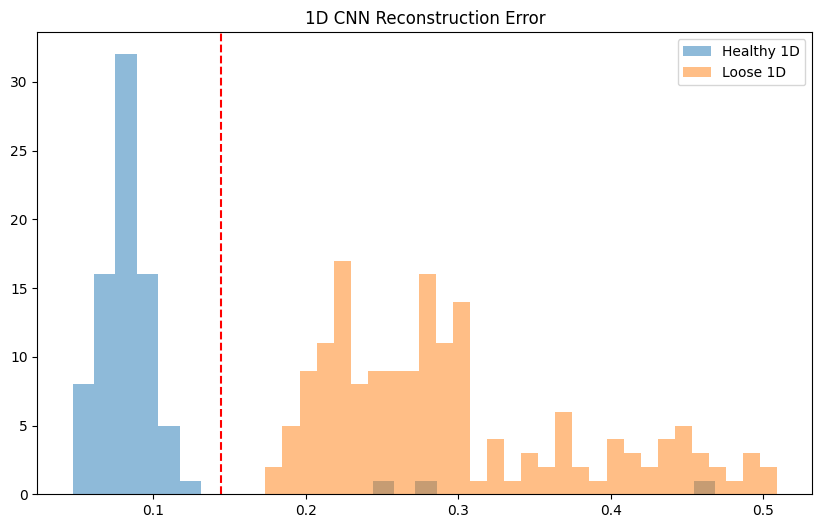

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.hist(err_healthy_1d, bins=30, alpha=0.5, label='Healthy 1D')
plt.hist(err_loose_1d, bins=30, alpha=0.5, label='Loose 1D')
plt.axvline(threshold_1d, color='red', linestyle='--')

plt.title("1D CNN Reconstruction Error")
plt.legend()
plt.show()

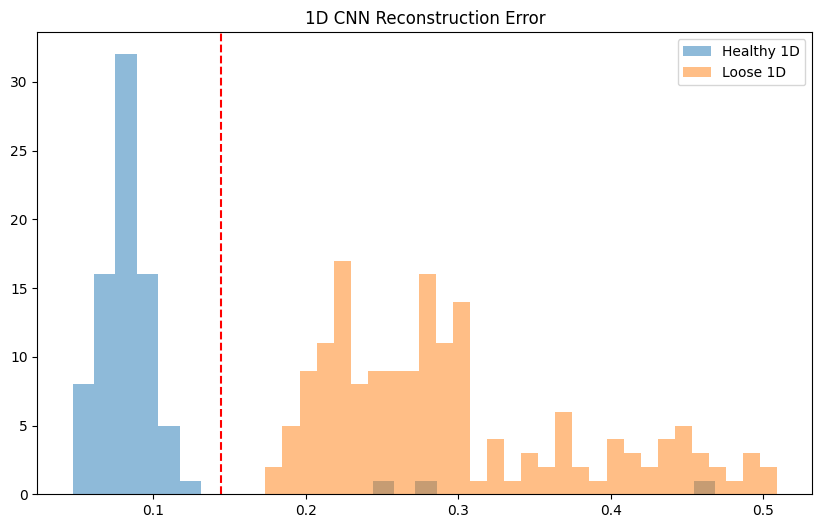

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.hist(err_healthy_1d, bins=30, alpha=0.5, label='Healthy 1D')
plt.hist(err_loose_1d, bins=30, alpha=0.5, label='Loose 1D')
plt.axvline(threshold_1d, color='red', linestyle='--')

plt.title("1D CNN Reconstruction Error")
plt.legend()
plt.show()

In [ ]:
python main.py --build_dataset